# with OGGM_v153 --> but apparently not available for all simulations???

# Notebook to show the steady-state Glacier model differences 

In [1]:
# # these code lines above are equal to those at the beginning of 2_glacier_vs_climate_change

# download it here https://cluster.klima.uni-bremen.de/~lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled.nc
# and change the path to your local path
DATE = 'Feb12_2024' #'Jun29' #'apr04' (has OGGM runaway effect of glaciers inside)
fill_option = 'repeat_last_101yrs'

import xarray as xr
import numpy as np
import pandas as pd
import scipy
import os
import glob
import matplotlib.pyplot as plt
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
# for plots withinplots 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

try:
    path_merged_runs_scaled_extend = f'/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'
    _ds_reg_models_extend = xr.open_dataset(path_merged_runs_scaled_extend)

except:
    path_merged_runs_scaled_extend = f'/home/lilianschuster/Downloads/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'
    _ds_reg_models_extend = xr.open_dataset(path_merged_runs_scaled_extend)
from help_functions import pal_models, model_order, d_reg_num_name, model_order_anonymous, compute_steady_state_yr


/home/users/lschuster/mambaforge/envs/oggm_gmip3/lib/python3.11/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [23]:

# --> comes from isimip3b_postprocessing_analysis/isimip3b_postprocess_to_monthly.ipynb
pd_global_temp_exp = pd.read_csv('../data/temp_ch_ipcc_ar6_isimip3b.csv', index_col = 0)

hue_order_anonymous = []

pal_models_l = []
hue_order = []
for m, p in zip(model_order, pal_models):
    if (m!='OGGM-VAS') and (m!='Huss'): #m!='OGGM_v153'):
        hue_order.append(m)
        pal_models_l.append(p)
for m in hue_order:
    hue_order_anonymous.append(model_order_anonymous[m])
pal_models = pal_models_l

print(hue_order, hue_order_anonymous)
# select the right models:
pal_models = sns.color_palette(pal_models)

dict_model_col = {}
for c,m in zip(pal_models, hue_order):
    dict_model_col[m] = c
    
# select the right models

glac_models = hue_order

num_dict = {0:'(a)', 1:'(b)', 2:'(c)', 3:'(d)', 4: '(e)', 5:'(f)', 6:'(g)', 7:'(h)', 8:'(i)', 9:'(j)', 10:'(k)', 11:'(l)', 12:'(m)'} 


def get_glob_temp_exp(region='global'):
    pd_global_temp_exp_glac = pd.read_csv('../data/temp_ch_ipcc_ar6_isimip3b_glacier_regionally.csv', index_col = 0)
    _p = pd_global_temp_exp_glac.loc[pd_global_temp_exp_glac.region == region].drop(columns=['region'])
    _p = _p.groupby(['gcm','period_scenario']).mean()
    return _p

np.testing.assert_allclose(get_glob_temp_exp(region='global')['temp_ch_ipcc'].values,
                                  pd_global_temp_exp.groupby(['gcm','period_scenario']).mean()['temp_ch_ipcc'].values, rtol=1e-5)
import matplotlib
matplotlib.__version__
pd_global_temp_exp_m = get_glob_temp_exp(region='global')


['PyGEM-OGGM_v13', 'GloGEMflow', 'GloGEMflow3D', 'OGGM_v16', 'GLIMB', 'Kraaijenbrink', 'GO', 'CISM2', 'OGGM_v153'] ['model 1', 'model 2', 'model 3', 'model 4', 'model 5', 'model 6', 'model 7', 'model 8', 'model 9']


In [24]:

glob_temp_ch = get_glob_temp_exp(region='global')['temp_ch_ipcc'].values
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler
only_12_range = False
if only_12_range:
    colors_icci_l3 = ['#70B8FF', '#FABB00', '#F25100', '#D42300', '#B3001E', '#800040', '#550066', '#2B084D']
    cmap_icci_3 = LinearSegmentedColormap.from_list('bins_100', colors_icci_l3, N=1000)
    # IDEA --> Let's scale from 1.2 onwards
    scaler = MinMaxScaler()
    temp_ch_sel = np.arange(1.2,glob_temp_ch.max(),0.25)
    scaler.fit(temp_ch_sel.reshape(-1,1))
    cmap = cmap_icci_3
else:
    ## '#306BAF', '#1A488A', '#002966'
    ## '#4D8ED6',
    colors_full_temp_range = ['#002966', '#306BAF', '#70B8FF','#FABB00', '#F25100', '#D42300', '#B3001E', '#800040', '#550066', '#2B084D']
    cmap_full_temp_range = LinearSegmentedColormap.from_list('bins_100', colors_full_temp_range, N=1000)
    # IDEA --> Let's scale from the entire range onwards onwards
    scaler = MinMaxScaler()
    temp_ch_sel = np.arange(-0.36,glob_temp_ch.max(),0.25)# need to manually set the minimum to a lower value to have a light blue color at ~1.2°C
    scaler.fit(temp_ch_sel.reshape(-1,1))
    cmap = cmap_full_temp_range

norm = plt.Normalize(vmin=-0.36, vmax=glob_temp_ch.max()) # we need the -0.4 for the correct norm 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_clim(glob_temp_ch.min(),glob_temp_ch.max())
# ok, both approaches work the same 
assert sm.cmap == cmap

t = 1.2
import matplotlib.colors as mcolors
# just want to make sure that 1.2°C is this color here: '#70B8FF'
hex_color = '#70B8FF'
rgba_color = mcolors.to_rgba(hex_color)
c1=sm.cmap(scaler.transform(np.array(t).reshape(-1,1))).squeeze()
c2=cmap(scaler.transform(np.array(t).reshape(-1,1))).squeeze()
np.testing.assert_allclose(c1,c2)
np.testing.assert_allclose(c1,rgba_color)

In [25]:
_count_models

simulation_year  volume_m3  area_m2  extend_option
model_author                                                      
CISM2                        80         80       80             80
GLIMB                      1520       1520     1520           1520
GO                           80         80       80             80
GloGEMflow                 1520       1520     1520           1520
GloGEMflow3D                880        880      880            880
Huss                        764        764      764            764
Kraaijenbrink               240        240      240            240
OGGM-VAS                   1440       1440     1440           1440
OGGM_v153                   304        304      304            304
OGGM_v16                   1520       1520     1520           1520
PyGEM-OGGM_v13             1520       1520     1520           1520

In [8]:
_count_models = _ds_reg_models_extend.isel(simulation_year=0).to_dataframe().dropna().groupby(['model_author']).count()
global_models = list(_count_models.loc[_count_models.volume_m3==1520].index)

In [21]:
global_models

['GLIMB', 'GloGEMflow', 'OGGM_v16', 'PyGEM-OGGM_v13']

In [9]:
# select the right models and option
approach = '_via_5yravg'
_ds_reg_yr_shift= xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/all_shifted_glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}{approach}_wOGGM_v153.nc')
shift_years = True
if shift_years:
    add = '_shifted_to_2020'
    # we shift by maximum by +50 years, so like that there should always be values inside 
    ds_reg_yr_shift = _ds_reg_yr_shift.sel(year_after_2020=slice(0,4950))
    ds_reg_models = ds_reg_yr_shift.sel(model_author=glac_models)
    ds_reg_models_vol = ds_reg_models.volume_m3 #.isel(simulation_year=slice(0,2000)) #['relative volume change (in %)']
else:
    add = '_no_shift'
    ds_reg_models = _ds_reg_models_extend.sel(model_author=glac_models)
    ds_reg_models_vol = ds_reg_models.volume_m3 #.isel(simulation_year=slice(0,2000)) #['relative volume change (in %)']

# Let's take the median estimate from all glacier models for every RGI region and then do the sum:
ds_reg_models_vol = ds_reg_models_vol.stack(experiments=['gcm','period_scenario'])

# median estimae for every region
ds_reg_models_med_vol = ds_reg_models_vol.median(dim='model_author')

## now: the same for global: IMPORTANT - first the sum over the regions and then the median over the glacier models
ds_reg_models_vol_glob_med = ds_reg_models_vol.sel(model_author=global_models).sum(dim='rgi_reg').median(dim='model_author')


----

- todo: maybe use regional glacier stuff instead for the "classes" ???

In [10]:
ds_reg_models_med_vol = ds_reg_models_med_vol.assign_coords(temp_ch_ipcc= ('experiments',
                                                                      pd_global_temp_exp_m.loc[ds_reg_models_med_vol.experiments, # make sure thatwe use the same experiments
                                                                                             'temp_ch_ipcc']))
# need that to have bot volume_m3 and temp_ch_ipcc as variables
ds_reg_models_med_vol = ds_reg_models_med_vol.reset_coords()

ds_reg_models_vol = ds_reg_models_vol.assign_coords(temp_ch_ipcc = ('experiments',
                                                                      pd_global_temp_exp_m.loc[ds_reg_models_vol.experiments, # make sure thatwe use the same experiments
                                                                                             'temp_ch_ipcc']))
# need that to have bot volume_m3 and temp_ch_ipcc as variables
ds_reg_models_vol = ds_reg_models_vol.reset_coords()
############
ds_reg_models_vol_glob = ds_reg_models_vol.sel(model_author=global_models).sum(dim='rgi_reg')


### same for global median 
ds_reg_models_vol_glob_med = ds_reg_models_vol_glob_med.assign_coords(temp_ch_ipcc = ('experiments',
                                                                      pd_global_temp_exp_m.loc[ds_reg_models_vol_glob_med.experiments, # make sure thatwe use the same experiments
                                                                                             'temp_ch_ipcc']))
ds_reg_models_vol_glob_med = ds_reg_models_vol_glob_med.reset_coords()


In [11]:

# want 101-year average
ds_reg_models_vol_5000 = ds_reg_models_vol.copy()
if shift_years:
    _vol = ds_reg_models_vol_5000.isel(year_after_2020=slice(-101,-1)).volume_m3.mean(dim='year_after_2020')
else:
    _vol = ds_reg_models_vol_5000.isel(simulation_year=slice(-101,-1)).volume_m3.mean(dim='simulation_year')
ds_reg_models_vol_5000['volume_m3'] = _vol
ds_reg_models_vol_5000 = ds_reg_models_vol_5000.drop_dims('year_after_2020').reset_coords()

#### median 
ds_reg_models_med_vol_5000 = ds_reg_models_med_vol.copy()

if shift_years:
    _vol = ds_reg_models_med_vol_5000.isel(year_after_2020=slice(-101,-1)).volume_m3.mean(dim='year_after_2020')
else:
    _vol = ds_reg_models_med_vol_5000.isel(simulation_year=slice(-101,-1)).volume_m3.mean(dim='simulation_year')
ds_reg_models_med_vol_5000['volume_m3'] = _vol
ds_reg_models_med_vol_5000 = ds_reg_models_med_vol_5000.drop_dims('year_after_2020').reset_coords()
###
ds_reg_models_vol_glob_med_5000 = ds_reg_models_vol_glob_med.copy()

if shift_years:
    _vol = ds_reg_models_vol_glob_med_5000.isel(year_after_2020=slice(-101,-1)).volume_m3.mean(dim='year_after_2020')
else:
    _vol = ds_reg_models_vol_glob_med_5000.isel(simulation_year=slice(-101,-1)).volume_m3.mean(dim='simulation_year')
ds_reg_models_vol_glob_med_5000['volume_m3'] = _vol
ds_reg_models_vol_glob_med_5000 = ds_reg_models_vol_glob_med_5000.drop_dims('year_after_2020').reset_coords()

In [12]:
######################## after just 80 simulation years... corresponds best to 2100 projection estimates
# want 101-year average
ds_reg_models_vol_80 = ds_reg_models_vol.copy()
if shift_years:
    _vol = ds_reg_models_vol_80.isel(year_after_2020=slice(70,90)).volume_m3.mean(dim='year_after_2020')
else:
    _vol = ds_reg_models_vol_80.isel(simulation_year=slice(70,90)).volume_m3.mean(dim='simulation_year')
ds_reg_models_vol_80['volume_m3'] = _vol
ds_reg_models_vol_80 = ds_reg_models_vol_80.drop_dims('year_after_2020').reset_coords()

#### median 
ds_reg_models_med_vol_80 = ds_reg_models_med_vol.copy()

if shift_years:
    _vol = ds_reg_models_med_vol_80.isel(year_after_2020=slice(70,90)).volume_m3.mean(dim='year_after_2020')
else:
    _vol = ds_reg_models_med_vol_80.isel(simulation_year=slice(70,90)).volume_m3.mean(dim='simulation_year')
ds_reg_models_med_vol_80['volume_m3'] = _vol
ds_reg_models_med_vol_80 = ds_reg_models_med_vol_80.drop_dims('year_after_2020').reset_coords()
###
ds_reg_models_vol_glob_med_80 = ds_reg_models_vol_glob_med.copy()

if shift_years:
    _vol = ds_reg_models_vol_glob_med_80.isel(year_after_2020=slice(70,90)).volume_m3.mean(dim='year_after_2020')
else:
    _vol = ds_reg_models_vol_glob_med_80.isel(simulation_year=slice(70,90)).volume_m3.mean(dim='simulation_year')
ds_reg_models_vol_glob_med_80['volume_m3'] = _vol
ds_reg_models_vol_glob_med_80 = ds_reg_models_vol_glob_med_80.drop_dims('year_after_2020').reset_coords()

## 1. in the equilibrium (5000-yr) state
- idea: 
    - compute for every of the 80 experiments and every RGI regions the relative volume differences to the median response
    - take all these differences and create boxplots with them!


In [13]:
ds_reg_models_vol_glob_5000 = ds_reg_models_vol_5000.sel(model_author=global_models).sum(dim='rgi_reg')

if shift_years:
    ds_reg_models_med_vol_5000['relative volume change (in %)'] = 100*ds_reg_models_med_vol_5000.volume_m3/ds_reg_models_med_vol.isel(year_after_2020=0).volume_m3
    ds_reg_models_vol_5000['relative volume change (in %)'] = 100*ds_reg_models_vol_5000.volume_m3/ds_reg_models_vol.isel(year_after_2020=0).volume_m3
    ds_reg_models_vol_glob_med_5000['relative volume change (in %)'] = 100*ds_reg_models_vol_glob_med_5000.volume_m3/ds_reg_models_vol_glob_med.isel(year_after_2020=0).volume_m3
    ds_reg_models_vol_glob_5000['relative volume change (in %)'] = 100*ds_reg_models_vol_glob_5000.volume_m3/ds_reg_models_vol_glob.isel(year_after_2020=0).volume_m3
else:
    ds_reg_models_med_vol_5000['relative volume change (in %)'] = 100*ds_reg_models_med_vol_5000.volume_m3/ds_reg_models_med_vol.isel(simulation_year=0).volume_m3
    ds_reg_models_vol_5000['relative volume change (in %)'] = 100*ds_reg_models_vol_5000.volume_m3/ds_reg_models_vol.isel(simulation_year=0).volume_m3
    ds_reg_models_vol_glob_med_5000['relative volume change (in %)'] = 100*ds_reg_models_vol_glob_med_5000.volume_m3/ds_reg_models_vol_glob_med.isel(simulation_year=0).volume_m3
    ds_reg_models_vol_glob_5000['relative volume change (in %)'] = 100*ds_reg_models_vol_glob_5000.volume_m3/ds_reg_models_vol_glob.isel(simulation_year=0).volume_m3

    
ds_reg_models_vol_glob_5000['delta relative volume change (in %, to median model)'] = ds_reg_models_vol_glob_5000['relative volume change (in %)'] - ds_reg_models_vol_glob_med_5000['relative volume change (in %)']

ds_reg_models_vol_5000['delta relative volume change (in %, to median model)'] = ds_reg_models_vol_5000['relative volume change (in %)'] - ds_reg_models_med_vol_5000['relative volume change (in %)']
min_t_r, max_t_r = ds_reg_models_vol_5000['temp_ch_ipcc'].min()*1.01, ds_reg_models_vol_5000['temp_ch_ipcc'].max()*1.01

ds_reg_models_vol_5000_test = ds_reg_models_vol_5000.copy()
np.testing.assert_allclose(ds_reg_models_vol_5000_test['delta relative volume change (in %, to median model)'], ds_reg_models_vol_5000['delta relative volume change (in %, to median model)'])

In [14]:
# remove unnecessary variables to make the stacking faster... 
#ds_reg_models_vol_5000 = ds_reg_models_vol_5000.drop('volume_m3')
#ds_reg_models_vol_5000 = ds_reg_models_vol_5000.drop('relative volume change (in %)')

In [15]:
ref_period = '1995-2014_hist'

ds_reg_models_vol_5000_unstack = ds_reg_models_vol_5000.unstack('experiments')
diff = ds_reg_models_vol_5000_unstack['delta relative volume change (in %, to median model)'] - ds_reg_models_vol_5000_unstack['delta relative volume change (in %, to median model)'].sel(period_scenario=ref_period)
ds_reg_models_vol_5000_unstack['delta relative volume change (in %, to median model, relative to ref period )'] = diff
ds_reg_models_vol_5000 = ds_reg_models_vol_5000_unstack.stack(experiments=['gcm','period_scenario'])

pd_reg_models_vol_5000 = ds_reg_models_vol_5000.reset_coords().to_dataframe().drop(columns=['period_scenario', 'gcm']) # new sinve xarray v.2024 
pd_reg_models_vol_5000 = pd_reg_models_vol_5000.reset_index().dropna()

### same for global
ds_reg_models_vol_glob_5000_unstack = ds_reg_models_vol_glob_5000.unstack('experiments')
diff = ds_reg_models_vol_glob_5000_unstack['delta relative volume change (in %, to median model)'] - ds_reg_models_vol_glob_5000_unstack['delta relative volume change (in %, to median model)'].sel(period_scenario=ref_period)
ds_reg_models_vol_glob_5000_unstack['delta relative volume change (in %, to median model, relative to ref period )'] = diff
ds_reg_models_vol_glob_5000 = ds_reg_models_vol_glob_5000_unstack.stack(experiments=['gcm','period_scenario'])

pd_reg_models_vol_glob_5000 = ds_reg_models_vol_glob_5000.to_dataframe().drop(columns=['period_scenario', 'gcm'])
pd_reg_models_vol_glob_5000 = pd_reg_models_vol_glob_5000.reset_index().dropna()

In [16]:
# compute amount of RGI regions per model 
if shift_years:
    pd_regional_sum_initial_models = ds_reg_models.sel(year_after_2020=0).to_dataframe()
else:
    pd_regional_sum_initial_models = ds_reg_models.sel(simulation_year=0).to_dataframe()
    
pd_regional_sum_initial_models = pd_regional_sum_initial_models.reset_index()
#pd_reg_models = pd_reg_models.dropna()
pd_reg_models_count = pd_regional_sum_initial_models.groupby(['rgi_reg', 'model_author'])['volume_m3'].count().reset_index()
pd_reg_models_count = pd_reg_models_count.rename(columns={'volume_m3':'n_experiments'})
total_count= pd_reg_models_count.drop(columns='rgi_reg').groupby('model_author').sum()

labels_l = []
labels_l_anonym = []
for j,n in enumerate((total_count/80).round(0).astype(int).loc[hue_order].values.squeeze()):
    if n==1:
        label = f'{hue_order[j]} ({n} region)'
        label_a = f'{hue_order_anonymous[j]} ({n} region)' 
    else:
        label = f'{hue_order[j]} ({n} regions)'
        label_a = f'{hue_order_anonymous[j]} ({n} regions)'
    labels_l.append(label)
    labels_l_anonym.append(label_a)

In [17]:
hue_order_global = []
pal_models_global = []
for h,p in zip(hue_order,pal_models):
    if h in global_models:
        hue_order_global.append(h)
        pal_models_global.append(p)

**just some plots for presentations**

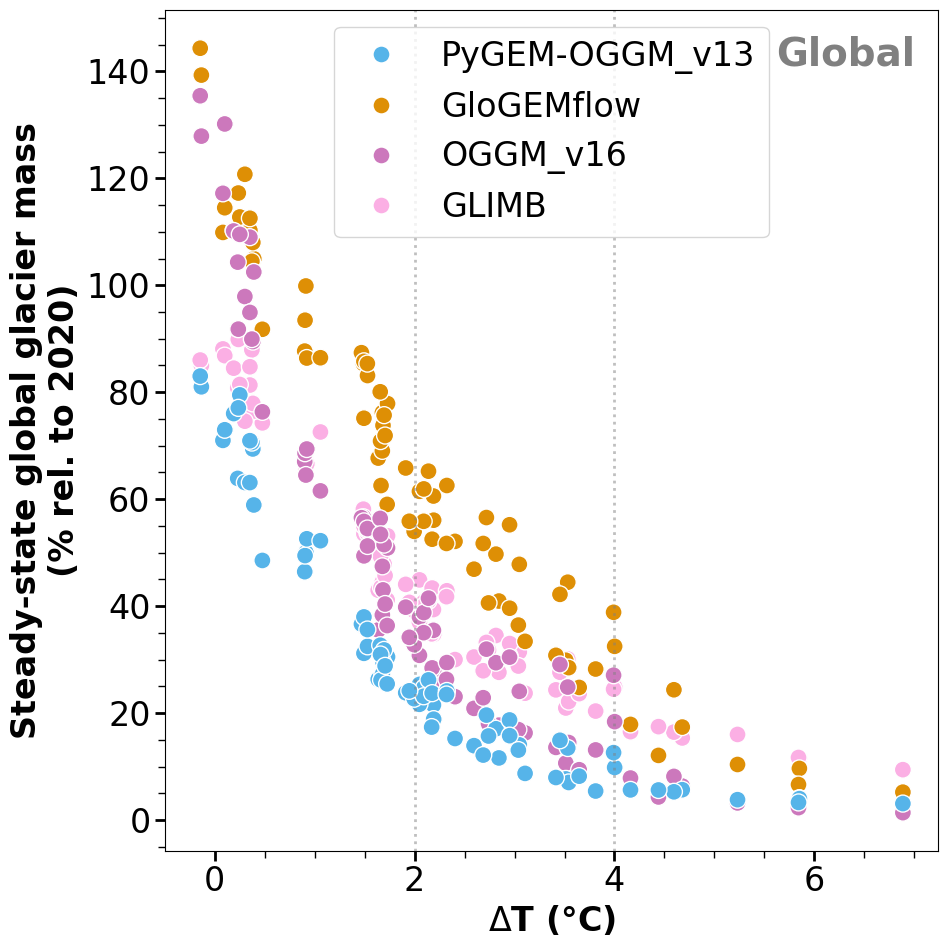

In [19]:
plt.rc('font', size=24)  
plt.figure(figsize=(10,10))
ax1= plt.gca()
for j,rgi_reg in enumerate(['Global']):
    if rgi_reg != 'Global':
        rgi_reg_long = f'{rgi_reg} - {d_reg_num_name[rgi_reg]}'
        pd_reg_models_vol_5000_rgi_reg = pd_reg_models_vol_5000.loc[pd_reg_models_vol_5000.rgi_reg==rgi_reg]
        _pal_models = pal_models
        _hue_order = hue_order
        _pd_vol = pd_reg_models_vol_5000_rgi_reg
    else:
        rgi_reg_long = rgi_reg
        _pal_models = pal_models_global
        _hue_order = hue_order_global
        _pd_vol = pd_reg_models_vol_glob_5000

    sns.scatterplot(ax= ax1, data=_pd_vol, 
                x='temp_ch_ipcc', y='relative volume change (in %)',
               hue='model_author', hue_order=_hue_order, palette=_pal_models, legend=True,s=150)
    handles, labels = ax1.get_legend_handles_labels()

    ax1.text(0.97,0.97, f'{rgi_reg_long}', ha='right', va='top', weight='bold',# spearman
                transform=ax1.transAxes, color='grey', fontsize=28)
    ax1.set_xlabel(r'$\Delta$T (°C)', weight='bold')
    ax1.set_ylabel('Steady-state global glacier mass\n(% rel. to 2020)', weight='bold')

    ax1.axvline(2, ls=':', color='grey', lw=2, alpha = 0.5)
    ax1.axvline(4, ls=':', color='grey', lw=2, alpha = 0.5)

    ax1.tick_params(axis='both', which='major', width=2, length=7)
    ax1.tick_params(axis='both', which='minor', width=1, length=5)
    from matplotlib.ticker import MultipleLocator
    minorx_locator = MultipleLocator(1)  # 1° difference 
    ax1.xaxis.set_minor_locator(minorx_locator)
    minory_locator = MultipleLocator(10)  # 1° difference 
    ax1.yaxis.set_minor_locator(minory_locator)
    ax1.minorticks_on()
plt.tight_layout()
ax1.legend(handles, labels, loc='upper center', #bbox_to_anchor=(1,1), 
           ncol=1, fontsize=24);   
plt.savefig('figures_partB/glacier_model_ss_differences/steady_state_mass_glob_reg_scatterplot_vs_deltaT_presentation_wOGGM_v153.png')

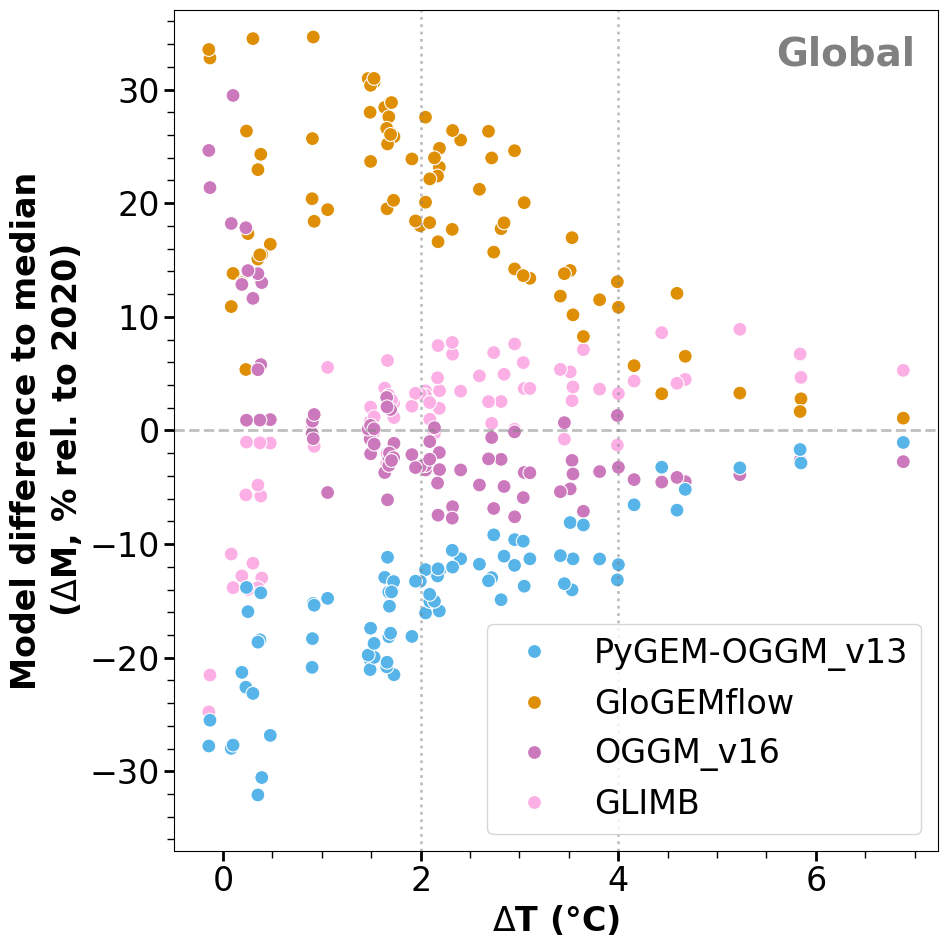

In [16]:
plt.rc('font', size=24)  
plt.figure(figsize=(10,10))
ax1= plt.gca()
for j,rgi_reg in enumerate(['Global']):
    if rgi_reg != 'Global':
        rgi_reg_long = f'{rgi_reg} - {d_reg_num_name[rgi_reg]}'
        pd_reg_models_vol_5000_rgi_reg = pd_reg_models_vol_5000.loc[pd_reg_models_vol_5000.rgi_reg==rgi_reg]
        _pal_models = pal_models
        _hue_order = hue_order
        _pd_vol = pd_reg_models_vol_5000_rgi_reg
    else:
        rgi_reg_long = rgi_reg
        _pal_models = pal_models_global
        _hue_order = hue_order_global
        _pd_vol = pd_reg_models_vol_glob_5000

    sns.scatterplot(ax= ax1, data=_pd_vol, 
                x='temp_ch_ipcc', y='delta relative volume change (in %, to median model)',
               hue='model_author', hue_order=_hue_order, palette=_pal_models, legend=True, s=100)
    handles, labels = ax1.get_legend_handles_labels()

    ax1.text(0.97,0.97, f'{rgi_reg_long}', ha='right', va='top', weight='bold',# spearman
                transform=ax1.transAxes, color='grey', fontsize=28)
    ax1.set_xlabel(r'$\Delta$T (°C)', weight='bold')
    ax1.set_ylabel('Model difference to median\n'+r'($\Delta$M, % rel. to 2020)', weight='bold')

    ax1.axhline(0, ls='--', color='grey', lw=2, alpha = 0.5)
    ax1.tick_params(axis='both', which='major', width=2, length=7)
    ax1.tick_params(axis='both', which='minor', width=1, length=5)
    from matplotlib.ticker import MultipleLocator
    minorx_locator = MultipleLocator(1)  # 1° difference 
    ax1.xaxis.set_minor_locator(minorx_locator)
    minory_locator = MultipleLocator(10)  # 1° difference 
    ax1.yaxis.set_minor_locator(minory_locator)
    ax1.minorticks_on()
    ax1.axvline(2, ls=':', color='grey', lw=2, alpha = 0.5)
    ax1.axvline(4, ls=':', color='grey', lw=2, alpha = 0.5)
plt.tight_layout()
ax1.legend(handles, labels, loc='lower right', #bbox_to_anchor=(1,1), 
           ncol=1, fontsize=24);   
plt.ylim([-37,37])
plt.savefig('figures_partB/glacier_model_ss_differences/steady_state_vol_diff_median_glob_reg_scatterplot_vs_deltaT_only_global.png')

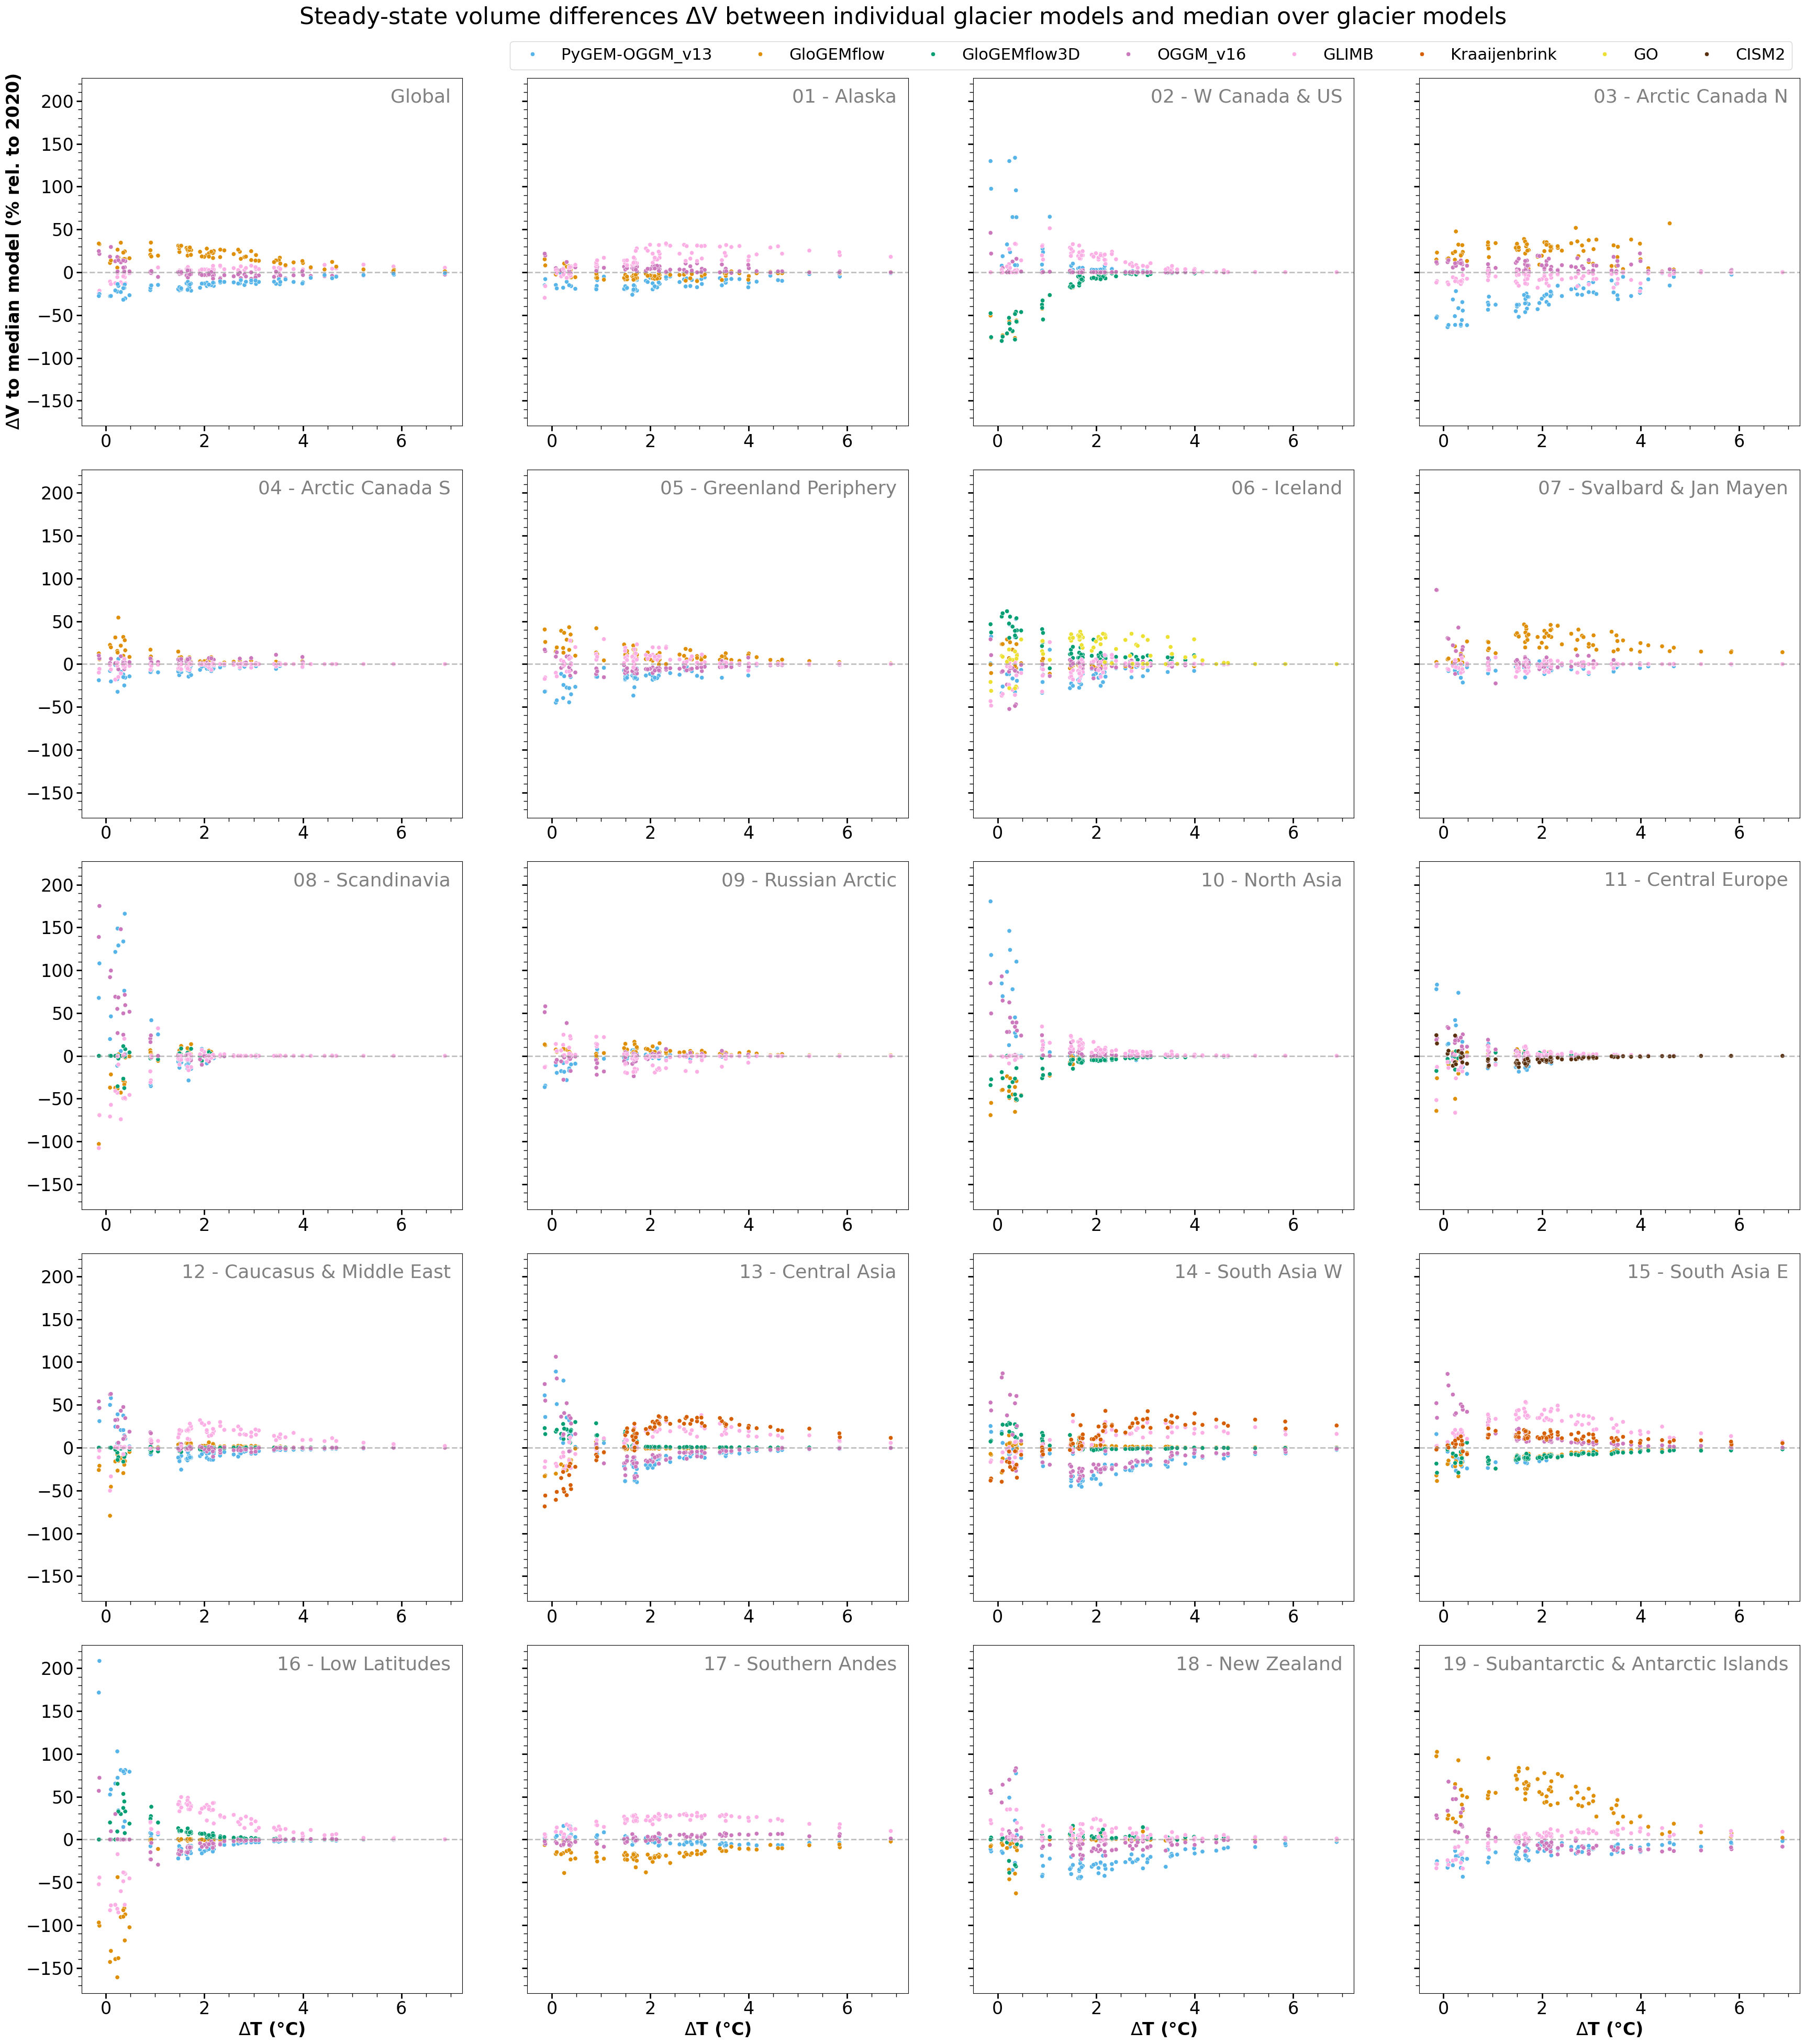

In [17]:
plt.rc('font', size=24)  
fig1, axs1 = plt.subplots(5,4,figsize=(35,40), sharey=True) #, sharey=True) #, sharey='row') #, sharex=True)
#pd_reg_models_vol_5000_steady_state_glob = pd_reg_models_vol_5000_steady_state.groupby(['model_author','temp_ch_ipcc']).sum().reset_index()
suptitle1 = r'Steady-state volume differences $\Delta$V between individual glacier models and median over glacier models'+'\n\n'
fig1.suptitle(suptitle1, fontsize=32)
axs1 = axs1.flatten()
subplots=True

for j,rgi_reg in enumerate(['Global'] + list(pd_reg_models_vol_5000.rgi_reg.unique())):
    if rgi_reg != 'Global':
        rgi_reg_long = f'{rgi_reg} - {d_reg_num_name[rgi_reg]}'
        pd_reg_models_vol_5000_rgi_reg = pd_reg_models_vol_5000.loc[pd_reg_models_vol_5000.rgi_reg==rgi_reg]
        _pal_models = pal_models
        _hue_order = hue_order
        _pd_vol = pd_reg_models_vol_5000_rgi_reg
    else:
        rgi_reg_long = rgi_reg
        _pal_models = pal_models_global
        _hue_order = hue_order_global
        _pd_vol = pd_reg_models_vol_glob_5000

    if not subplots:
        fig, axs = plt.subplots(1,2,figsize=(28,12),sharey=False, sharex=True)
    
    ax1 = axs1[j]
    if j ==3:
        legend=True
    else:
        legend = False
    sns.scatterplot(ax= ax1, data=_pd_vol, 
                x='temp_ch_ipcc', y='delta relative volume change (in %, to median model)',
               hue='model_author', hue_order=_hue_order, palette=_pal_models, legend=legend)
    if j ==3:
        handles, labels = ax1.get_legend_handles_labels()
        ax1_0 = ax1

    ax1.text(0.97,0.97, f'{rgi_reg_long}', ha='right', va='top',# spearman
                transform=ax1.transAxes, color='grey', fontsize=26)
    if j>15:
        ax1.set_xlabel(r'$\Delta$T (°C)', weight='bold')
    else:
        ax1.set_xlabel('')
    if j==0:
        ax1.set_ylabel(r'$\Delta$V to median model (% rel. to 2020)', weight='bold')
    else:
        ax1.set_ylabel('')
    ax1.axhline(0, ls='--', color='grey', lw=2, alpha = 0.5)
    ax1.tick_params(axis='both', which='major', width=2, length=7)
    ax1.tick_params(axis='both', which='minor', width=1, length=5)
    from matplotlib.ticker import MultipleLocator
    minorx_locator = MultipleLocator(1)  # 1° difference 
    ax1.xaxis.set_minor_locator(minorx_locator)
    minory_locator = MultipleLocator(10)  # 1° difference 
    ax1.yaxis.set_minor_locator(minory_locator)
    ax1.minorticks_on()
plt.tight_layout()
ax1_0.legend(handles, labels, loc='lower right', bbox_to_anchor=(1,1), ncol=8, fontsize=22);   
plt.savefig('figures_partB/glacier_model_ss_differences/steady_state_vol_diff_median_glob_reg_scatterplot_vs_deltaT.png')

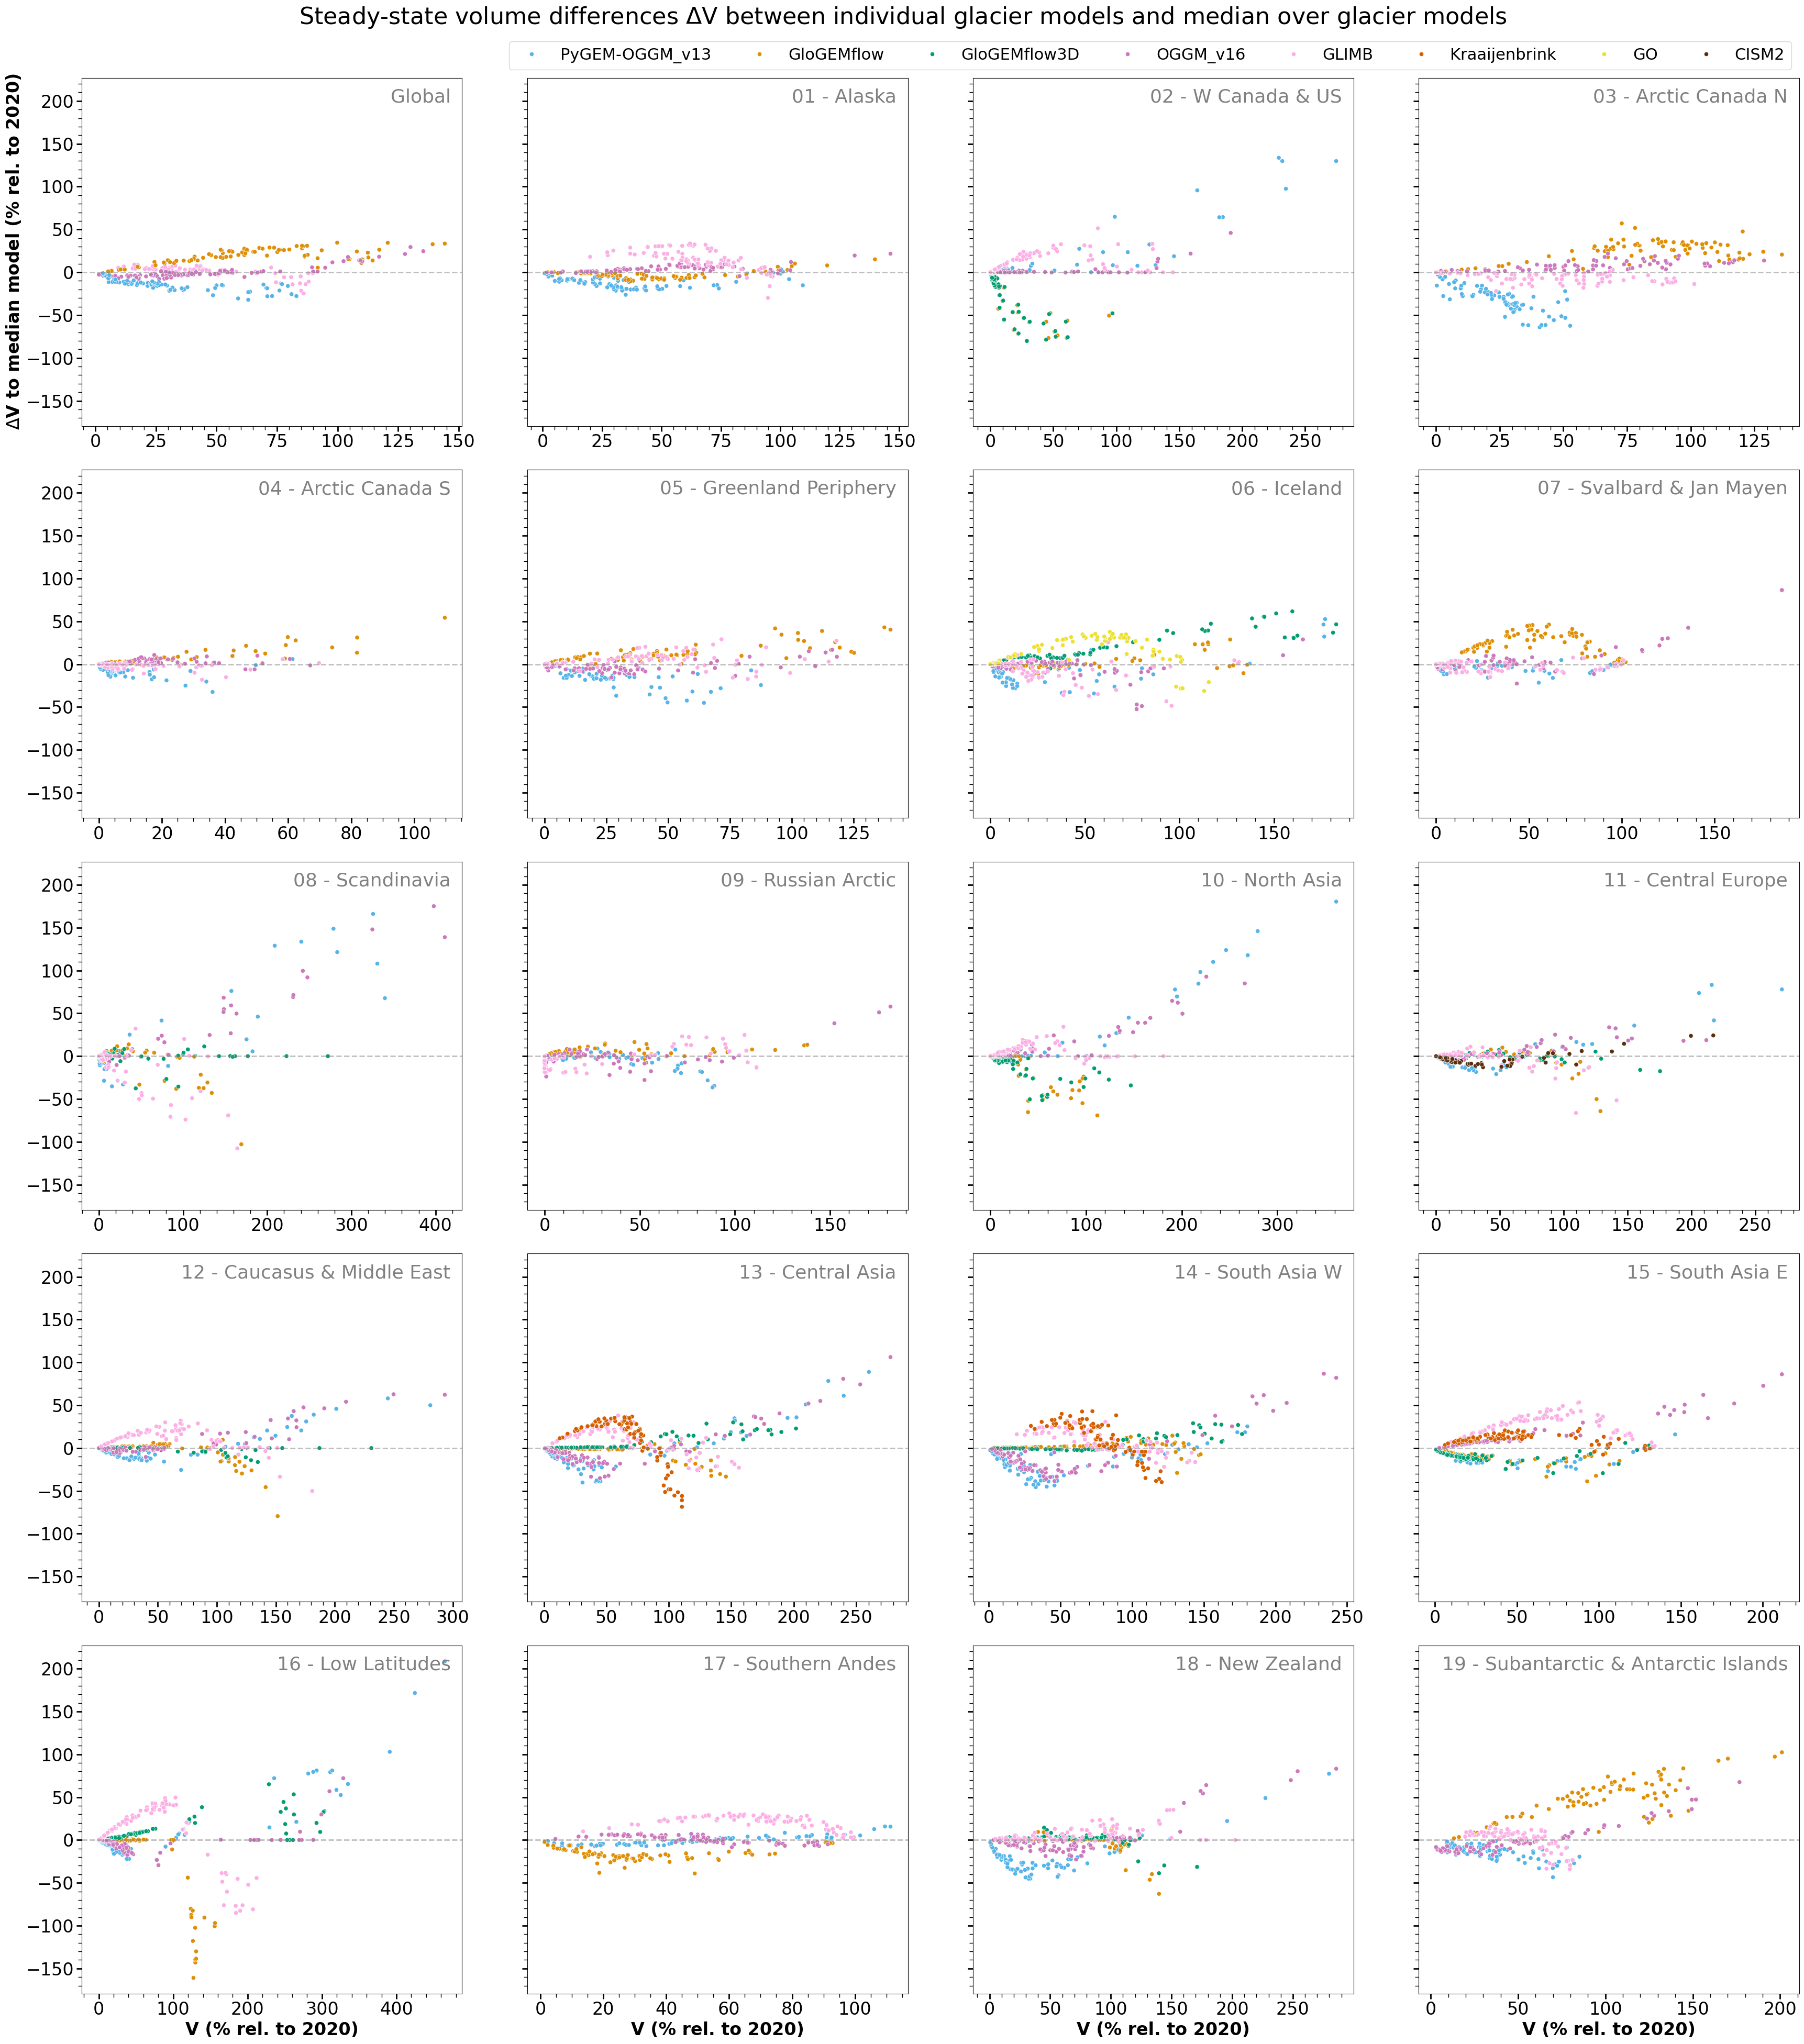

In [18]:
plt.rc('font', size=24)  
fig1, axs1 = plt.subplots(5,4,figsize=(35,40), sharey=True) #, sharey=True) #, sharey='row') #, sharex=True)
#pd_reg_models_vol_5000_steady_state_glob = pd_reg_models_vol_5000_steady_state.groupby(['model_author','temp_ch_ipcc']).sum().reset_index()
suptitle1 = r'Steady-state volume differences $\Delta$V between individual glacier models and median over glacier models'+'\n\n'
fig1.suptitle(suptitle1, fontsize=32)
axs1 = axs1.flatten()
subplots=True

for j,rgi_reg in enumerate(['Global'] + list(pd_reg_models_vol_5000.rgi_reg.unique())):
    if rgi_reg != 'Global':
        rgi_reg_long = f'{rgi_reg} - {d_reg_num_name[rgi_reg]}'
        pd_reg_models_vol_5000_rgi_reg = pd_reg_models_vol_5000.loc[pd_reg_models_vol_5000.rgi_reg==rgi_reg]
        _pal_models = pal_models
        _hue_order = hue_order
        _pd_vol = pd_reg_models_vol_5000_rgi_reg
    else:
        rgi_reg_long = rgi_reg
        _pal_models = pal_models_global
        _hue_order = hue_order_global
        _pd_vol = pd_reg_models_vol_glob_5000

    if not subplots:
        fig, axs = plt.subplots(1,2,figsize=(28,12),sharey=False, sharex=True)
    
    ax1 = axs1[j]
    if j ==3:
        legend=True
    else:
        legend = False
    sns.scatterplot(ax= ax1, data=_pd_vol, 
                x='relative volume change (in %)', y='delta relative volume change (in %, to median model)',
               hue='model_author', hue_order=_hue_order, palette=_pal_models, legend=legend)
    if j ==3:
        handles, labels = ax1.get_legend_handles_labels()
        ax1_0 = ax1

    ax1.text(0.97,0.97, f'{rgi_reg_long}', ha='right', va='top',# spearman
                transform=ax1.transAxes, color='grey', fontsize=26)
    if j>15:
        ax1.set_xlabel(r'V (% rel. to 2020)', weight='bold')
    else:
        ax1.set_xlabel('')
    if j==0:
        ax1.set_ylabel(r'$\Delta$V to median model (% rel. to 2020)', weight='bold')
    else:
        ax1.set_ylabel('')
    ax1.axhline(0, ls='--', color='grey', lw=2, alpha = 0.5)
    ax1.tick_params(axis='both', which='major', width=2, length=7)
    ax1.tick_params(axis='both', which='minor', width=1, length=5)
    from matplotlib.ticker import MultipleLocator
    minorx_locator = MultipleLocator(1)  # 1° difference 
    ax1.xaxis.set_minor_locator(minorx_locator)
    minory_locator = MultipleLocator(10)  # 1° difference 
    ax1.yaxis.set_minor_locator(minory_locator)
    ax1.minorticks_on()
plt.tight_layout()
ax1_0.legend(handles, labels, loc='lower right', bbox_to_anchor=(1,1), ncol=8, fontsize=22);   
plt.savefig('figures_partB/glacier_model_ss_differences/steady_state_vol_diff_median_glob_reg_scatterplot_vs_volume.png')

### glacier model uncertaitnires 

In [19]:
# create "classes" of global temp. change

T0_l, T1_l = [], []
temp_labels = []
for t0, t1 in zip([min_t_r.values, 2, 4],[2, 4, max_t_r.values]):
    temp_label = f'{t0:.1f}°C-{t1:.1f}°C'
    condi = (pd_reg_models_vol_5000.temp_ch_ipcc <=t1)&(pd_reg_models_vol_5000.temp_ch_ipcc >=t0)
    pd_reg_models_vol_5000.loc[condi, 'temp_ch_classes'] = temp_label
    # global
    condi_global = (pd_reg_models_vol_glob_5000.temp_ch_ipcc <=t1)&(pd_reg_models_vol_glob_5000.temp_ch_ipcc >=t0)
    pd_reg_models_vol_glob_5000.loc[condi_global, 'temp_ch_classes'] = temp_label
pd_reg_models_vol_glob_5000['rgi_reg'] = 'Global'
pd_reg_models_vol_5000_no_ref_period = pd_reg_models_vol_5000.loc[pd_reg_models_vol_5000.period_scenario!=ref_period]
pd_reg_models_vol_glob_5000_no_ref_period = pd_reg_models_vol_glob_5000.loc[pd_reg_models_vol_glob_5000.period_scenario!=ref_period]

pd_reg_models_vol_all_5000_no_ref_period = pd.concat([pd_reg_models_vol_glob_5000_no_ref_period,pd_reg_models_vol_5000_no_ref_period])
pd_reg_models_vol_all_5000 = pd.concat([pd_reg_models_vol_glob_5000, pd_reg_models_vol_5000])



In [20]:
# select only the global glacier models for the analysis of the uncertainties...
pd_reg_models_vol_glob_5000['rgi_reg'] = 'Global'
pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models = pd_reg_models_vol_glob_5000.copy()
for m in global_models:
    _p_m = pd_reg_models_vol_5000.loc[pd_reg_models_vol_5000.model_author==m]
    pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models = pd.concat([pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models,_p_m])

In [21]:
pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models['absolute delta relative volume change (in %, to median model)'] = np.absolute(pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models['delta relative volume change (in %, to median model)'])
pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models['absolute delta relative volume change (in %, to median model, relative to ref period )'] = np.absolute(pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models['delta relative volume change (in %, to median model, relative to ref period )'])


In [22]:
# Calculate the interquartile range (IQR) directly
#pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models_iqr = pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models.groupby(['temp_ch_classes', 'rgi_reg']).agg(
#    iqr=('absolute delta relative volume change (in %, to median model)', lambda x: x.quantile(0.75) - x.quantile(0.25))
#).reset_index()
#pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models_90th_perc_range = pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models.groupby(['temp_ch_classes', 'rgi_reg']).agg(
#    nineteeth_perc_range=('absolute delta relative volume change (in %, to median model)', lambda x: x.quantile(0.95) - x.quantile(0.05))
#).reset_index()

In [23]:
pd.__version__

'2.2.2'

In [24]:
pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models

model_author          gcm   period_scenario  temp_ch_ipcc  \
0              GLIMB    gfdl-esm4    1851-1870_hist      0.231409   
1              GLIMB    gfdl-esm4    1901-1920_hist      0.478289   
2              GLIMB    gfdl-esm4    1951-1970_hist      0.392281   
3              GLIMB    gfdl-esm4    1995-2014_hist      0.901467   
4              GLIMB    gfdl-esm4  2021-2040_ssp126      1.493792   
...              ...          ...               ...           ...   
1515  PyGEM-OGGM_v13  ukesm1-0-ll  2061-2080_ssp370      4.439977   
1516  PyGEM-OGGM_v13  ukesm1-0-ll  2061-2080_ssp585      5.230543   
1517  PyGEM-OGGM_v13  ukesm1-0-ll  2081-2100_ssp126      3.038482   
1518  PyGEM-OGGM_v13  ukesm1-0-ll  2081-2100_ssp370      5.840495   
1519  PyGEM-OGGM_v13  ukesm1-0-ll  2081-2100_ssp585      6.884361   

         volume_m3  year_after_2020  relative volume change (in %)  \
0     1.253455e+14              0.0                      80.812475   
1     1.146157e+14              0.0                      74.273069   
2     1.179973e+14              0.0                      76.486687   
3     1.033774e+14              0.0                      67.609008   
4     8.175907e+13              0.0                      53.517849   
...            ...              ...                            ...   
1515  6.337830e+12              0.0                      13.770904   
1516  4.558544e+12              0.0                       9.904876   
1517  1.314191e+13              0.0                      28.597223   
1518  4.238342e+12              0.0                       9.182292   
1519  4.286108e+12              0.0                       9.359933   

      delta relative volume change (in %, to median model)  \
0                                             -5.675031      
1                                             -1.113826      
2                                            -12.982556      
3                                              0.309192      
4                                              2.054803      
...                                                 ...      
1515                                          -6.390154      
1516                                          -8.343732      
1517                                         -11.283813      
1518                                          -3.481947      
1519                                          -1.888705      

      delta relative volume change (in %, to median model, relative to ref period )  \
0                                             -5.984223                               
1                                             -1.423018                               
2                                            -13.291747                               
3                                              0.000000                               
4                                              1.745611                               
...                                                 ...                               
1515                                           8.611169                               
1516                                           6.657591                               
1517                                           3.717510                               
1518                                          11.519376                               
1519                                          13.112618                               

     temp_ch_classes rgi_reg  \
0       -0.1°C-2.0°C  Global   
1       -0.1°C-2.0°C  Global   
2       -0.1°C-2.0°C  Global   
3       -0.1°C-2.0°C  Global   
4       -0.1°C-2.0°C  Global   
...              ...     ...   
1515     4.0°C-7.0°C      19   
1516     4.0°C-7.0°C      19   
1517     2.0°C-4.0°C      19   
1518     4.0°C-7.0°C      19   
1519     4.0°C-7.0°C      19   

      absolute delta relative volume change (in %, to median model)  \
0                                              5.675031               
1                    

In [25]:
# I think it is better to use the interquartile range of ainstead o the median 
# find order for -0.1 to 2.°C class
for _r in d_reg_num_name.keys():
    pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models.loc[pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models.rgi_reg==_r, 'rgi_reg_long'] = f'{d_reg_num_name[_r]} ({_r})'
pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models.loc[pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models.rgi_reg=='Global', 'rgi_reg_long'] = 'Global'
pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models_median = pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models.drop(columns=['model_author','gcm','period_scenario']).groupby(['temp_ch_classes',
                                                                                                                            'rgi_reg','rgi_reg_long']).median().reset_index()

sort_stuff = True
if sort_stuff:
    _sel_class1 = pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models_median.loc[pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models_median.temp_ch_classes == '-0.1°C-2.0°C']
    _sel_class1_sorted = _sel_class1.sort_values(by='absolute delta relative volume change (in %, to median model)',ascending=False)
    _sel_class2 = pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models_median.loc[pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models_median.temp_ch_classes == '2.0°C-4.0°C']
    _sel_class2_sorted = _sel_class2.sort_values(by='absolute delta relative volume change (in %, to median model)',ascending=False)
    _sel_class3 = pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models_median.loc[pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models_median.temp_ch_classes == '4.0°C-7.0°C']
    _sel_class3_sorted = _sel_class3.sort_values(by='absolute delta relative volume change (in %, to median model)',ascending=False)




**The figure below is probably the best summary**
plot on the left side:

- Globally and for most regions, the uncertainties relative to the initial state get reduced for higher steady-state temperatures. For example, on median, the differences to the median global glacier model projections are reduced by almost a factor of two between -0.1 to 2.0°C and 2.0°C-4.0°C. 
    - However, South Asia West, Alaska, and Southern Andes have similar or even larger differences ampng models for 2.0°C-4.0°C compared to -0.1 to 2.0°C
- Here, regions sorted by largest median difference in the coldest temperature bin. Subantarctic and Antarctic Islands has the largest model differences for below 2°C and above 4°C steady states. 
    - For 2.0°C and 4.0°C, South Asia West (14) and Arctic Canada North (03) have even larger uncertainties than Subantarctic and Antarctic Islands.
    - for 2.0-4.0°C, lowest model differences in regions 02,04, 06,08,09,10, and 11. 
- For e.g., for the Low Latitudes (16), the uncertainties are among the largest for -0.1 to 2.0°C conditions, but are reduced by a factor of four for conditions of 2.0°C to 4.0°C and almost vanish due to deglaciation for above 4°C. In contrast, South Asia West has in some cases larger uncertainties than under -0.1 to 2.0°C. 

plot on the right side:
- Western Canada & US and Scandinavia have the largest model differences in the sensitivity from any experiment to the reference period (1995-2014)

1.2639404682323003
2.7398348752990143
4.677751174879019


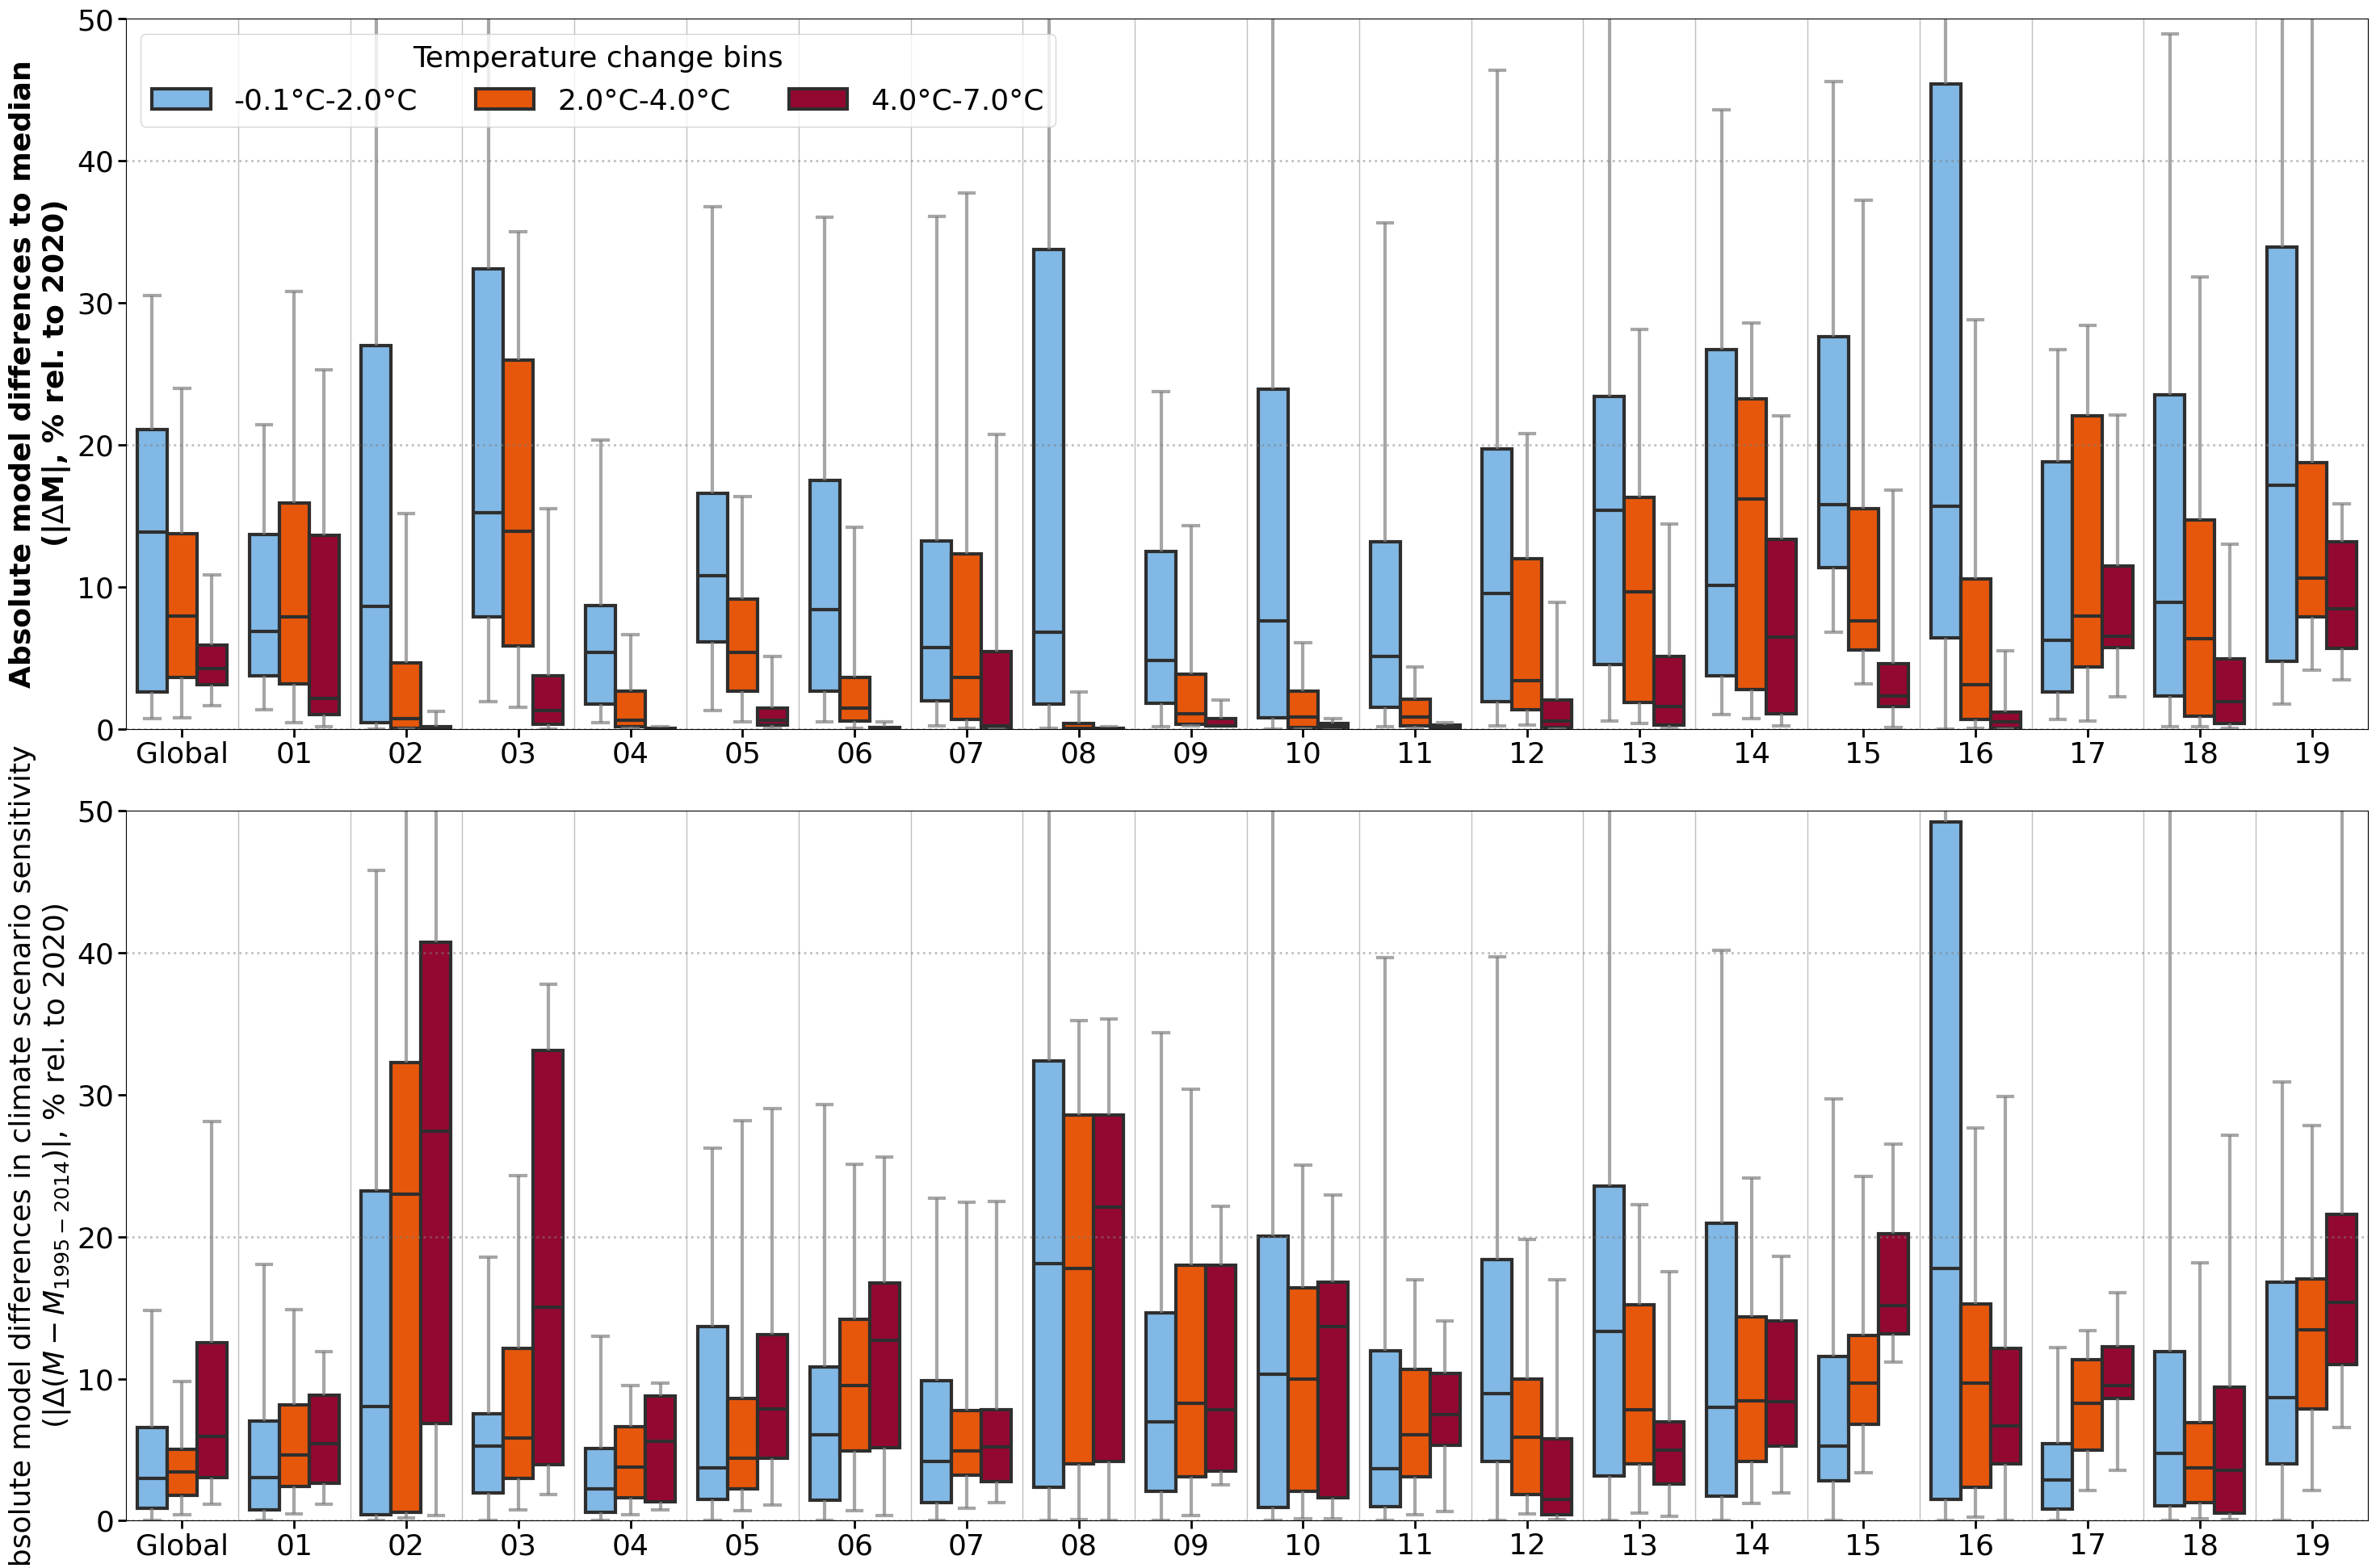

In [26]:

palette_l = []
for temp_ch_med_class in pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models_median[['temp_ch_classes','temp_ch_ipcc']].groupby('temp_ch_classes').median().temp_ch_ipcc:
    print(temp_ch_med_class)
    palette_l.append(cmap(scaler.transform(np.array(temp_ch_med_class).reshape(-1,1))).squeeze())

plt.rc('font', size=26)  
xlim1 = 50
fig, axs = plt.subplots(2,1,figsize=(30,20), sharey=True)
axs = axs.flatten()
ax = axs[0]
sns.boxplot(ax = ax,
    data=pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models, 
                x='rgi_reg', y='absolute delta relative volume change (in %, to median model)',
            #height=10,aspect=0.8,
            hue='temp_ch_classes', 
            palette=palette_l,
                  dodge = True, #hue='ssp',
            fliersize=0,
                  whis = [5,95], 
                  #order = list(_sel_class1_sorted.rgi_reg_long.values), # order after -0.1 to 2.0°C 
            #y = 'time', #hue_order = ['2040', '2100'],
            linewidth=3,
            capprops={'color':'grey', 'alpha':0.7},
            whiskerprops={'color':'grey', 'alpha':0.7},
            saturation = 0.9,
            #hue_order=_hue_order, palette=_pal_models,
           )#legend = True)#legend=legend)
#ax.set_ylabel('Region', fontsize=24)

#ax.set_ylabel(r'Absolute model difference to median (|$\Delta$M|)'+'\n(% rel. to 2020)', weight='bold',fontsize=24)
ax.set_ylabel('Absolute model differences to median\n'+r'(|$\Delta$M|, % rel. to 2020)', weight='bold',fontsize=26)

#_,xlim1 = ax.get_xlim()
ax.set_ylim([0,xlim1])
for n in np.arange(0,xlim1,20):
    ax.axhline(n, color='grey', ls=':', alpha = 0.5, lw=2)
#ax.set_title(_t[len('temp_ch_classes = '):], weight='bold', fontsize=28)
ax.legend(title='Temperature change bins',ncol=8, loc='upper left')
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels, loc='lower left', bbox_to_anchor=(-0.08,1.001), )

# same rel. to ref_period
ax = axs[1]
sns.boxplot(ax = ax,
            data=pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models, 
            x='rgi_reg', y='absolute delta relative volume change (in %, to median model, relative to ref period )',
            #height=10,aspect=0.8,
            hue='temp_ch_classes', 
            palette=palette_l,
            dodge = True, #hue='ssp',
            fliersize=0,
            whis = [5,95], 
            #order = list(_sel_class1_sorted.rgi_reg_long.values), # order after -0.1 to 2.0°C 
            #y = 'time', #hue_order = ['2040', '2100'],
            linewidth=3,
            capprops={'color':'grey', 'alpha':0.7},
            whiskerprops={'color':'grey', 'alpha':0.7},
            saturation = 0.9,
            #hue_order=_hue_order, palette=_pal_models,
           )#legend = True)#legend=legend)
#ax.set_ylabel('Region', fontsize=24)
#state='2020'
#ax.set_ylabel(f'Difference in climate scenario sensitivity\n'+ r'(|$\Delta(M-M_{1995-2014})$|, % rel. to 2020)', #weight='bold',
#              fontsize=24)
ax.set_ylabel('Absolute model differences in climate scenario sensitivity\n'+r'(|$\Delta(M-M_{1995-2014})$|, % rel. to 2020)', #weight='bold',
                          fontsize=26)

#_,xlim1 = ax.get_xlim()
ax.set_ylim([0,xlim1])
for n in np.arange(0,xlim1,20):
    ax.axhline(n, color='grey', ls=':', alpha = 0.5, lw=2)
#ax.set_title(_t[len('temp_ch_classes = '):], weight='bold', fontsize=28)
ax.get_legend().remove() #plt.legend(title='Temperature change bins')
for ax in axs:
    ax.tick_params(axis='both', which='major', width=2, length=7)
    ax.tick_params(axis='both', which='minor', width=1, length=5)
    ax.set_xlabel('')
    for vl in np.arange(0.5,20,1):
        ax.axvline(vl, color='grey', ls='-', alpha = 0.5, lw=1)
plt.tight_layout()
plt.savefig('figures_partB/glacier_model_ss_differences/model_differences_steady_state_overall_boxplots_landscape.png')
plt.savefig('figures_partB/glacier_model_ss_differences/model_differences_steady_state_overall_boxplots_landscape.pdf')

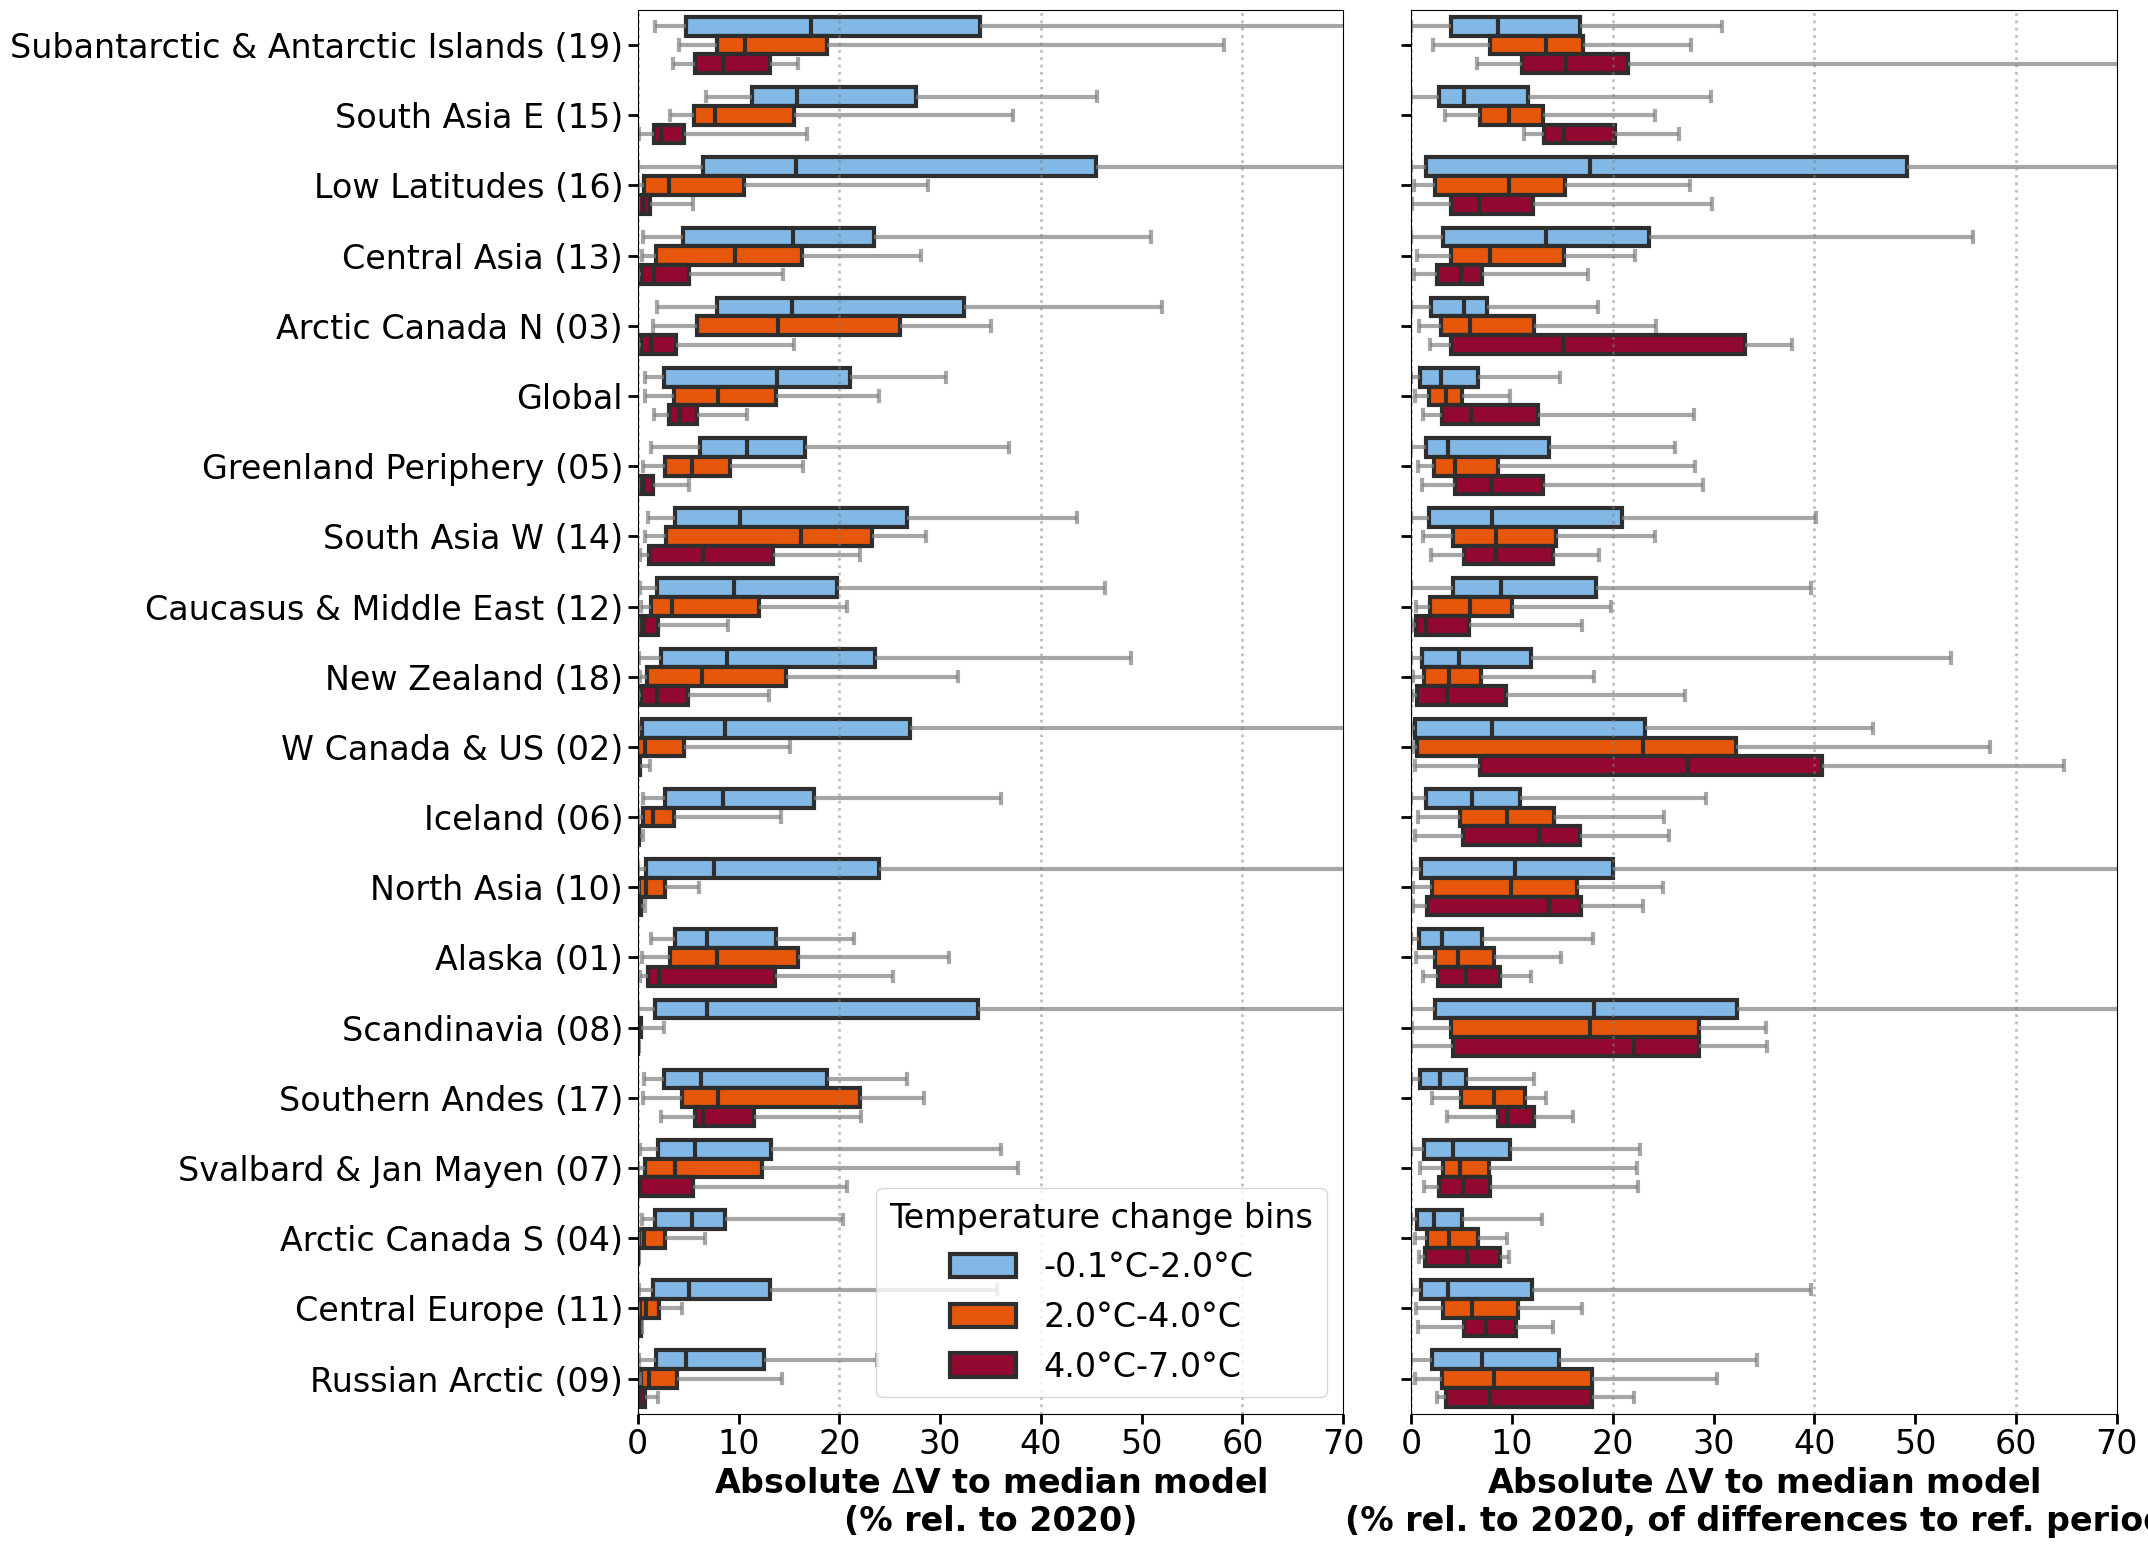

In [27]:
plt.rc('font', size=24)  
xlim1 = 70
fig, axs = plt.subplots(1,2,figsize=(22,16), sharey=True)
ax = axs[0]
sns.boxplot(ax = ax,
    data=pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models, 
                y='rgi_reg_long', x='absolute delta relative volume change (in %, to median model)',
            #height=10,aspect=0.8,
            hue='temp_ch_classes', 
            palette=palette_l,
                  dodge = True, #hue='ssp',
            fliersize=0,
                  whis = [5,95], 
                  order = list(_sel_class1_sorted.rgi_reg_long.values), # order after -0.1 to 2.0°C 
            #y = 'time', #hue_order = ['2040', '2100'],
            linewidth=3,
            capprops={'color':'grey', 'alpha':0.7},
            whiskerprops={'color':'grey', 'alpha':0.7},
            saturation = 0.9,
            #hue_order=_hue_order, palette=_pal_models,
           )#legend = True)#legend=legend)
ax.set_ylabel('Region', fontsize=24)

ax.set_xlabel(r'Absolute $\Delta$V to median model'+'\n(% rel. to 2020)', weight='bold',fontsize=24)

#_,xlim1 = ax.get_xlim()
ax.set_xlim([0,xlim1])
for n in np.arange(0,xlim1,20):
    ax.axvline(n, color='grey', ls=':', alpha = 0.5, lw=2)
#ax.set_title(_t[len('temp_ch_classes = '):], weight='bold', fontsize=28)
ax.legend(title='Temperature change bins')


# same rel. to ref_period
ax = axs[1]
sns.boxplot(ax = ax,
            data=pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models, 
                y='rgi_reg_long', x='absolute delta relative volume change (in %, to median model, relative to ref period )',
            #height=10,aspect=0.8,
            hue='temp_ch_classes', 
            palette=palette_l,
                  dodge = True, #hue='ssp',
            fliersize=0,
                  whis = [5,95], 
                  order = list(_sel_class1_sorted.rgi_reg_long.values), # order after -0.1 to 2.0°C 
            #y = 'time', #hue_order = ['2040', '2100'],
            linewidth=3,
            capprops={'color':'grey', 'alpha':0.7},
            whiskerprops={'color':'grey', 'alpha':0.7},
            saturation = 0.9,
            #hue_order=_hue_order, palette=_pal_models,
           )#legend = True)#legend=legend)
ax.set_ylabel('Region', fontsize=24)

ax.set_xlabel(f'Absolute $\Delta$V to median model\n(% rel. to 2020, of differences to ref. period)', weight='bold',fontsize=24)

#_,xlim1 = ax.get_xlim()
ax.set_xlim([0,xlim1])
for n in np.arange(0,xlim1,20):
    ax.axvline(n, color='grey', ls=':', alpha = 0.5, lw=2)
#ax.set_title(_t[len('temp_ch_classes = '):], weight='bold', fontsize=28)
ax.get_legend().remove() #plt.legend(title='Temperature change bins')
for ax in axs:
    ax.tick_params(axis='both', which='major', width=2, length=7)
    ax.tick_params(axis='both', which='minor', width=1, length=5)
    ax.set_ylabel('')

plt.tight_layout()
plt.savefig('figures_partB/glacier_model_ss_differences/model_differences_steady_state_overall_boxplots.png')
plt.savefig('figures_partB/glacier_model_ss_differences/model_differences_steady_state_overall_boxplots.pdf')

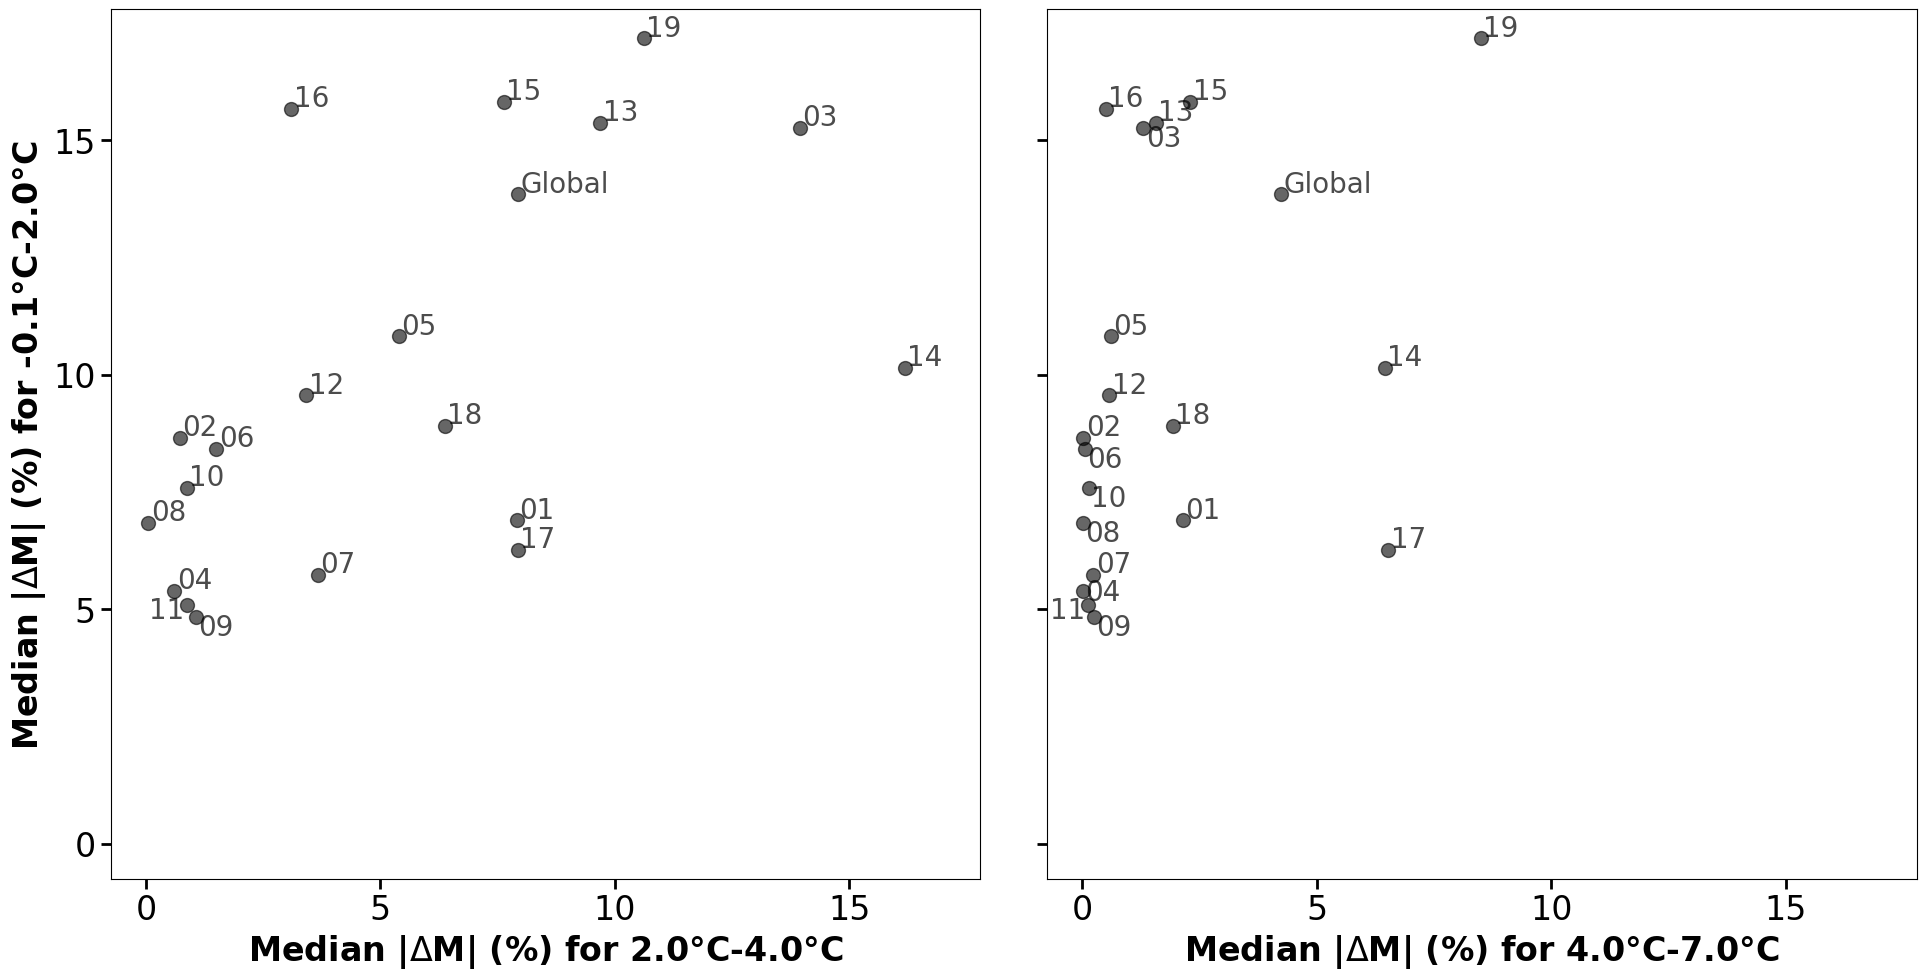

In [28]:
fs = 20
def plotlabel(xvar, yvar, label, ax=None,yshift=0, xshift=0):
    ax.text(xvar+0.05+xshift, yvar+0.05+yshift, label, alpha=0.7, fontsize=fs)


fig, axs = plt.subplots(1,2, figsize=(20,10), sharey=True, sharex=True)
ax = axs[0]
x = _sel_class2['absolute delta relative volume change (in %, to median model)'].values
y =_sel_class1['absolute delta relative volume change (in %, to median model)'].values
ax.plot(x, y, 'o', markersize=10, color='black', alpha = 0.6)
assert list(_sel_class2.rgi_reg) == list(_sel_class1.rgi_reg) # just a check
for j,_ in enumerate(_sel_class1.index):
    if list(_sel_class2.rgi_reg)[j] in ['09']:
        plotlabel(x[j],y[j], list(_sel_class2.rgi_reg)[j], ax=ax, yshift=-0.45)
    elif list(_sel_class2.rgi_reg)[j] in ['11']:
        plotlabel(x[j],y[j], list(_sel_class2.rgi_reg)[j], ax=ax, xshift=-0.85, yshift=-0.35)
    else:
        plotlabel(x[j],y[j], list(_sel_class2.rgi_reg)[j], ax=ax)

    
ylim0,ylim1 = ax.get_ylim()
xlim0,xlim1 = ax.get_xlim()
lim0 = min(ylim0, xlim0)
lim1 = max(ylim1, xlim1)

ax.set_xlabel(r'Median |$\Delta$M| (%) for 2.0°C-4.0°C', weight='bold',fontsize=24)
ax.set_ylabel(r'Median |$\Delta$M| (%) for -0.1°C-2.0°C', weight='bold',fontsize=24)

ax = axs[1]
x = _sel_class3['absolute delta relative volume change (in %, to median model)'].values
y =_sel_class1['absolute delta relative volume change (in %, to median model)'].values
ax.plot(x, y, 'o', markersize=10, color='black', alpha = 0.6)
assert list(_sel_class3.rgi_reg) == list(_sel_class1.rgi_reg) # just a check
for j,_ in enumerate(_sel_class1.index):
    if list(_sel_class2.rgi_reg)[j] in ['03','06','10','08','09']:
        plotlabel(x[j],y[j], list(_sel_class2.rgi_reg)[j], ax=ax, yshift=-0.45)
    elif list(_sel_class2.rgi_reg)[j] in ['04']:
        plotlabel(x[j],y[j], list(_sel_class2.rgi_reg)[j], ax=ax, yshift=-0.25)
    elif list(_sel_class2.rgi_reg)[j] in ['11']:
        plotlabel(x[j],y[j], list(_sel_class2.rgi_reg)[j], ax=ax, xshift=-0.85, yshift=-0.35)
    else:
        plotlabel(x[j],y[j], list(_sel_class3.rgi_reg)[j], ax=ax)

ax.set_xlabel(r'Median |$\Delta$M| (%) for 4.0°C-7.0°C', weight='bold',fontsize=24)
#ax.set_ylabel(r'Median |$\Delta$V| (%) for -0.1°C-2.0°C', weight='bold',fontsize=24)

    
for ax in axs:
    ax.set_aspect('equal')
    ax.set_xlim([lim0, lim1])
    ax.set_ylim([lim0, lim1])

    ax.set_xticks(np.arange(0,lim1,5))
    ax.set_yticks(np.arange(0,lim1,5))
    ax.tick_params(axis='both', which='major', width=2, length=7)
    ax.tick_params(axis='both', which='minor', width=1, length=5)

plt.tight_layout()

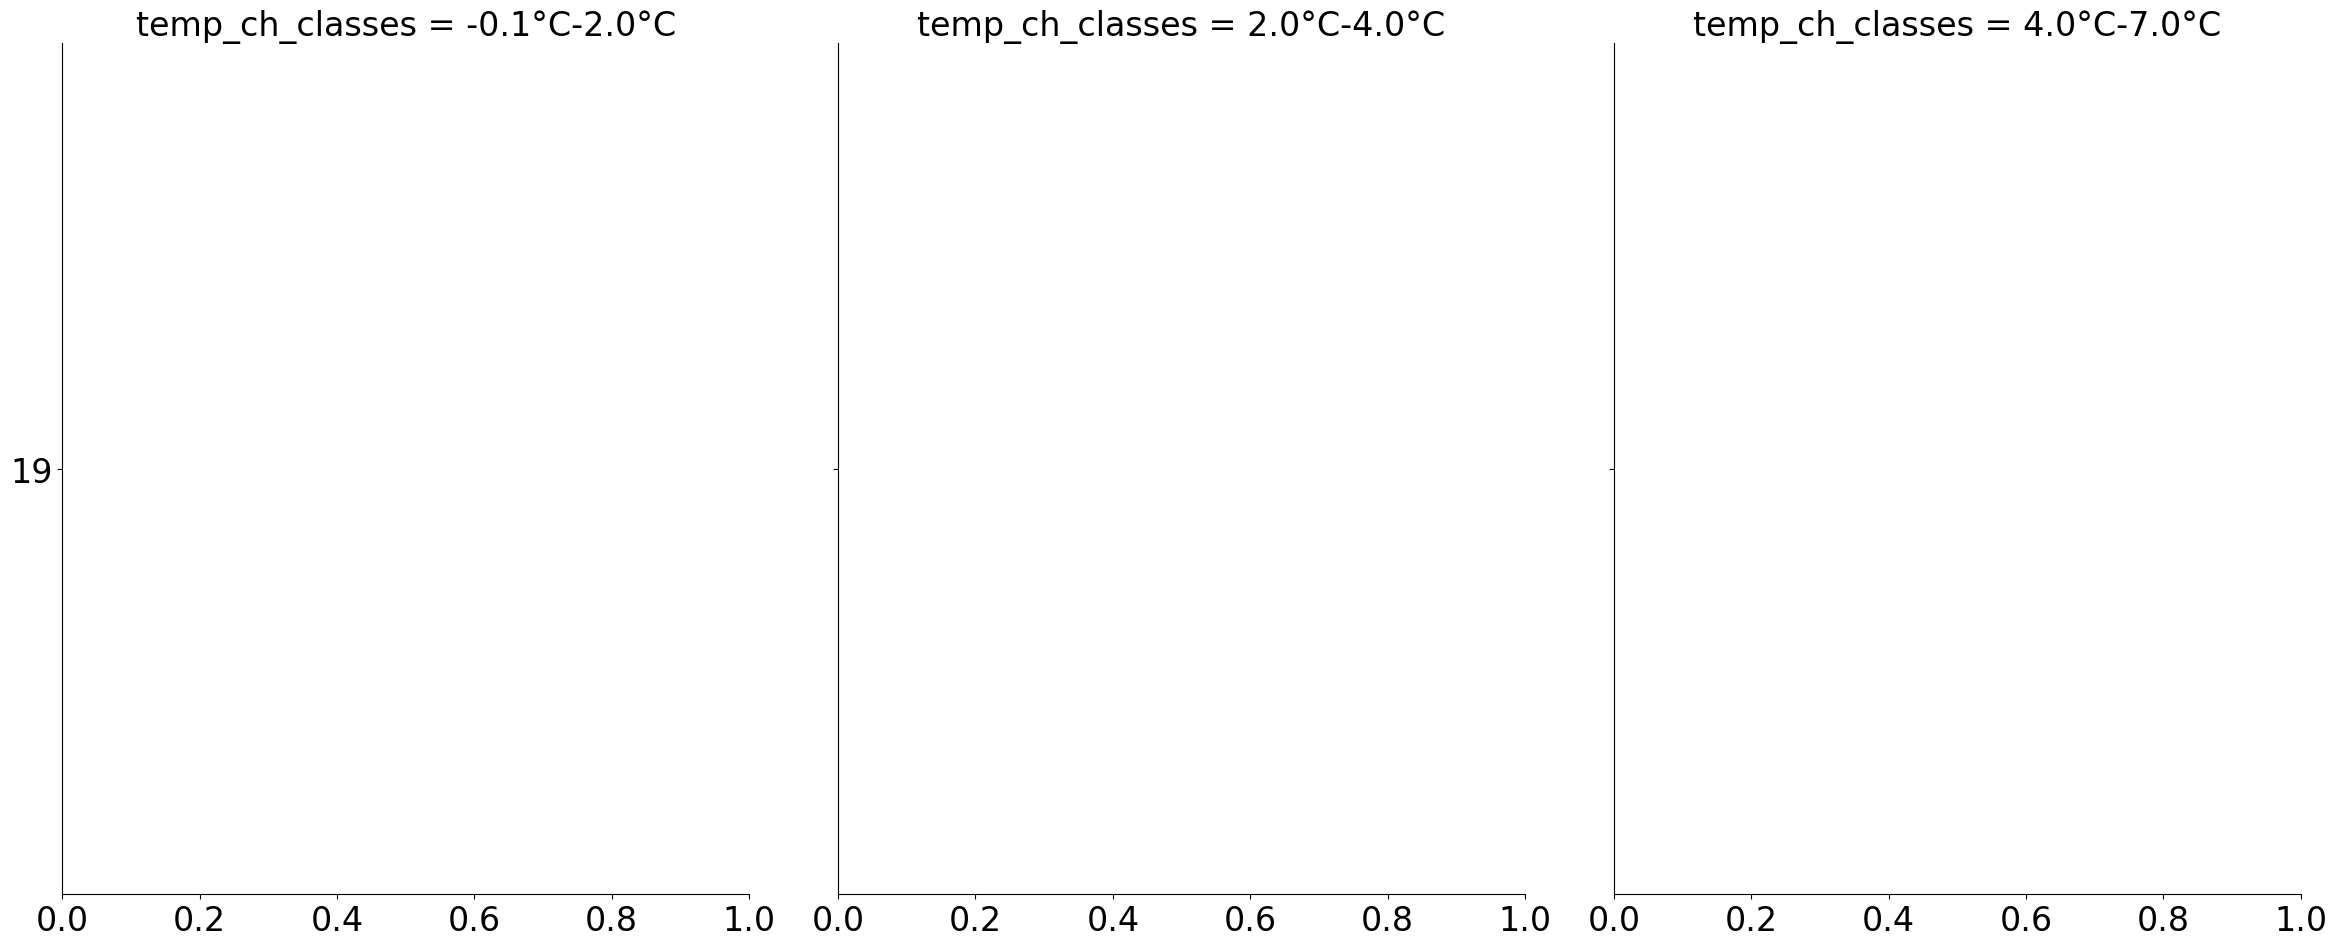

In [29]:
try:
    fig = sns.catplot(data=pd_reg_models_vol_glob_rgi_reg_5000_only_glob_models, 
                    y='rgi_reg', x='absolute delta relative volume change (in %, to median model)',
                height=10,aspect=0.8,
                kind='box',
                col='temp_ch_classes', 
                      sharex=False,
                      dodge = True, #hue='ssp',
                #fliersize=0,
                      whis = [5,95], 
                      order = list(_sel_class1_sorted.rgi_reg.values), # order after -0.1 to 2.0°C 
                #y = 'time', #hue_order = ['2040', '2100'],
                linewidth=3,
                capprops={'color':'grey', 'alpha':0.7},
                whiskerprops={'color':'grey', 'alpha':0.7},
                #hue_order=_hue_order, palette=_pal_models,
               )#legend=legend)
    fig.axes[0][0].set_ylabel('Region', fontsize=24)
    for j,ax in enumerate(fig.axes[0]):
        if j==1:
            ax.set_xlabel(r'Absolute $\Delta$M to median model (% rel. to 2020)', weight='bold',fontsize=24)
        else:
            ax.set_xlabel('')
        _t = ax.get_title()
        _,xlim1 = ax.get_xlim()
        for n in np.arange(0,xlim1,20):
            ax.axvline(n, color='grey', ls=':', alpha = 0.5, lw=2)
        ax.set_title(_t[len('temp_ch_classes = '):], weight='bold', fontsize=28)
except:
    pass

## 1. Normal differences and differences to relative period 

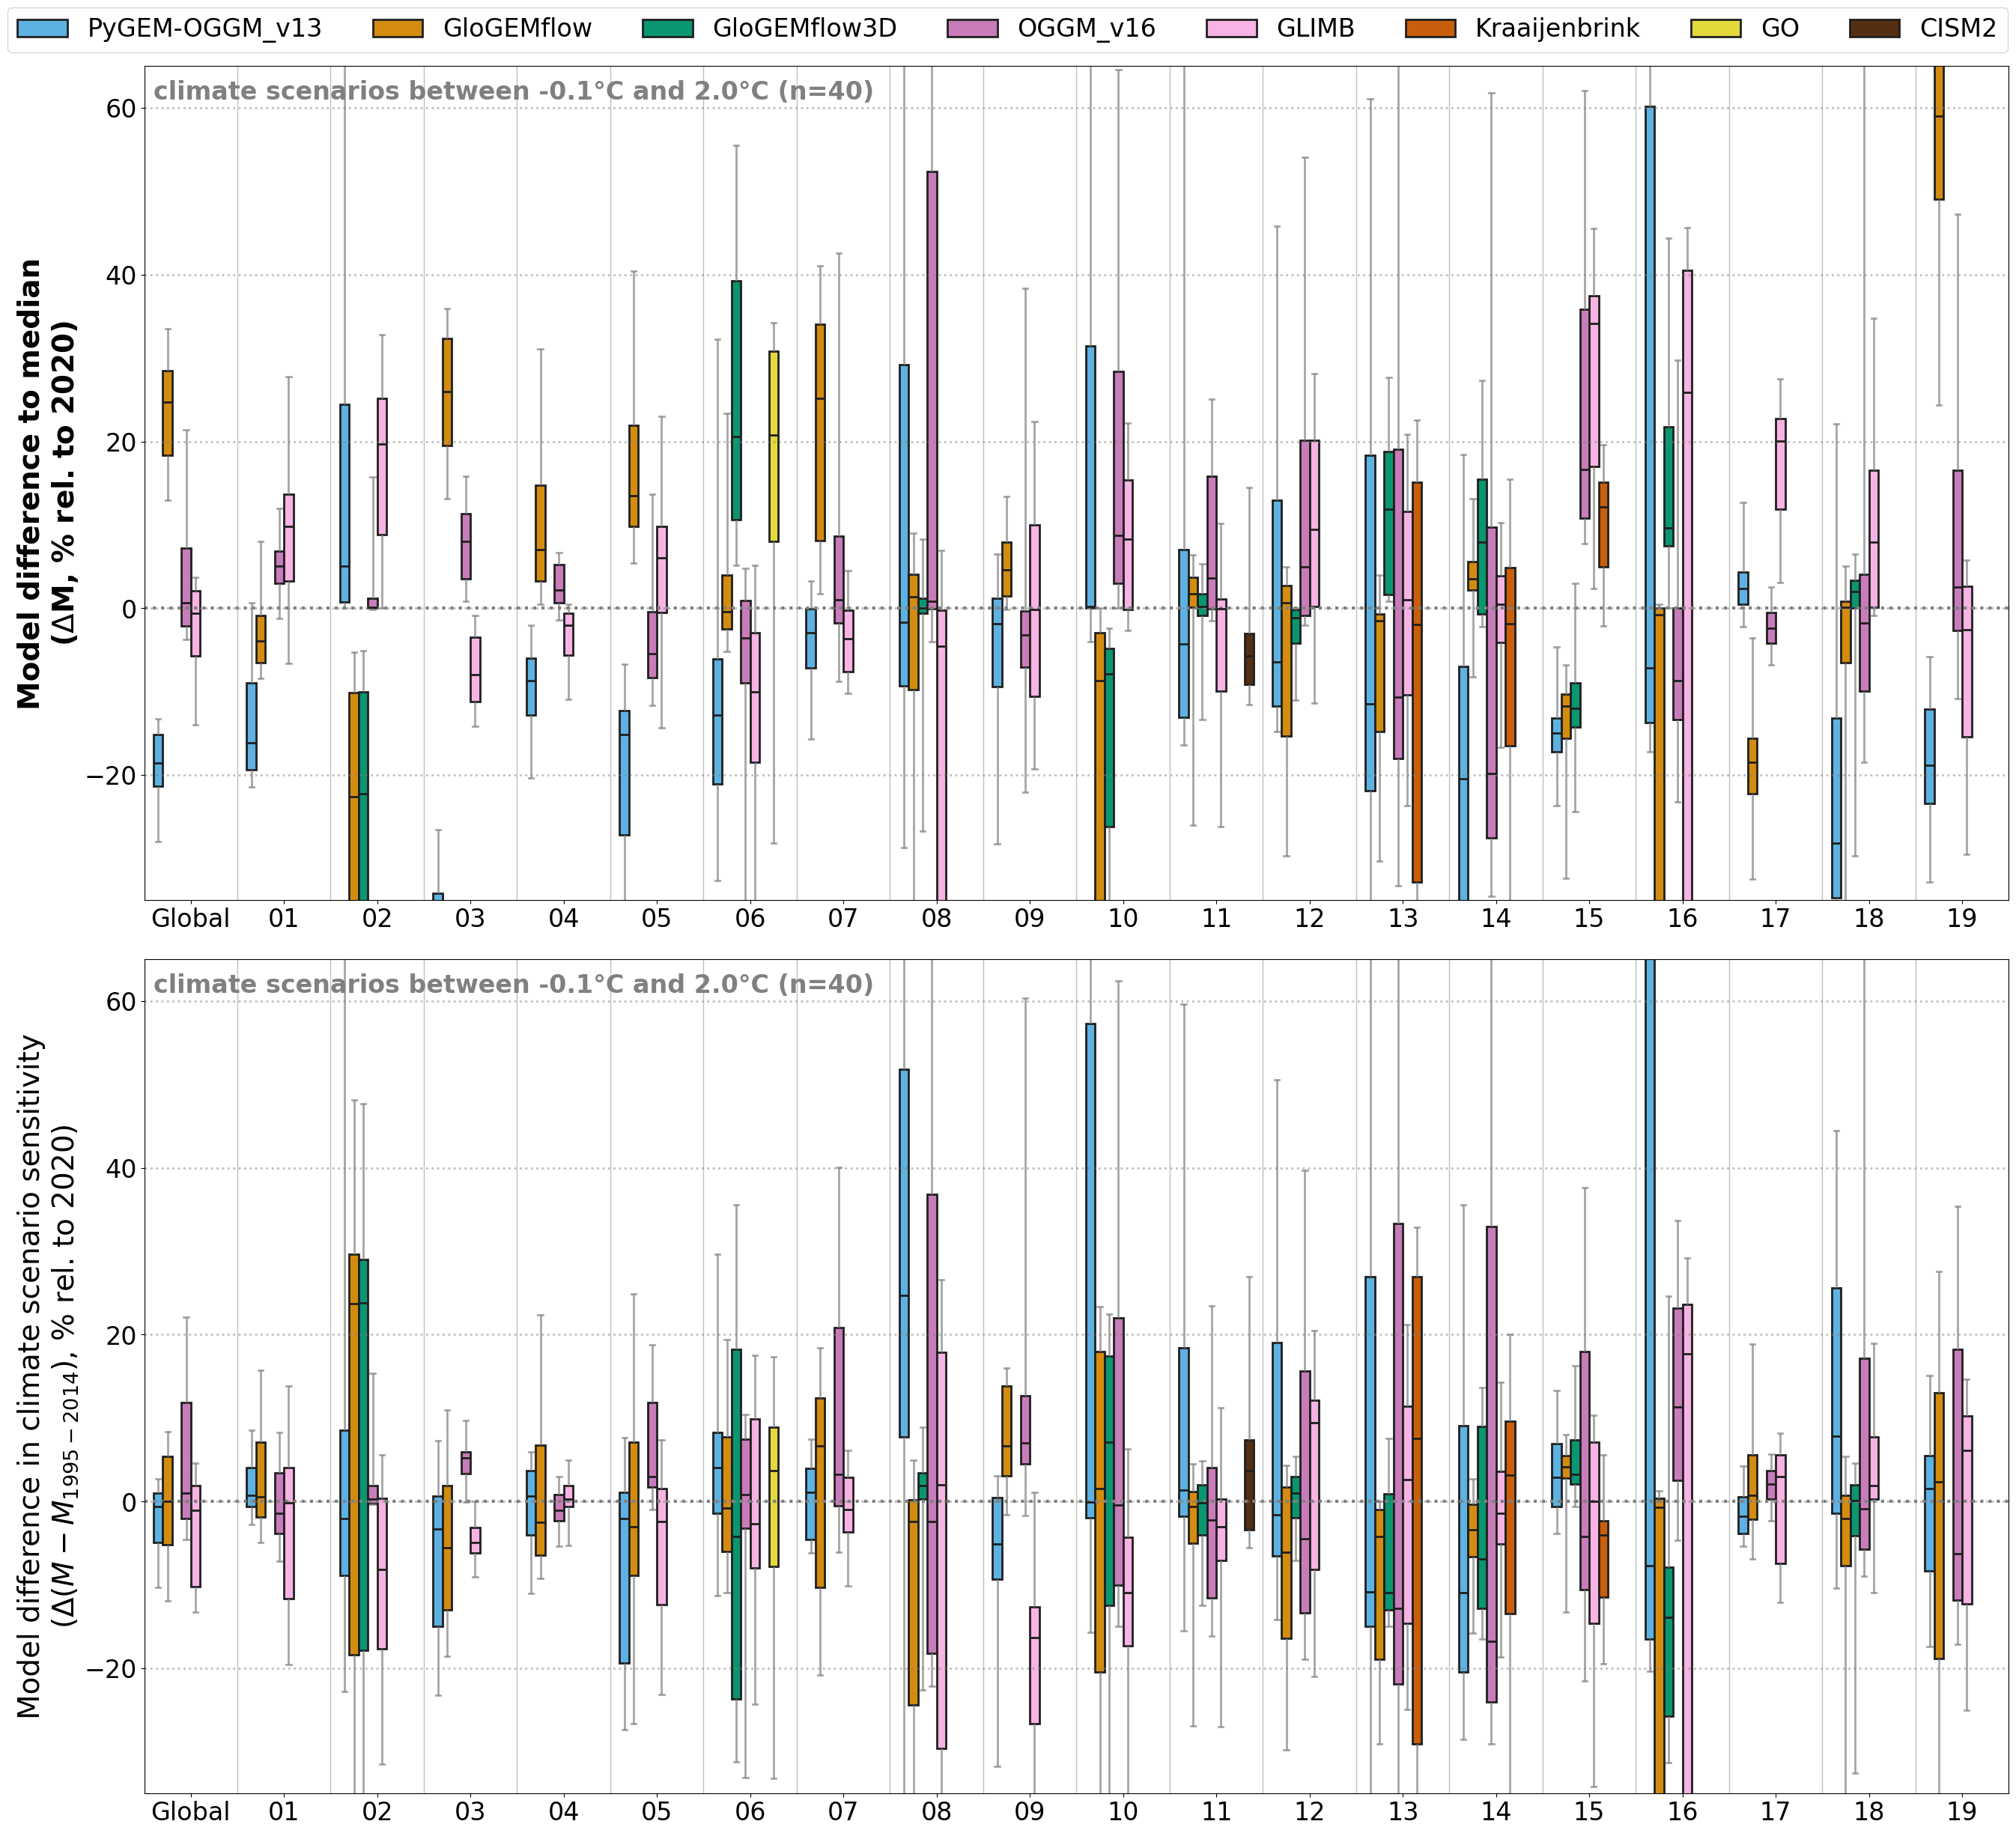

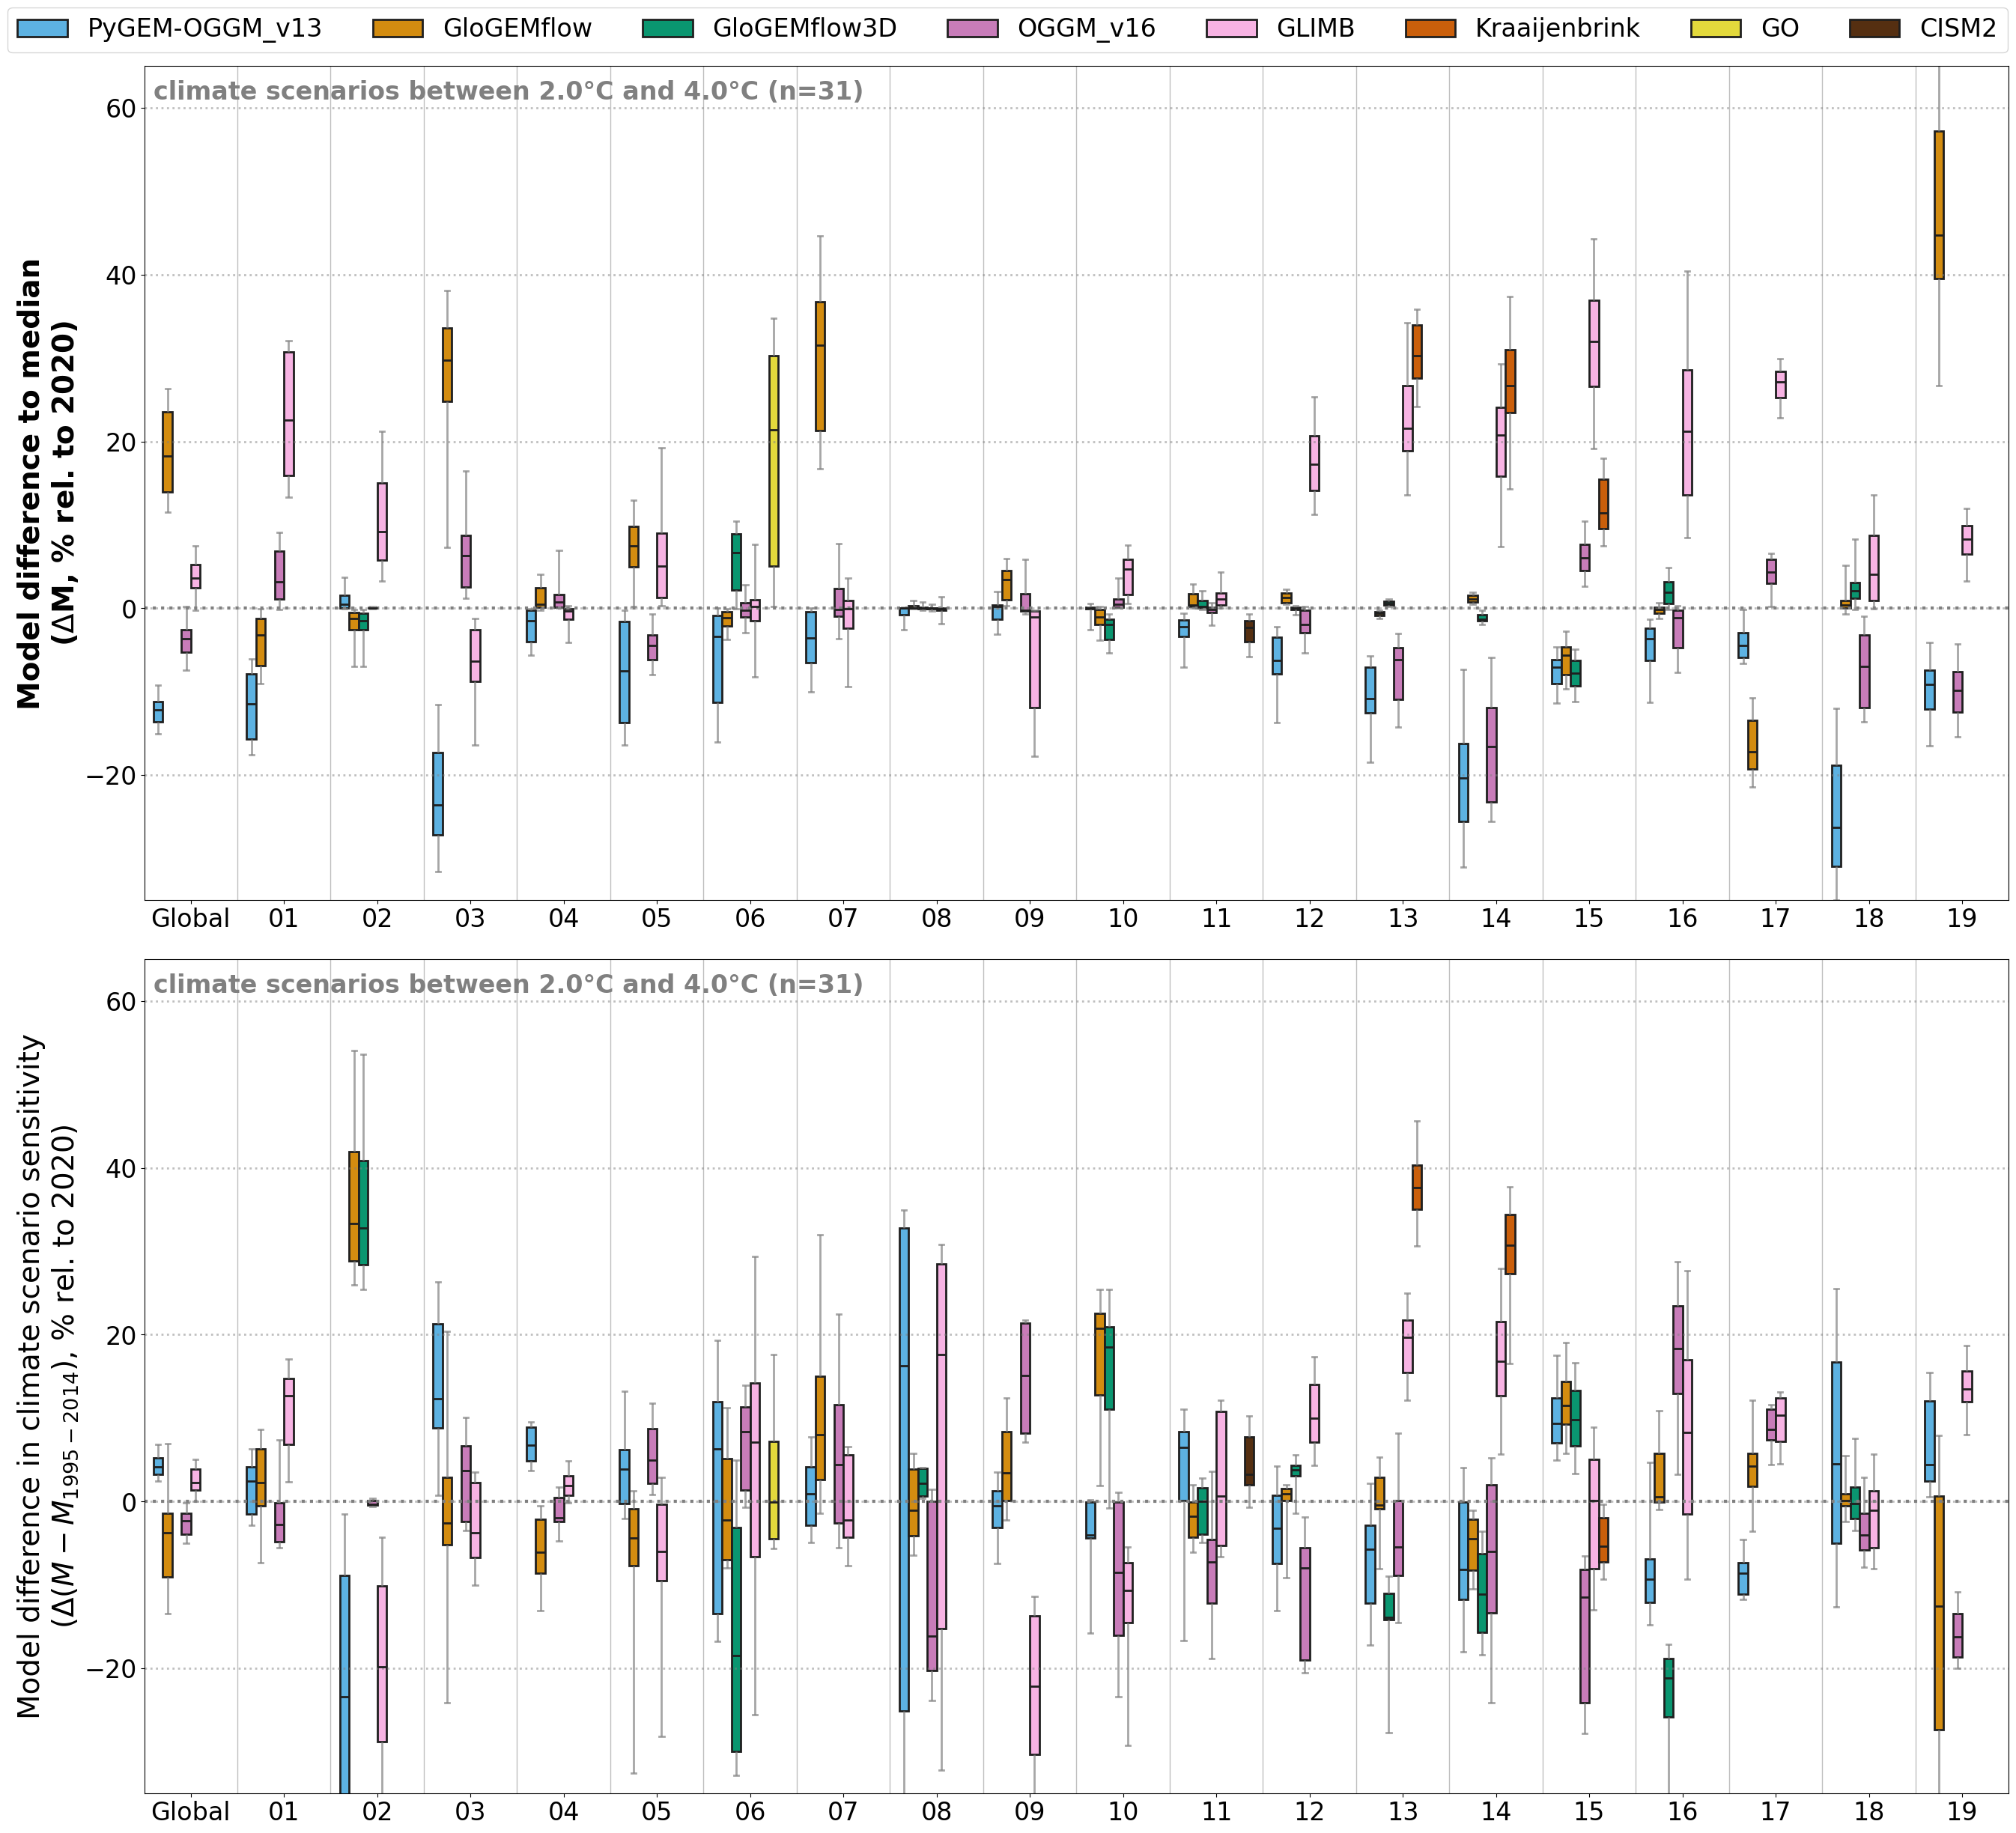

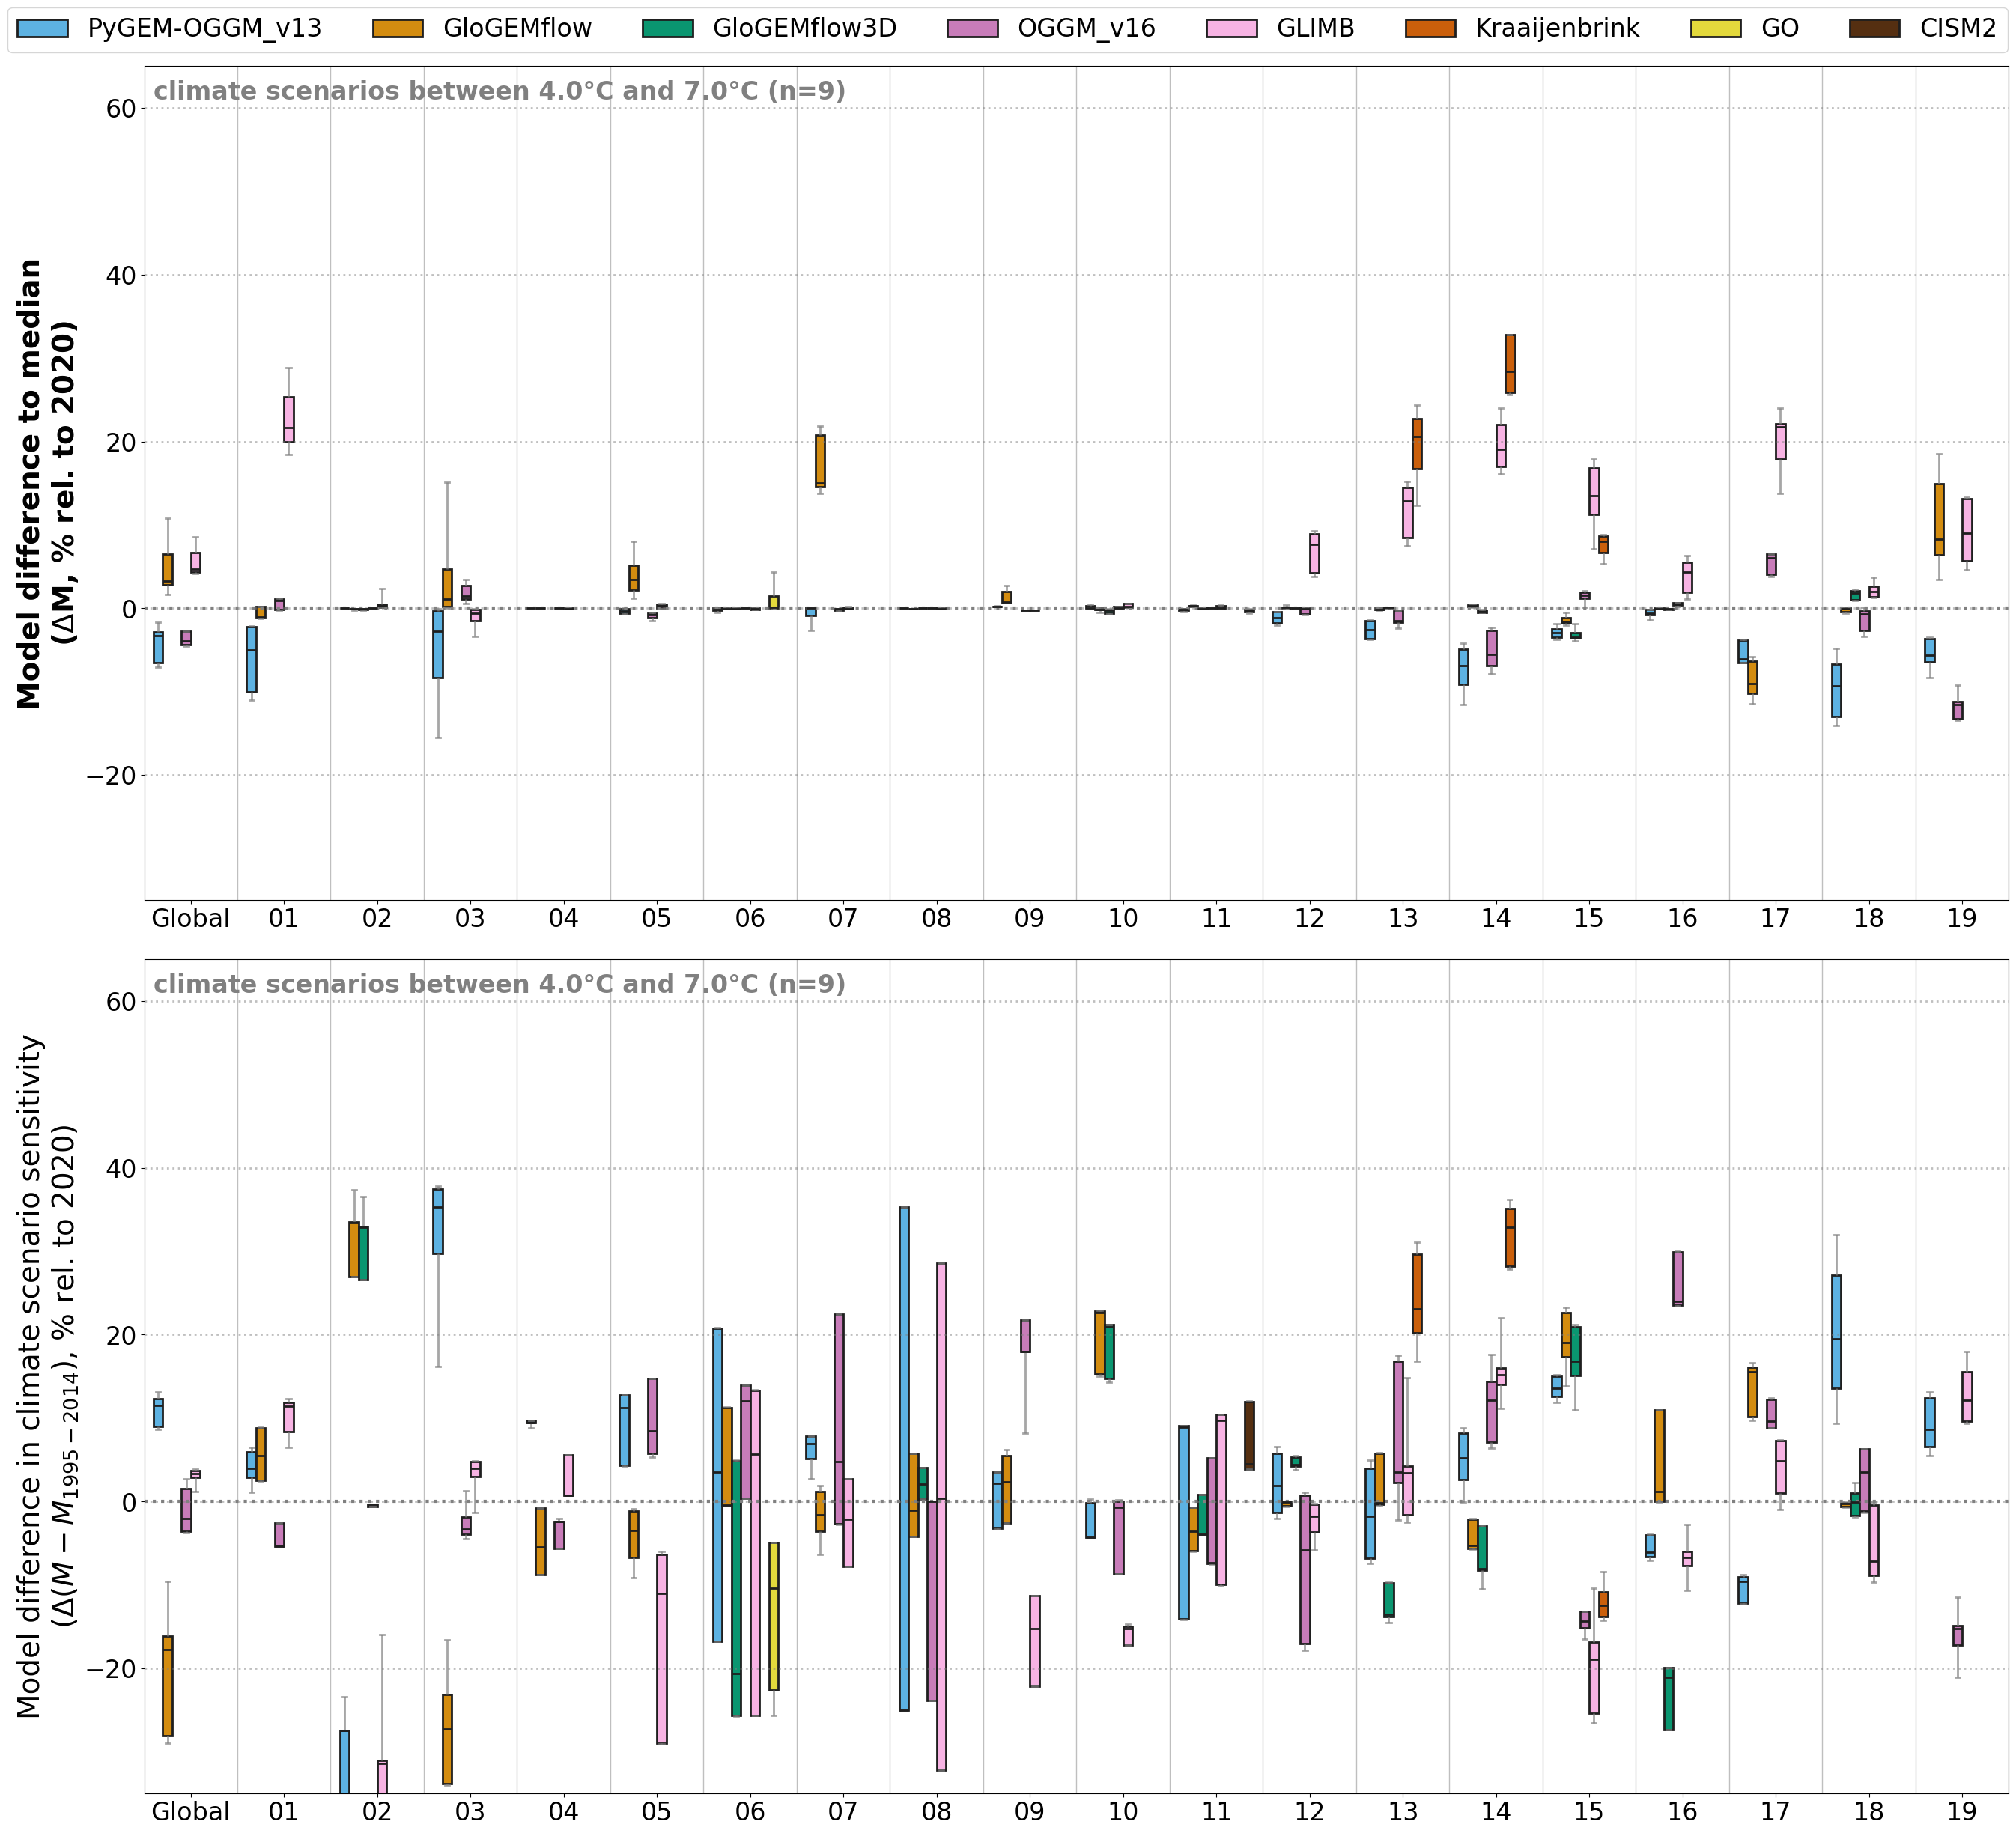

In [30]:
plt.rc('font', size=24)  
text_temp_ch_class_d = {'-0.1°C-2.0°C':'climate scenarios between -0.1°C and 2.0°C (n=40)',
                        '2.0°C-4.0°C':'climate scenarios between 2.0°C and 4.0°C (n=31)',
                        '4.0°C-7.0°C':'climate scenarios between 4.0°C and 7.0°C (n=9)'}
for temp_ch_class in text_temp_ch_class_d.keys():
    
    fig, axs = plt.subplots(2,1,figsize=(29.5,25), sharey=True)
    axs = axs.flatten()
    for j,ax in enumerate(axs): 
        if j == 0: 
            pd_reg_models_vol_5000_onlyT2T4 = pd_reg_models_vol_all_5000.loc[pd_reg_models_vol_all_5000.temp_ch_classes==temp_ch_class]
            y = 'delta relative volume change (in %, to median model)'

        else:
            pd_reg_models_vol_5000_onlyT2T4 =pd_reg_models_vol_all_5000_no_ref_period.loc[pd_reg_models_vol_all_5000_no_ref_period.temp_ch_classes==temp_ch_class]
            y = 'delta relative volume change (in %, to median model, relative to ref period )'

        only_comparing_glogemflow = False
        if only_comparing_glogemflow:
            pd_reg_models_vol_5000_onlyT2T4 = pd_reg_models_vol_5000_onlyT2T4.loc[(pd_reg_models_vol_5000_onlyT2T4.model_author=='GloGEMflow') |
                                                                                  (pd_reg_models_vol_5000_onlyT2T4.model_author=='GloGEMflow3D')]
            hue_ord = ['GloGEMflow', 'GloGEMflow3D']
            pal_mod = [pal_models[1], pal_models[2]]
        else:
            hue_ord = hue_order
            pal_mod = pal_models

        xlim0=-35
        xlim1 = 65
        sns.boxplot(data=pd_reg_models_vol_5000_onlyT2T4,
                    ax = ax,
                    y=y,
                    x='rgi_reg', hue='model_author', hue_order=hue_ord, palette=pal_mod,
                   fliersize=0, whis = [5,95], 
                          dodge = True, #hue='ssp',
                          #order = list(_sel_class1_sorted.rgi_reg_long.values), # order after -0.1 to 2.0°C 
                    #y = 'time', #hue_order = ['2040', '2100'],
                    linewidth=2,
                    capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7},
                    saturation = 0.9,
                    #legend=False
                    #hue_order=_hue_order, palette=_pal_models,
                   )#legend = True)#legend=legend)
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc='lower left', bbox_to_anchor=(-0.08,1.001), ncol=8)
        #_,xlim1 = ax.get_xlim()
        ax.set_ylim([xlim0,xlim1])
        if j==1:
            ax.get_legend().remove()
            ax.set_ylabel('Model difference in climate scenario sensitivity\n'+r'($\Delta(M-M_{1995-2014})$, % rel. to 2020)', #weight='bold',
                          fontsize=28)
        else:
            ax.set_ylabel('Model difference to median\n'+r'($\Delta$M, % rel. to 2020)', weight='bold',fontsize=28)


        ax.set_xlabel('', fontsize=26)
        for n in np.arange(xlim0+15,xlim1,20):
            ax.axhline(n, color='grey', ls=':', alpha = 0.5, lw=2)
        ax.axhline(0, color='grey', ls=':', alpha = 1, lw=3)
        for vl in np.arange(0.5,20,1):
            ax.axvline(vl, color='grey', ls='-', alpha = 0.5, lw=1)
        ax.text(-0.4,61, text_temp_ch_class_d[temp_ch_class], color='grey', weight='bold')
    plt.tight_layout()
    if only_comparing_glogemflow:
        plt.savefig(f'figures_partB/glacier_model_ss_differences/glogemflow_vs_3d_steady_state_only_{temp_ch_class}.png')
    plt.savefig(f'figures_partB/glacier_model_ss_differences/steady_state_only_{temp_ch_class}.png')

- todo: maybe add how much is lost on median in this range, or using the lowess fit range from 2.0 to 4.0°C
## described for experiments at 2.0°C to 4.0°C... 
- PyGEM-OGGM is globally, and in regions 01,03, 04,05,06,07,11,12,13,14,16, and 18 the models where most glacier mass loss is projected in steady-state. 
- GloGEMflow is Globally and specifically in the regions 03, 07, and 19 by far the glacier model where most mass remains in steady-state
    - in regions 02 and 10, GloGEMflow is more temperature sensitive than the other models
- GloGEMflow and GloGEMflow3D are relatively similar where the one model results in more mass loss in one region, while the other model results in more mass loss in another region. For Iceland, the differences are the largest, with almost 10% less mass lost under GloGEMflow3d compared to GloGEMflow. In Iceland, GloGEMflow3d is much less temperature sensitive than GloGEMflow, a pattern that is similarly visible in 13,14 and even more pronounced in Low Latitudes (16). 
- GLIMB projects the least mass loss in 01, 02, 10, 12,15,16,17. 
- Kraaijenbrink et al. (available for 13,14,15) projects even less mass loss than GLIMB in 13, 14, where it is also the most sensitive to temperature 
- OGGM_v16 often projects mass loss near to the median but projects almost similarly large  mass losses as PyGEM-OGGM_v13 in 13,14 and slightly more mass losses than PyGEM-OGGM_v13 in 19. 
    - Although the steady state is similar at 2.0°C to 4.0°C for OGGM_v16 and GloGEMflow. OGGM projects a much smaller mass loss difference to the 1995-2014 climate change scenario than PyGEM-OGGM_v16... 
- In Iceland, the model "GO" projects on median more than 20% less mass loss than the median over the glacier models. The mass loss differences to the 1995-2014 climate change scenario are similar to other models, showing that the bias remains over the scenarios ... suppl. fig. .. 
- CISM2, available in Central Europe, projects similarly large mass losses as PyGEM-OGGM_v13. The sensitivity of the varying climate (lower plot) is larger than the median. 

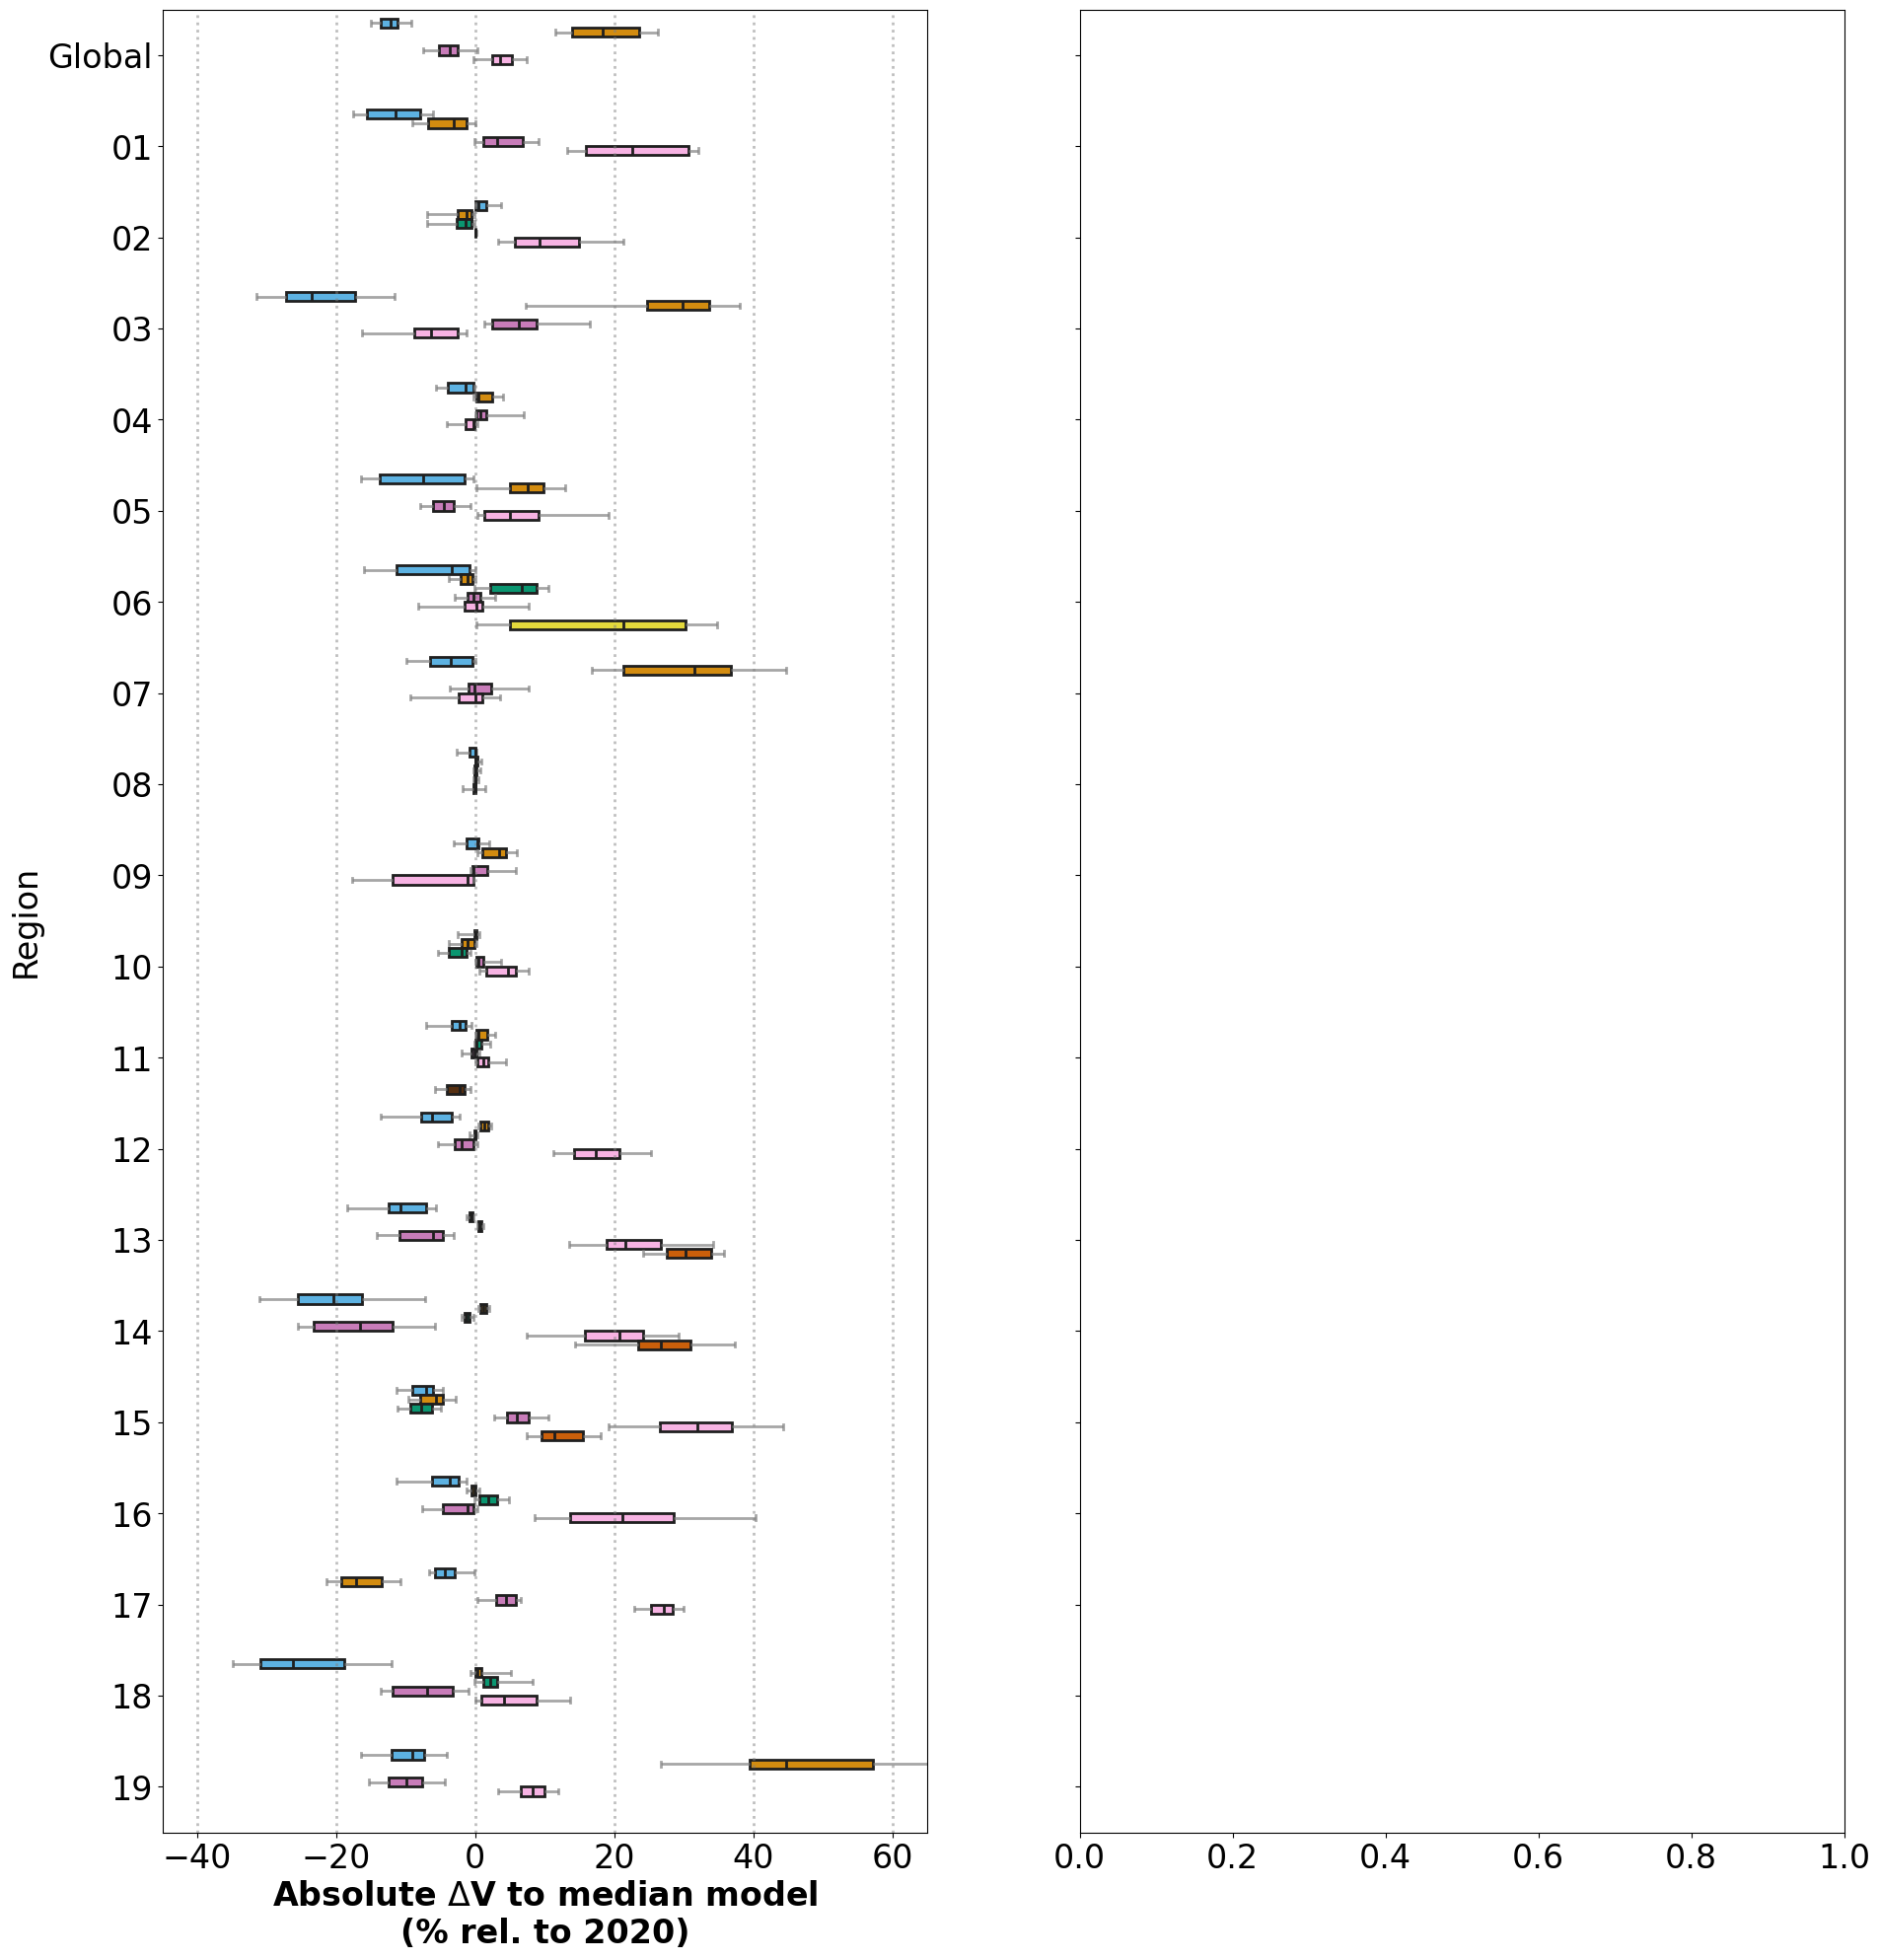

In [31]:
plt.rc('font', size=24)  
xlim0=-45
xlim1 = 65
fig, axs = plt.subplots(1,2,figsize=(22,24), sharey=True)
ax = axs[0]
pd_reg_models_vol_5000_onlyT2T4 = pd_reg_models_vol_all_5000.loc[pd_reg_models_vol_all_5000.temp_ch_classes=='2.0°C-4.0°C']
sns.boxplot(data=pd_reg_models_vol_5000_onlyT2T4,
            ax = ax,
            x='delta relative volume change (in %, to median model)',
            y='rgi_reg', hue='model_author', hue_order=hue_order, palette=pal_models,
           fliersize=0, whis = [5,95], 
                  dodge = True, #hue='ssp',
                  #order = list(_sel_class1_sorted.rgi_reg_long.values), # order after -0.1 to 2.0°C 
            #y = 'time', #hue_order = ['2040', '2100'],
            linewidth=2,
            capprops={'color':'grey', 'alpha':0.7},
            whiskerprops={'color':'grey', 'alpha':0.7},
            saturation = 0.9,
            #legend=False
            #hue_order=_hue_order, palette=_pal_models,
           )#legend = True)#legend=legend)
ax.set_ylabel('Region', fontsize=24)
handles, labels = ax.get_legend_handles_labels()
ax.set_xlabel(r'Absolute $\Delta$V to median model'+'\n(% rel. to 2020)', weight='bold',fontsize=24)
ax.get_legend().remove()
#_,xlim1 = ax.get_xlim()
ax.set_xlim([xlim0,xlim1])
for n in np.arange(xlim0+5,xlim1,20):
    ax.axvline(n, color='grey', ls=':', alpha = 0.5, lw=2)
#ax.set_title(_t[len('temp_ch_classes = '):], weight='bold', fontsize=28)



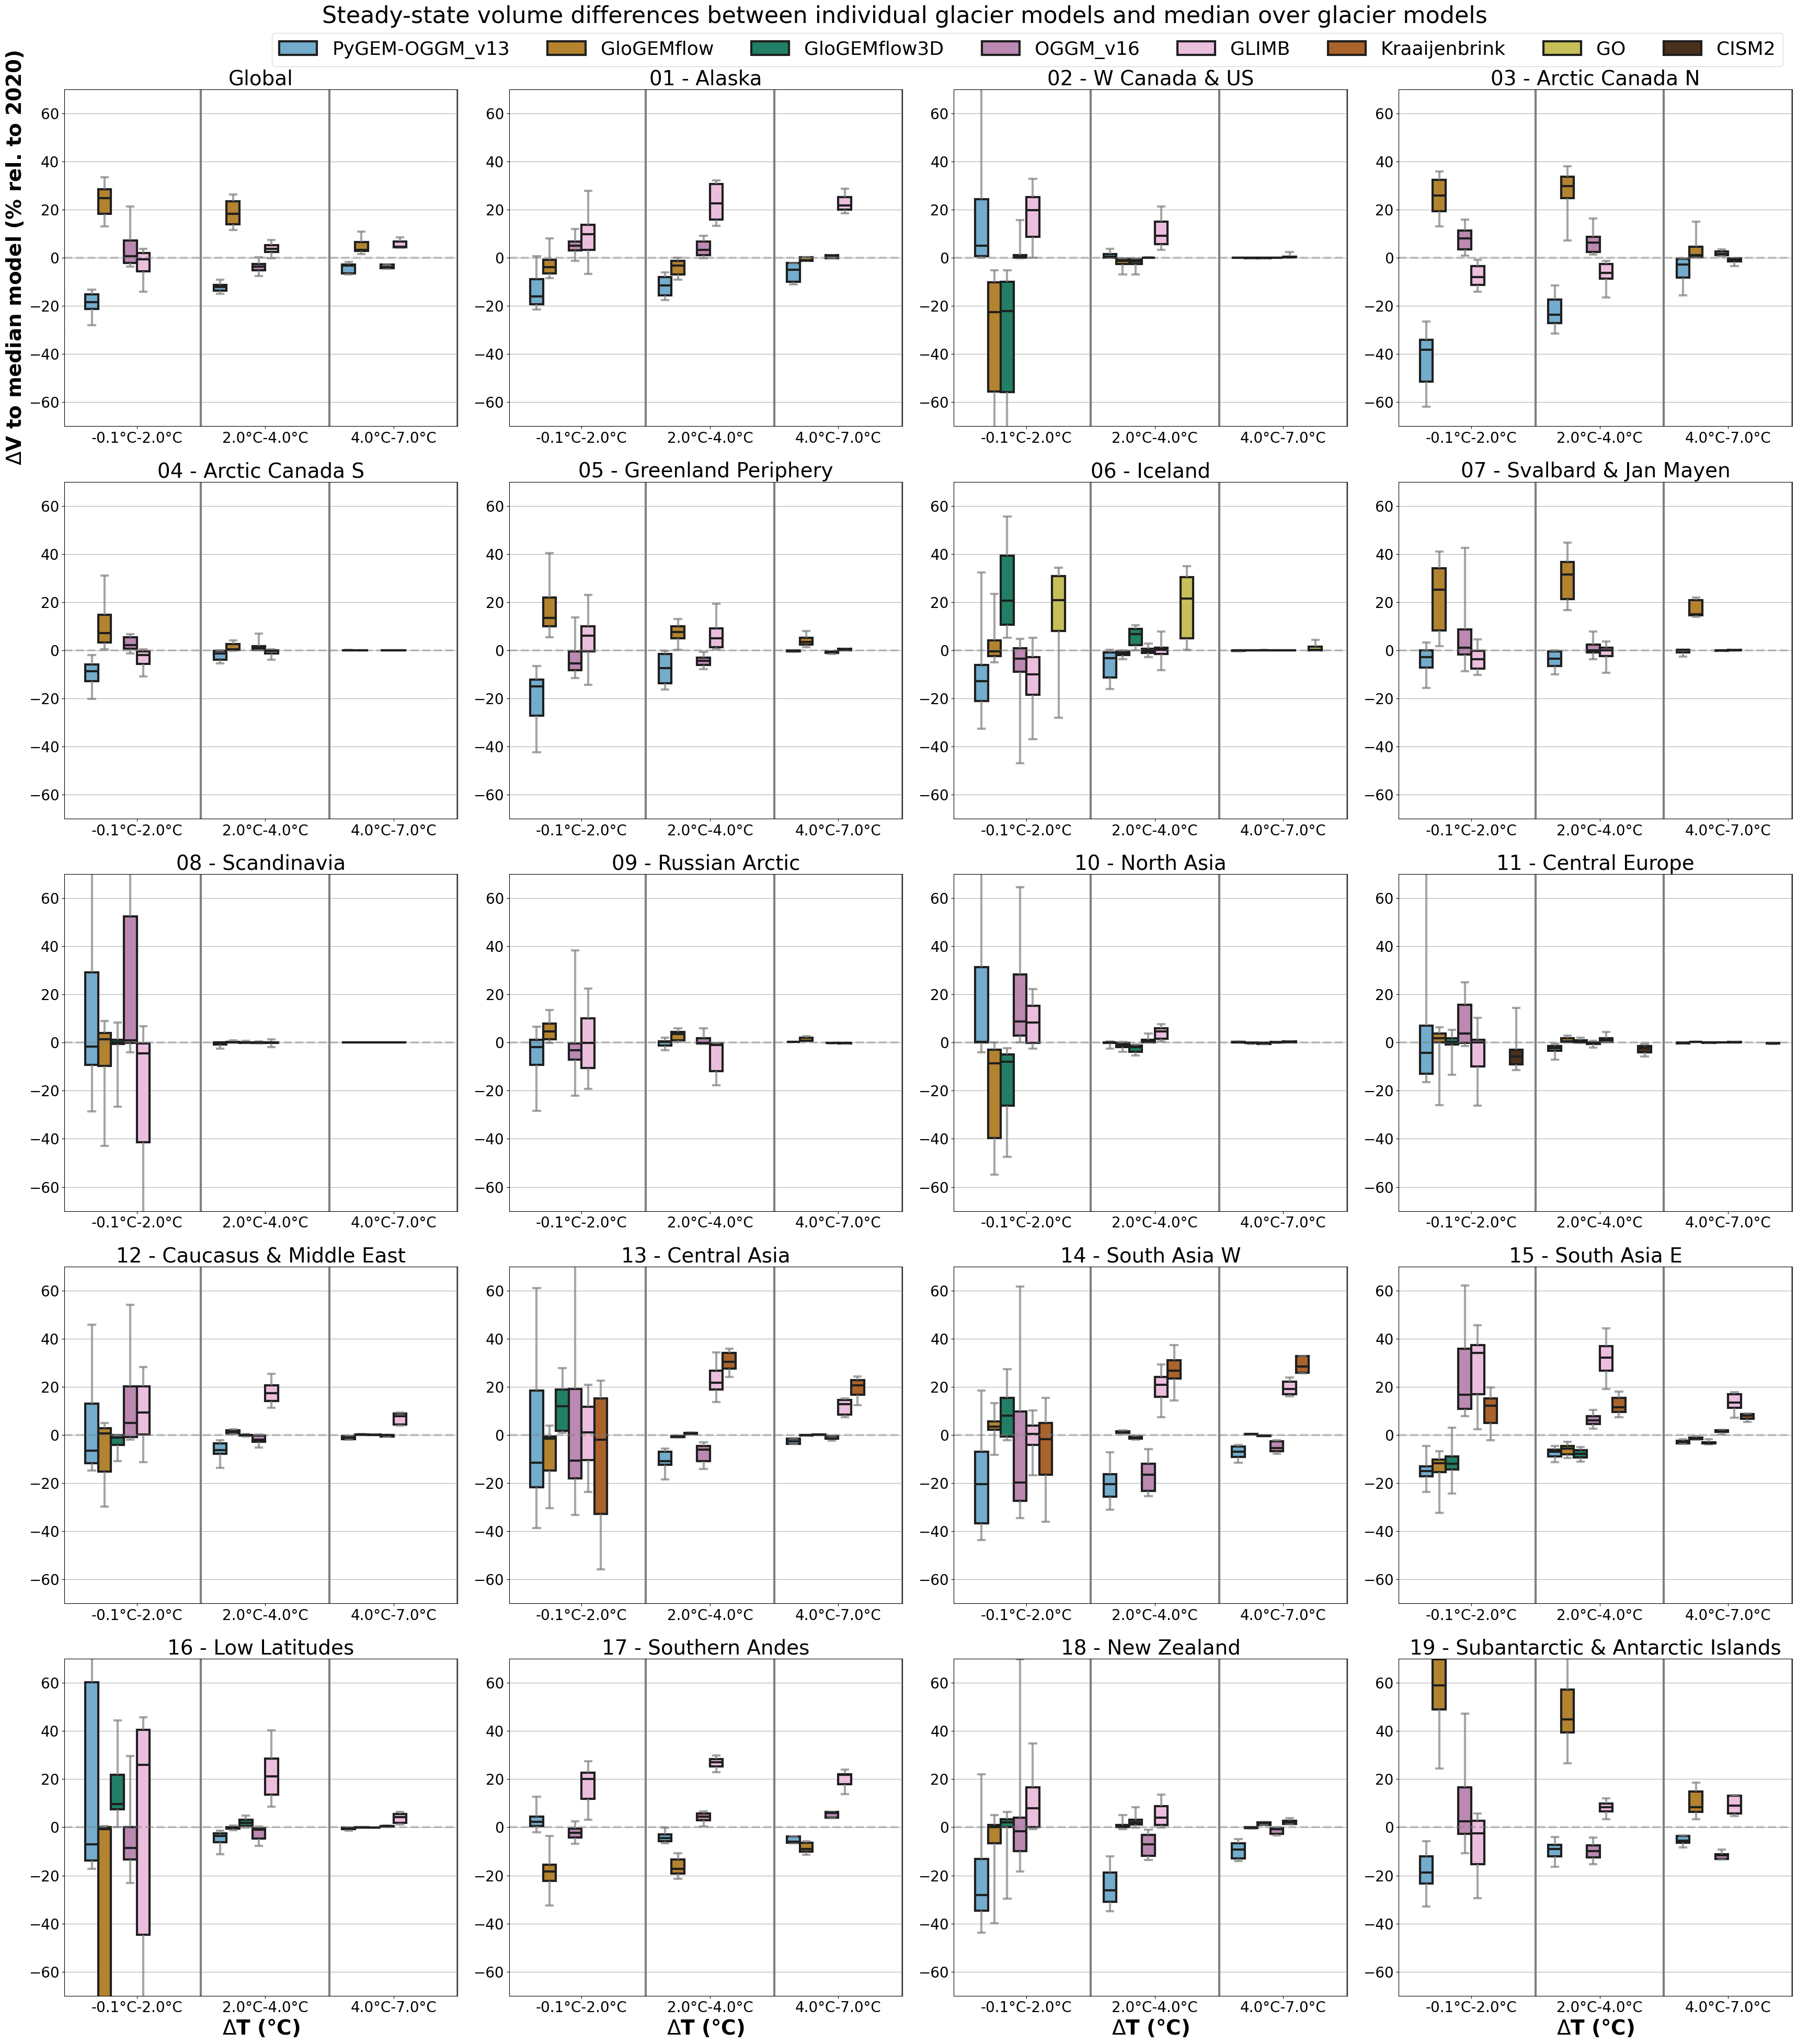

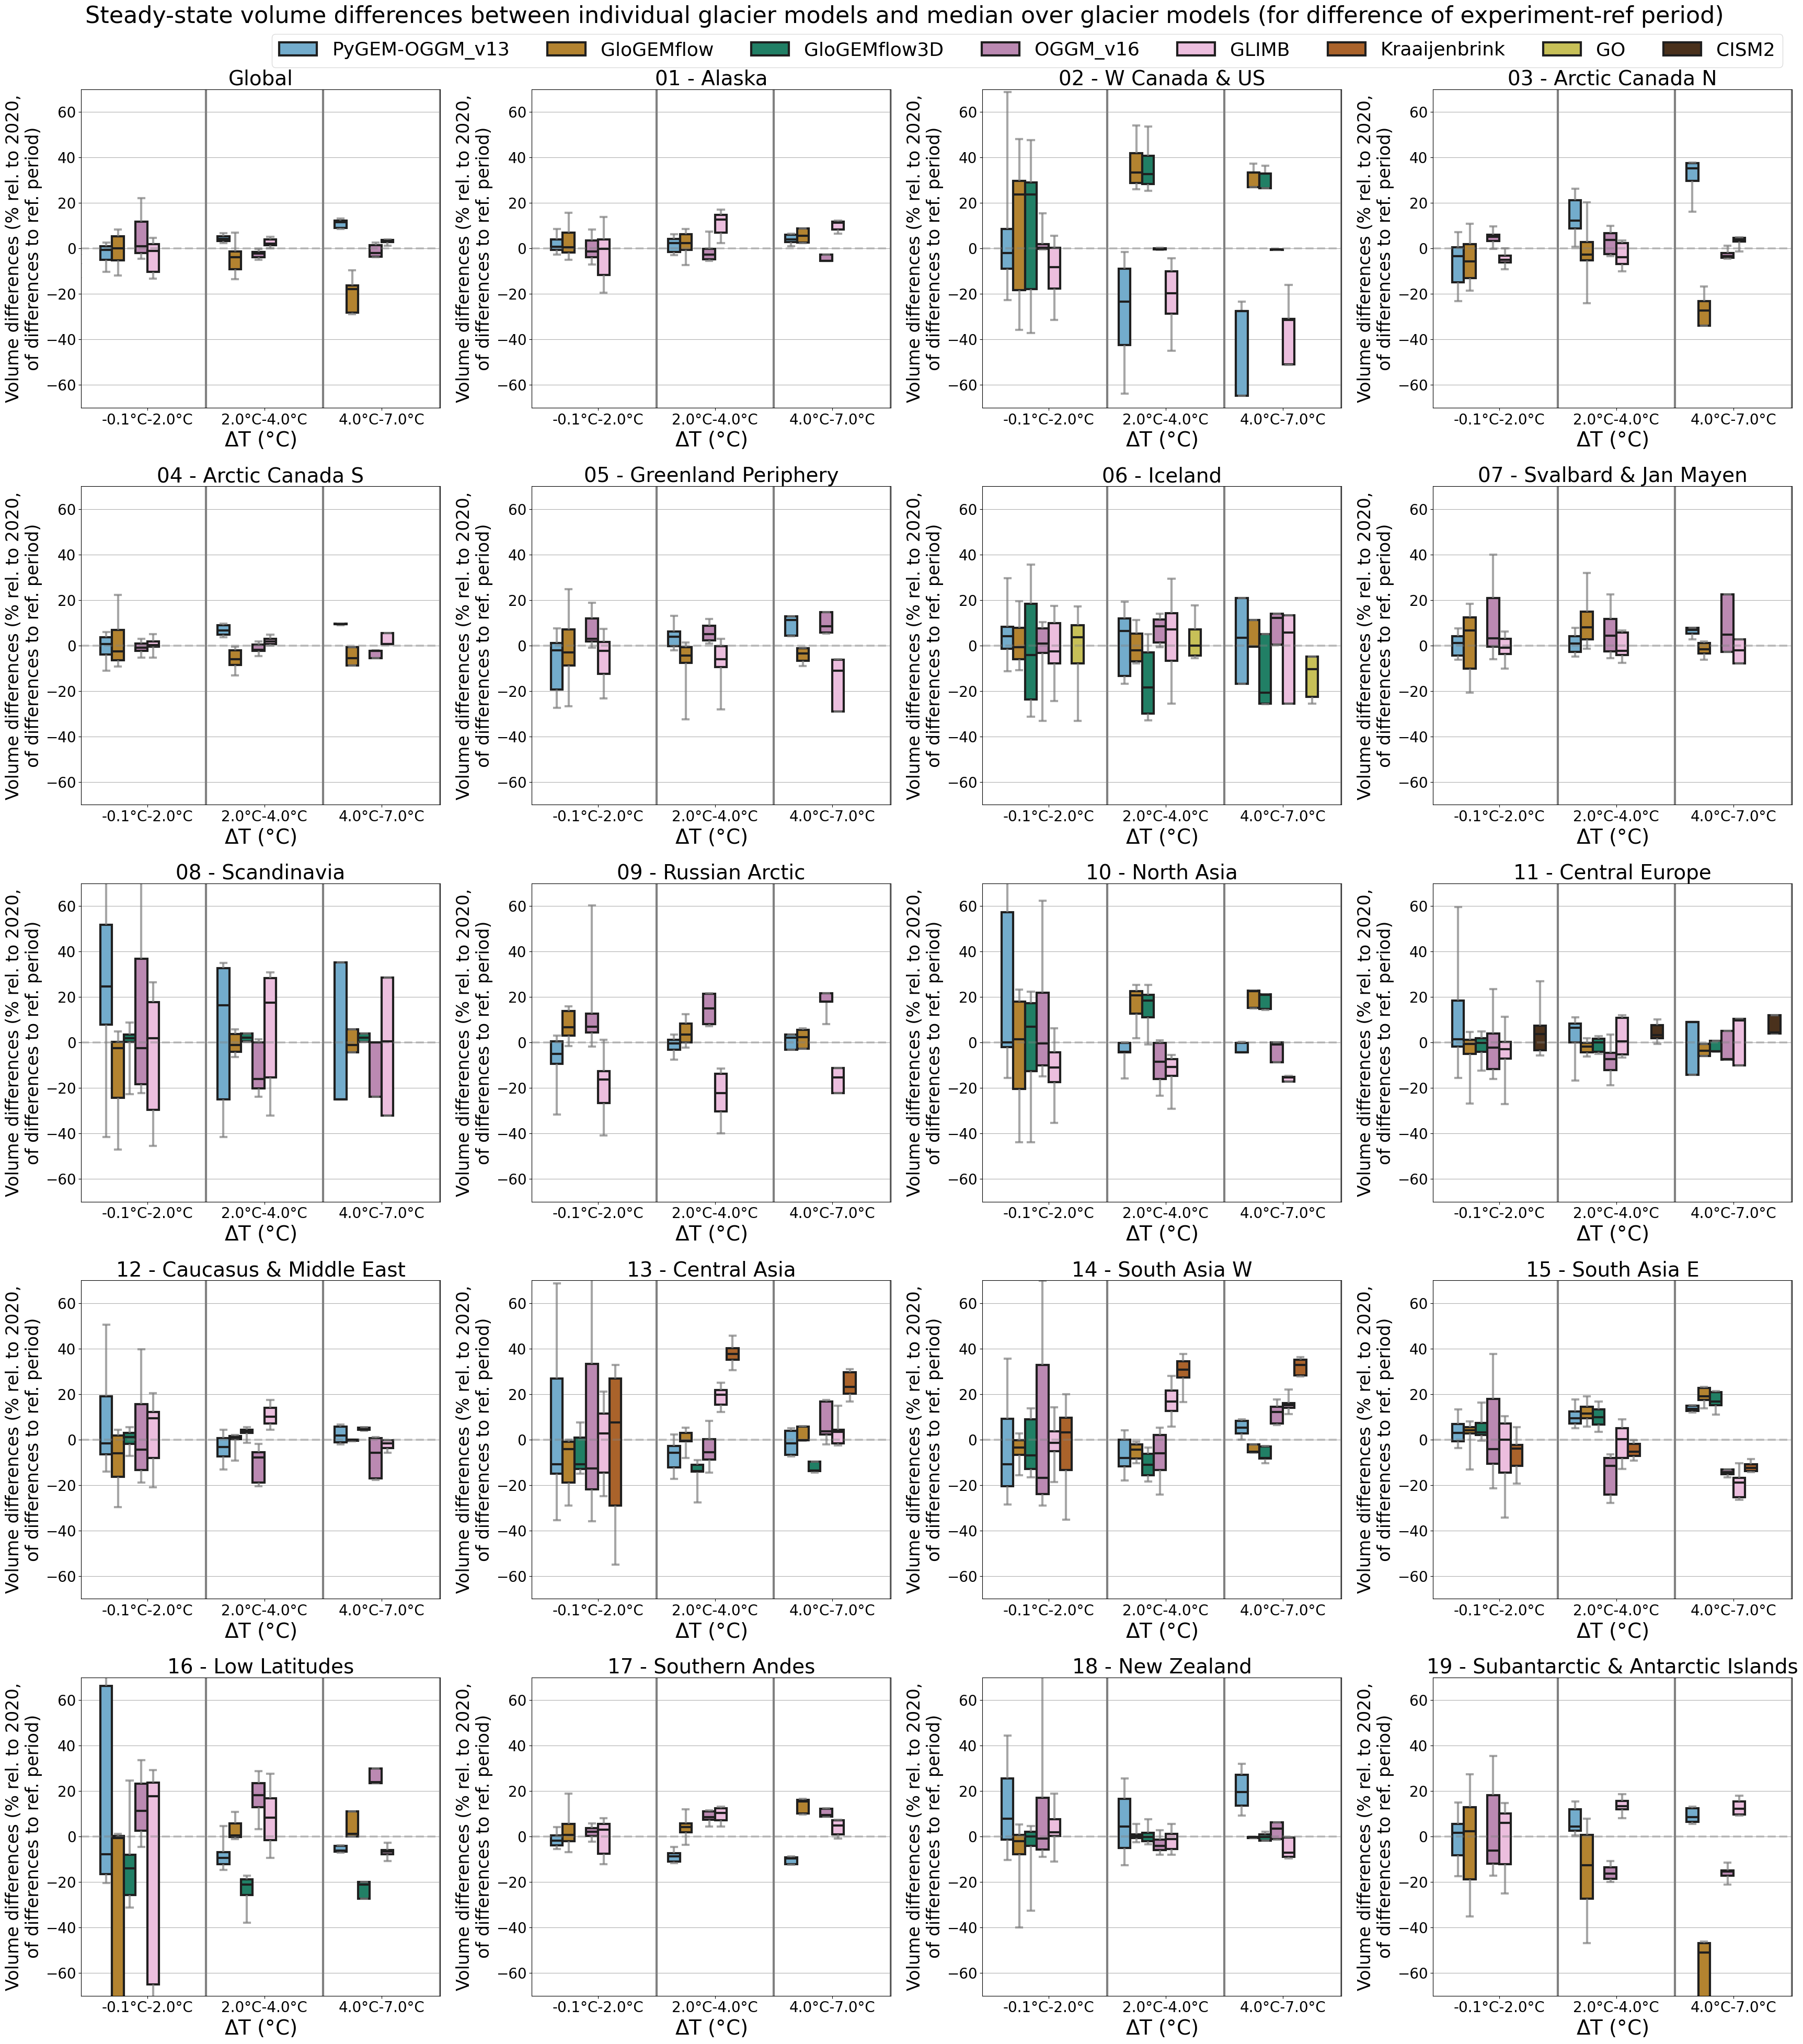

In [32]:
pd_reg_models_vol_5000_no_ref_period = pd_reg_models_vol_5000.loc[pd_reg_models_vol_5000.period_scenario!=ref_period]
pd_reg_models_vol_glob_5000_no_ref_period = pd_reg_models_vol_glob_5000.loc[pd_reg_models_vol_glob_5000.period_scenario!=ref_period]
subplots = True
for anonym in ['']: #, '_anonym']:
    if subplots:
        plt.rc('font', size=20)  
        fig1, axs1 = plt.subplots(5,4,figsize=(35,40)) #, sharey=True) #, sharey='row') #, sharex=True)
        suptitle1 = 'Steady-state volume differences between individual glacier models and median over glacier models\n\n'
        fig1.suptitle(suptitle1, fontsize=32)
        axs1 = axs1.flatten()
        #axs1[-1].axis('off')
        
        fig2, axs2 = plt.subplots(5,4,figsize=(35,40)) #, sharey=True) #, sharey='row') #, sharex=True)
        suptitle2 = 'Steady-state volume differences between individual glacier models and median over glacier models (for difference of experiment-ref period)\n\n'
        fig2.suptitle(suptitle2, fontsize=32)
        axs2 = axs2.flatten()
        #axs2[-1].axis('off')

    else:
        plt.rc('font', size=24)  
    for j,rgi_reg in enumerate(['Global'] + list(pd_reg_models_vol_5000.rgi_reg.unique())):
        if not subplots:
            fig, axs = plt.subplots(1,2,figsize=(28,12),sharey=False, sharex=True)
        if rgi_reg != 'Global':
            rgi_reg_long = f'{rgi_reg} - {d_reg_num_name[rgi_reg]}'
            pd_reg_models_vol_5000_rgi_reg = pd_reg_models_vol_5000.loc[pd_reg_models_vol_5000.rgi_reg==rgi_reg]
            _pal_models = pal_models
            _hue_order = hue_order
            _pd_vol = pd_reg_models_vol_5000_rgi_reg
            _pd_vol_no_ref_period = pd_reg_models_vol_5000_no_ref_period.loc[pd_reg_models_vol_5000_no_ref_period.rgi_reg ==rgi_reg]
        else:
            rgi_reg_long = rgi_reg
            _pal_models = pal_models_global
            _hue_order = hue_order_global
            _pd_vol = pd_reg_models_vol_glob_5000
            _pd_vol_no_ref_period =  pd_reg_models_vol_glob_5000_no_ref_period

        # both together
        ##########
        if subplots:
            ax = axs1[j]
        else:
            ax = axs[0]
        sns.boxplot(data=_pd_vol, hue='model_author', y='delta relative volume change (in %, to median model)',
                        x='temp_ch_classes', palette=pal_models, saturation=0.6,
                       hue_order=hue_order, dodge = True, #hue='ssp',
                                            fliersize=0, whis = [5,95], 
                                            #y = 'time', #hue_order = ['2040', '2100'],
                                            linewidth=3,
                                            capprops={'color':'grey', 'alpha':0.7},
                                            whiskerprops={'color':'grey', 'alpha':0.7}, ax=ax)
        ax.grid(axis='y')
        if shift_years:
            state = '2020'
        else:
            state = 'initial state'
        if not subplots:
            ax.set_title(f'Steady-state volume differences between individual\nglacier models\ and median over glacier models') 
        else:
            ax.set_title(rgi_reg_long, fontsize=28)
        # (for all RGI regions)')  
        #plt.ylabel(r'$\Delta$V$_{rel}$ (%, difference to median model)', fontsize=28)
        #ax.set_ylabel(f'Volume differences\n(% rel. to {state})', fontsize=28)
        if j == 0:
            ax.set_ylabel(r'$\Delta$V to median model (% rel. to 2020)', weight='bold',fontsize=28)
        else:
            ax.set_ylabel('')
        if j>15:
            ax.set_xlabel(r'$\Delta$T (°C)', fontsize=28, weight='bold') # , relative to preindustrial)
        else:
            ax.set_xlabel('')
        for f in np.arange(0.5,3,1):
            ax.axvline(f, color= 'grey', ls='-', lw=3)

        _leg = ax.get_legend()
        handles, labels = ax.get_legend_handles_labels()
        _leg.remove()
        #n = len(hue_order)
        if subplots:
            #if j==18:
            if j ==3:
                handles, labels = ax1.get_legend_handles_labels()
                ax1_0 = ax  
        else:
            if anonym=='_anonym':
                leg = ax.legend(handles, labels_l_anonym, #title=f'{n} models',
                                loc='upper right', framealpha = 0.7, ncol=2, fontsize=20)
            else:
                leg = ax.legend(handles, labels, #title=f'{n} models',
                                loc='upper right', framealpha = 0.7, ncol=2, fontsize=20)

        qs = _pd_vol.groupby(['model_author','temp_ch_classes'])['delta relative volume change (in %, to median model)'].quantile([0.05,0.25,0.5,0.75,0.95]).loc[('PyGEM-OGGM_v13',
                                             '-0.1°C-2.0°C')].values
        if (subplots and j == 0) or not subplots: 
            for p,q in enumerate(qs):
                perci = [5,25,50,75,95][p]
                if perci <=75:
                    ax.text(-0.56,q-2,f'{perci}%', color = 'dimgrey', fontsize=0)#18)
                else:
                    ax.text(-0.56,q*0.98,f'{perci}%', color = 'dimgrey', fontsize=0)#18)
        xlim0,xlim1 = ax.get_xlim()
        ax.set_xlim([-0.565,xlim1])
        
        ax.axhline(0, lw=3, color='grey', alpha = 0.4, ls='--')
        ax.set_ylim([-70, 70])
        if j==18:
            fig1.tight_layout()
        #############
        if subplots:
            ax = axs2[j]
        else:
            ax = axs[1]
        sns.boxplot(data=_pd_vol_no_ref_period, hue='model_author',
                    y='delta relative volume change (in %, to median model, relative to ref period )',
                x='temp_ch_classes', palette=pal_models, saturation=0.6,
               hue_order=hue_order, dodge = True, #hue='ssp',
                                    fliersize=0, whis = [5,95], 
                                    #y = 'time', #hue_order = ['2040', '2100'],
                                    linewidth=3,
                                    capprops={'color':'grey', 'alpha':0.7},
                                    whiskerprops={'color':'grey', 'alpha':0.7},ax=ax)
        ax.grid(axis='y')
        if not subplots:
            ax.set_title('Steady-state volume differences between individual glacier models\nand median over glacier models (for difference of experiment-ref period)\n\n')
        else:
            ax.set_title(rgi_reg_long, fontsize=28)
        #plt.ylabel(r'$\Delta$V$_{rel, diff,ref-period}$ (%, difference to median model)', fontsize=26)
        #plt.xlabel('Global temperature change (°C, relative to preindustrial)', fontsize=26)
        #plt.title(f'Steady-state volume differences between individual glacier models\nand median over glacier models (for all RGI regions)')  
        #plt.ylabel(r'$\Delta$V$_{rel}$ (%, difference to median model)', fontsize=28)
        ax.set_ylabel(f'Volume differences (% rel. to {state},\nof differences to ref. period)', fontsize=24)

        ax.set_xlabel(r'$\Delta$T (°C)', fontsize=28) # , relative to preindustrial)

        for f in np.arange(0.5,3,1):
            ax.axvline(f, color= 'grey', ls='-', lw=3)

        _leg = ax.get_legend()
        handles, labels = ax.get_legend_handles_labels()
        _leg.remove()
        #n = len(hue_order)
        if subplots:
            if j ==3:
                handles, labels = ax.get_legend_handles_labels()
                ax1_1 = ax  
        else: 
            if anonym=='_anonym':
                leg = ax.legend(handles, labels_l_anonym, #title=f'{n} models',
                                loc='upper right', framealpha = 0.7, ncol=2, fontsize=20)
            else:
                leg = ax.legend(handles, labels, #title=f'{n} models',
                                loc='upper right', framealpha = 0.7, ncol=2, fontsize=20)
        if (subplots and j == 0) or not subplots: 
            
            qs = _pd_vol_no_ref_period.groupby(['model_author',
                                                               'temp_ch_classes'])['delta relative volume change (in %, to median model, relative to ref period )'].quantile([0.05,0.25,0.5,0.75,0.95]).loc[('PyGEM-OGGM_v13',
                                                               '-0.1°C-2.0°C')].values
            for p,q in enumerate(qs):
                perci = [5,25,50,75,95][p]
                if perci <=75:
                    ax.text(-0.56,q-2,f'{perci}%', color = 'dimgrey', fontsize=0) #18)
                else:
                    ax.text(-0.56,q*0.98,f'{perci}%', color = 'dimgrey', fontsize=0) #18)
        xlim0,xlim1 = ax.get_xlim()
        ax.set_xlim([-0.565,xlim1])
        if not subplots:
            fig.suptitle(f'{rgi_reg_long}')
            fig2.tight_layout()
            fig.savefig(f'figures_partB/glacier_model_ss_differences/3_glacier_model_diff_and_diff_to_ref_period_boxplot_5000yrs{anonym}_101yr_avg_period_{rgi_reg}{add}_{DATE}.png')
            plt.close()
        ax.axhline(0, lw=3, color='grey', alpha = 0.4, ls='--')
        ax.set_ylim([-70, 70])
        if j==18:
            fig2.tight_layout()
    for ax in [ax1_0, ax1_1]:
        if anonym=='_anonym':
            leg = ax.legend(handles, hue_order_anonymous, #title=f'{n} models',
                            loc='lower right', framealpha = 0.7, fontsize=26, bbox_to_anchor=(1,1.04), ncol=8)
        else:
            leg = ax.legend(handles, labels, #title=f'{n} models',
                            loc='lower right', framealpha = 0.7, fontsize=26, bbox_to_anchor=(1,1.04), ncol=8)     
            
    if subplots:
        #fig1.suptitle(f'{rgi_reg_long}')
        fig1.savefig(f'figures_partB/glacier_model_ss_differences/3_glacier_all_regions_model_diff_boxplot_5000yrs{anonym}_101yr_avg_period_{add}_{DATE}.png')
        fig1.savefig(f'figures_partB/glacier_model_ss_differences/3_glacier_all_regions_model_diff_boxplot_5000yrs{anonym}_101yr_avg_period_{add}_{DATE}.pdf')

        #fig2.suptitle(f'{rgi_reg_long}')
        fig2.savefig(f'figures_partB/glacier_model_ss_differences/3_glacier_all_regions_model_diff_to_ref_period_boxplot_5000yrs{anonym}_101yr_avg_period_{add}_{DATE}.png')
        fig2.savefig(f'figures_partB/glacier_model_ss_differences/3_glacier_all_regions_model_diff_to_ref_period_boxplot_5000yrs{anonym}_101yr_avg_period_{add}_{DATE}.pdf')



### 1a: "normal" differences

<Axes: xlabel='model_author', ylabel='delta relative volume change (in %, to median model)'>

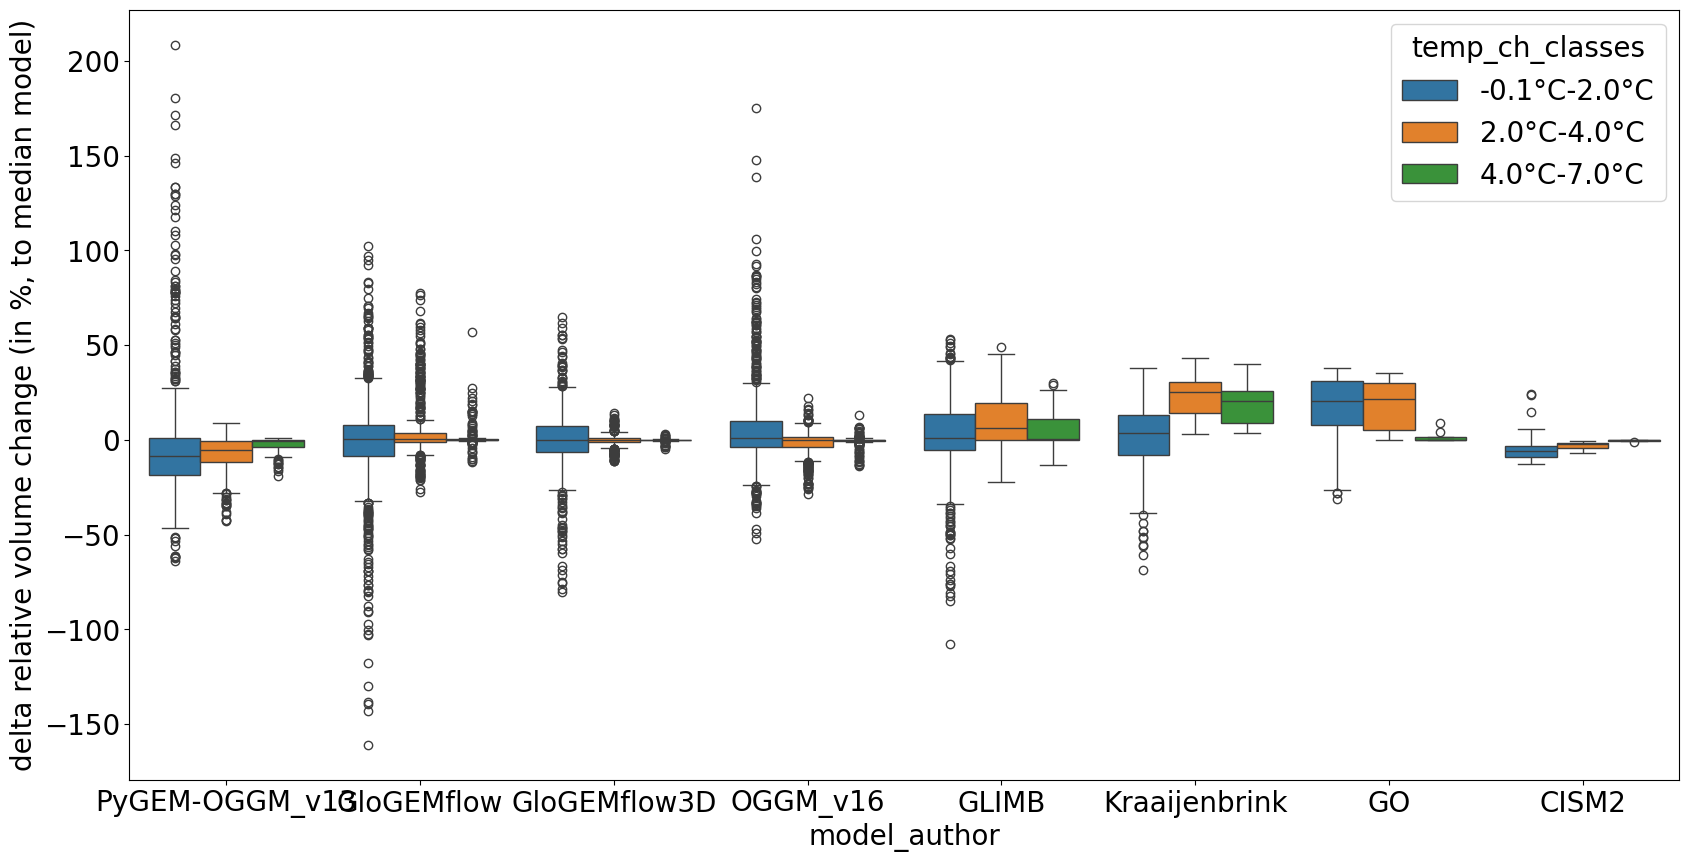

In [33]:
plt.figure(figsize=(20,10))
sns.boxplot(data=pd_reg_models_vol_5000, x='model_author', y='delta relative volume change (in %, to median model)', hue='temp_ch_classes')

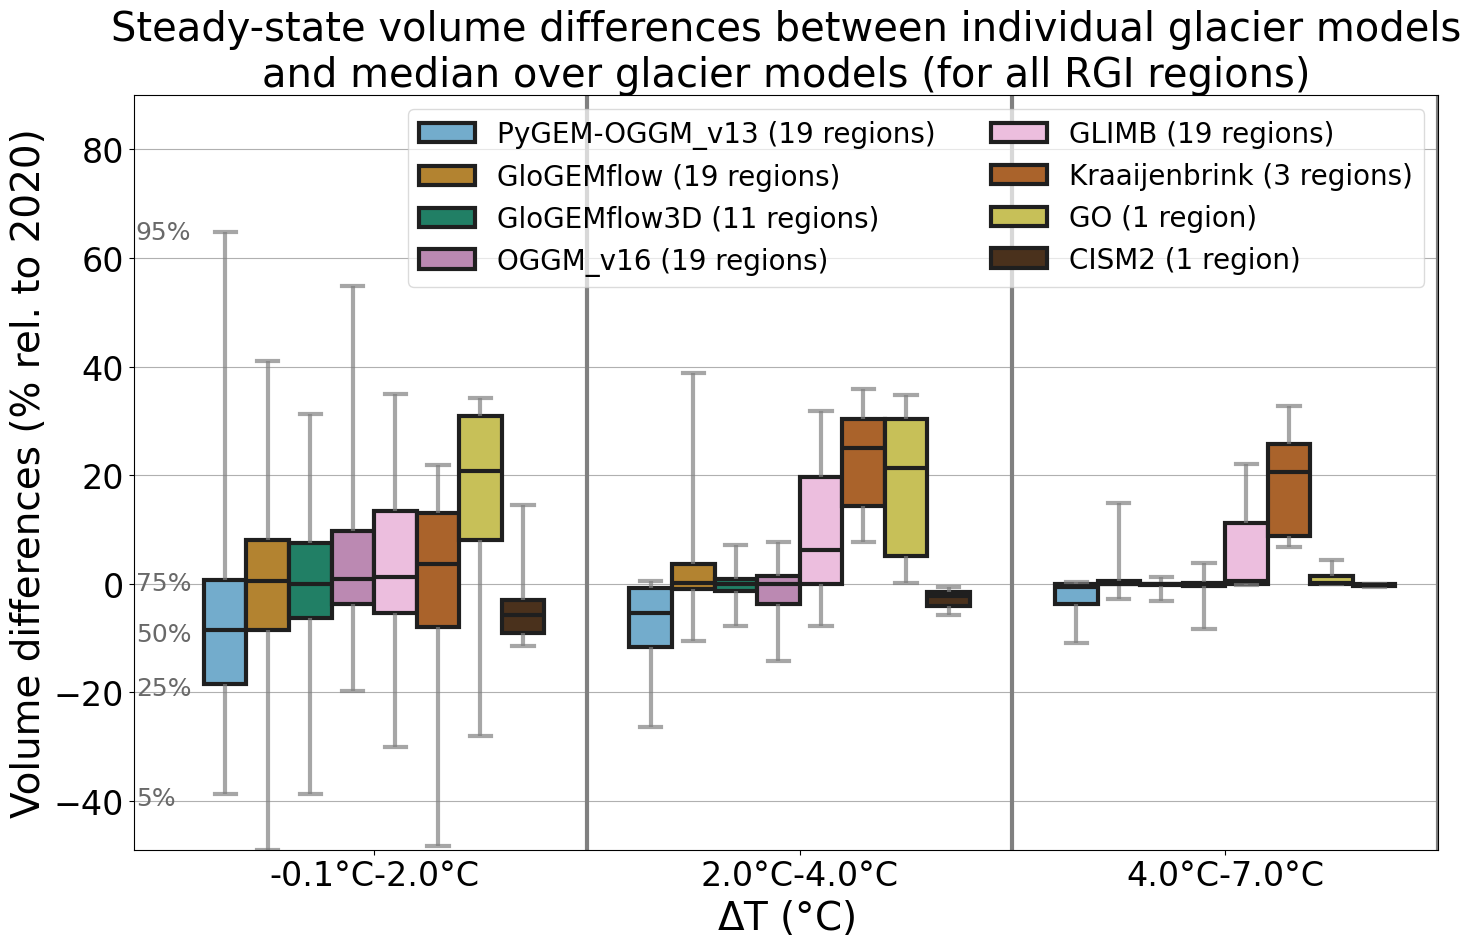

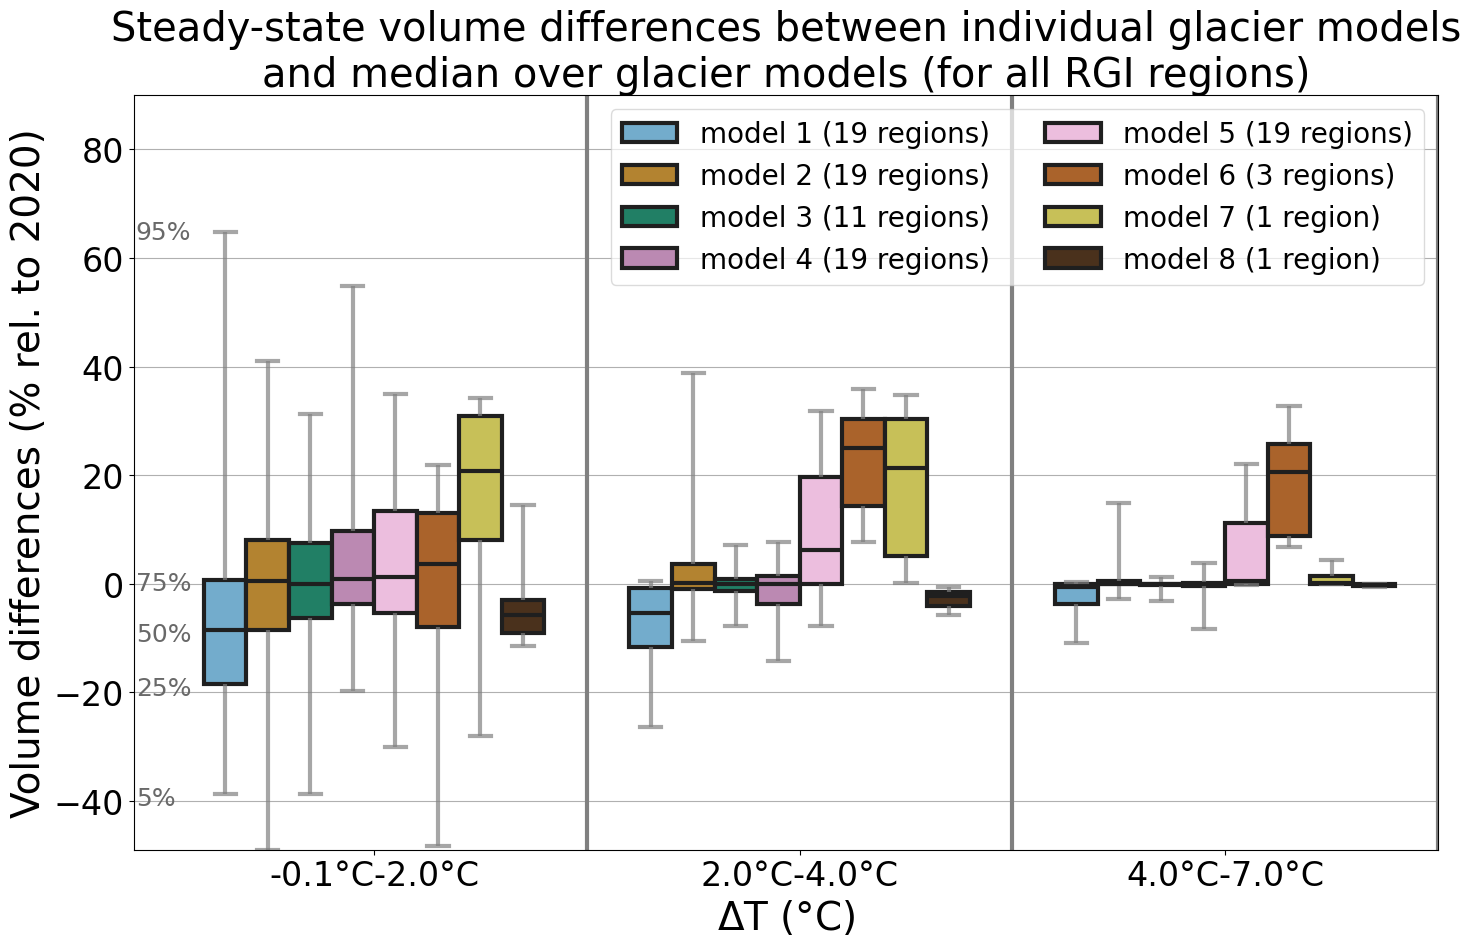

In [34]:

for anonym in ['', '_anonym']:
    plt.figure(figsize=(15,10))
    plt.rc('font', size=24)  
    sns.boxplot(data=pd_reg_models_vol_5000, hue='model_author', y='delta relative volume change (in %, to median model)',
                x='temp_ch_classes', palette=pal_models, saturation=0.6,
               hue_order=hue_order, dodge = True, #hue='ssp',
                                    fliersize=0, whis = [5,95], 
                                    #y = 'time', #hue_order = ['2040', '2100'],
                                    linewidth=3,
                                    capprops={'color':'grey', 'alpha':0.7},
                                    whiskerprops={'color':'grey', 'alpha':0.7})
    plt.grid(axis='y')
    if shift_years:
        state = '2020'
        plt.title(f'Steady-state volume differences between individual glacier models\nand median over glacier models (for all RGI regions)')  
    else:
        state = 'initial state'
        plt.title(f'Steady-state volume differences between individual glacier models\nand median over glacier models (for all RGI regions)')  
    #plt.ylabel(r'$\Delta$V$_{rel}$ (%, difference to median model)', fontsize=28)
    plt.ylabel(f'Volume differences (% rel. to {state})', fontsize=28)

    plt.xlabel(r'$\Delta$T (°C)', fontsize=28) # , relative to preindustrial)
    for f in np.arange(0.5,3,1):
        plt.axvline(f, color= 'grey', ls='-', lw=3)

    ax = plt.gca()
    _leg = ax.get_legend()
    handles, labels = ax.get_legend_handles_labels()
    _leg.remove()
    #n = len(hue_order)
    if anonym=='_anonym':
        leg = ax.legend(handles, labels_l_anonym, #title=f'{n} models',
                        loc='upper right', framealpha = 0.7, ncol=2, fontsize=20)
    else:
        leg = ax.legend(handles, labels_l, #title=f'{n} models',
                        loc='upper right', framealpha = 0.7, ncol=2, fontsize=20)
    plt.ylim([-49, 90])
    
    qs = pd_reg_models_vol_5000.groupby(['model_author', 
                                         'temp_ch_classes'])['delta relative volume change (in %, to median model)'].quantile([0.05,0.25,0.5,0.75,0.95]).loc[('PyGEM-OGGM_v13',
                                         '-0.1°C-2.0°C')].values
    for p,q in enumerate(qs):
        perci = [5,25,50,75,95][p]
        if perci <=75:
            ax.text(-0.56,q-2,f'{perci}%', color = 'dimgrey', fontsize=18)
        else:
            ax.text(-0.56,q*0.98,f'{perci}%', color = 'dimgrey', fontsize=18)
    xlim0,xlim1 = ax.get_xlim()
    plt.xlim([-0.565,xlim1])
    plt.tight_layout()
    plt.savefig(f'figures_partB/glacier_model_ss_differences/3_glacier_model_diff_boxplot_5000yrs{anonym}_101yr_avg_period{add}_{DATE}.png')

### 2. Repeat 1. but use instead the volume differences to the reference period



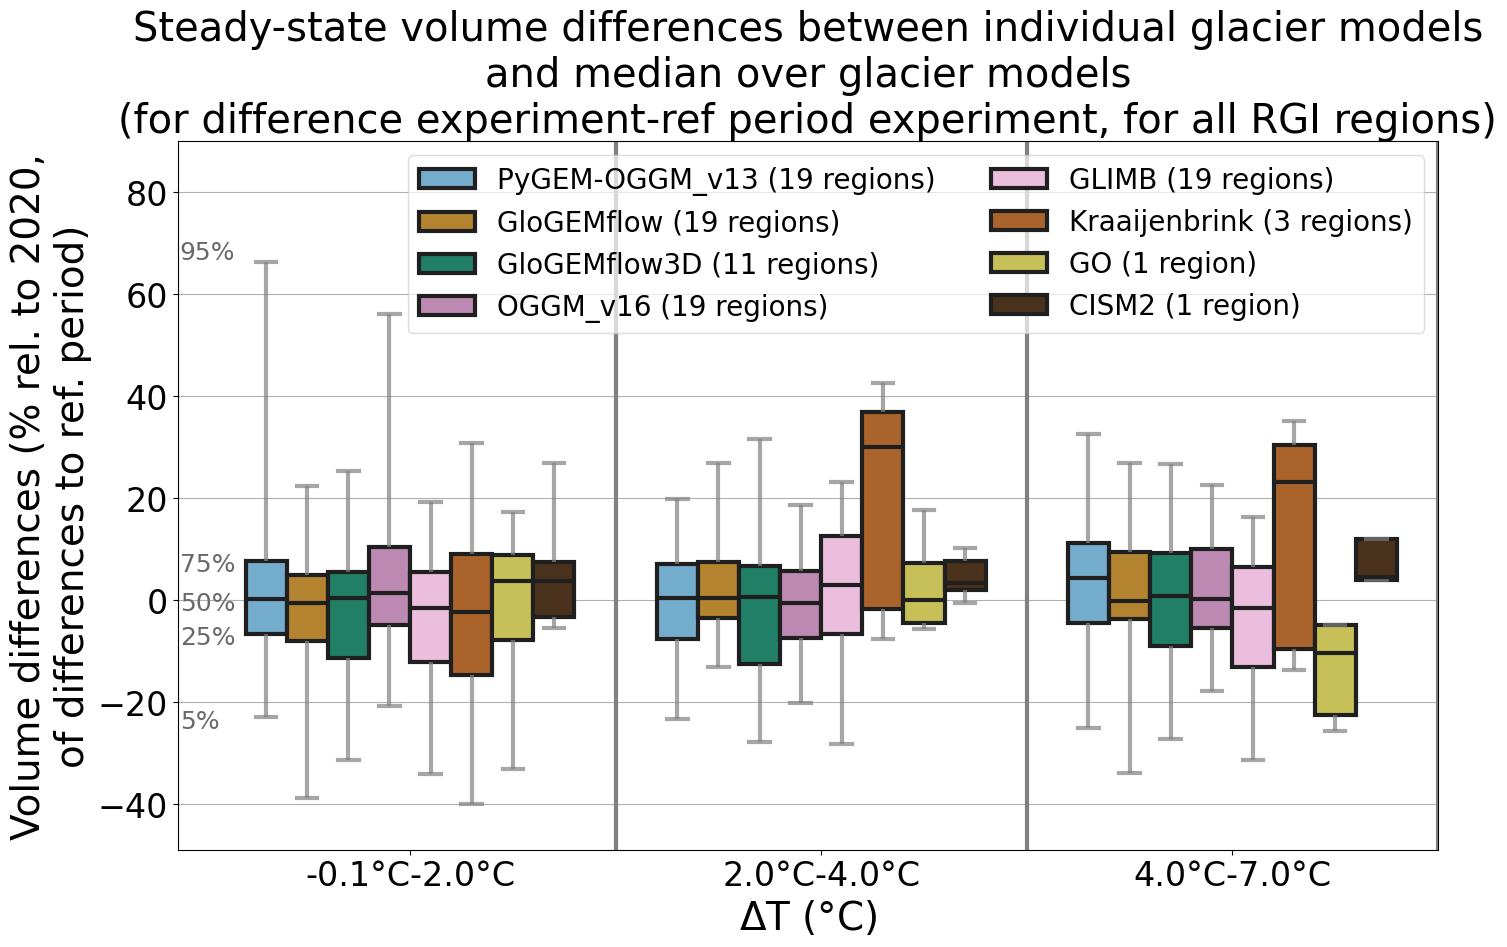

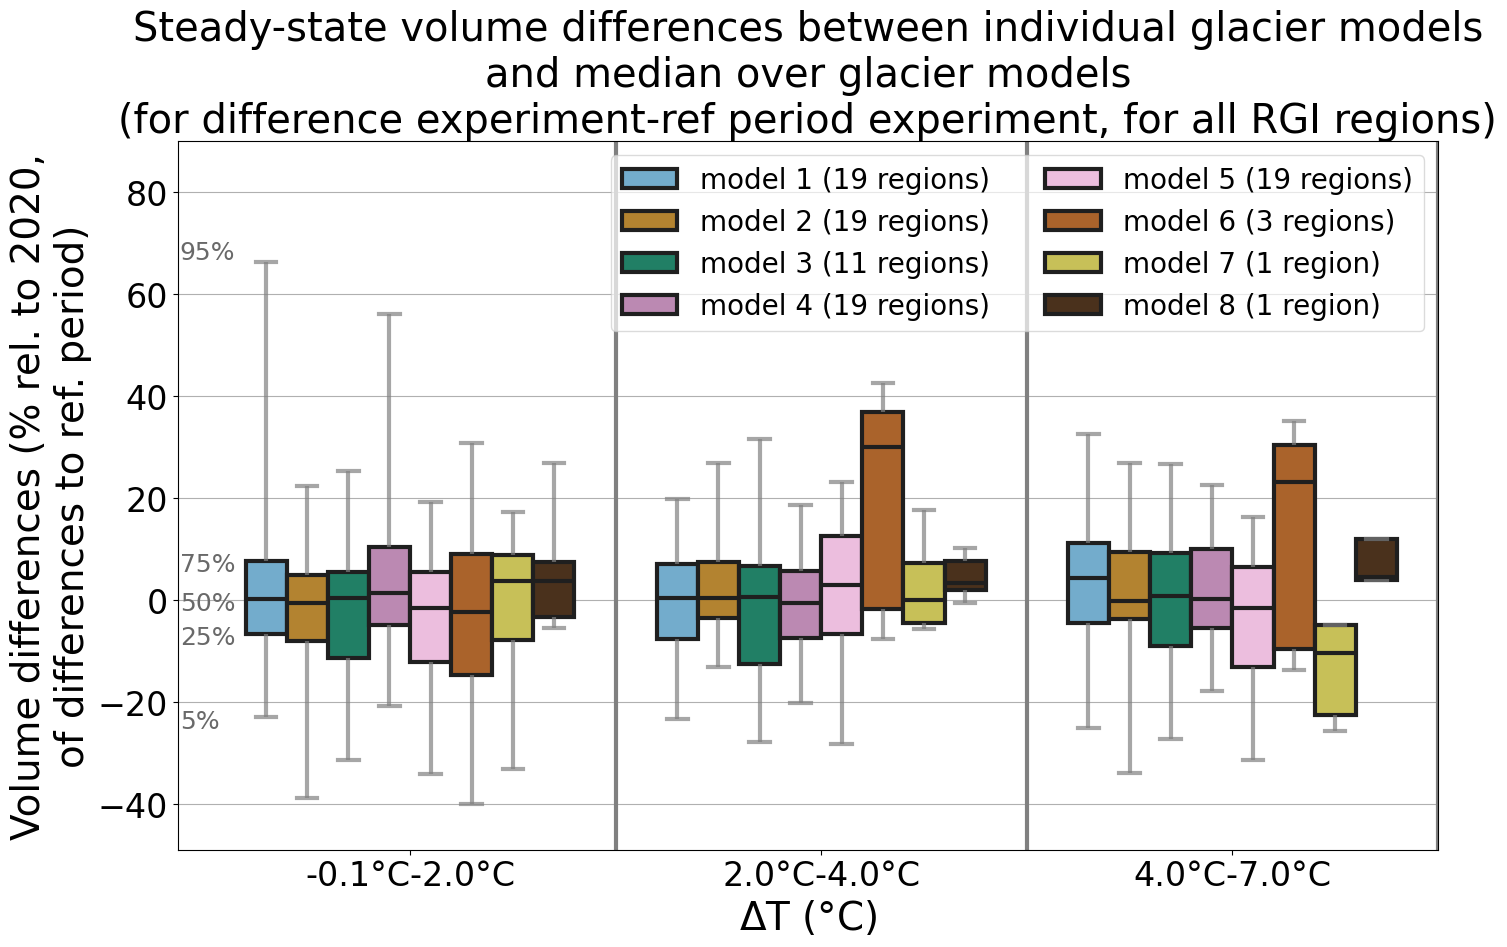

In [35]:

for anonym in ['', '_anonym']:
    plt.figure(figsize=(15,10))
    plt.rc('font', size=24)  
    sns.boxplot(data=pd_reg_models_vol_5000_no_ref_period, hue='model_author', y='delta relative volume change (in %, to median model, relative to ref period )',
                x='temp_ch_classes', palette=pal_models, saturation=0.6,
               hue_order=hue_order, dodge = True, #hue='ssp',
                                    fliersize=0, whis = [5,95], 
                                    #y = 'time', #hue_order = ['2040', '2100'],
                                    linewidth=3,
                                    capprops={'color':'grey', 'alpha':0.7},
                                    whiskerprops={'color':'grey', 'alpha':0.7},)
    plt.grid(axis='y')
    plt.title('Steady-state volume differences between individual glacier models\nand median over glacier models\n(for difference experiment-ref period experiment, for all RGI regions)')
    #plt.ylabel(r'$\Delta$V$_{rel, diff,ref-period}$ (%, difference to median model)', fontsize=26)
    #plt.xlabel('Global temperature change (°C, relative to preindustrial)', fontsize=26)
    #plt.title(f'Steady-state volume differences between individual glacier models\nand median over glacier models (for all RGI regions)')  
    #plt.ylabel(r'$\Delta$V$_{rel}$ (%, difference to median model)', fontsize=28)
    plt.ylabel(f'Volume differences (% rel. to {state},\nof differences to ref. period)', fontsize=28)

    plt.xlabel(r'$\Delta$T (°C)', fontsize=28) # , relative to preindustrial)
    
    for f in np.arange(0.5,3,1):
        plt.axvline(f, color= 'grey', ls='-', lw=3)

    ax = plt.gca()
    _leg = ax.get_legend()
    handles, labels = ax.get_legend_handles_labels()
    _leg.remove()
    #n = len(hue_order)
    if anonym=='_anonym':
        leg = ax.legend(handles, labels_l_anonym, #title=f'{n} models',
                        loc='upper right', framealpha = 0.7, ncol=2, fontsize=20)
    else:
        leg = ax.legend(handles, labels_l, #title=f'{n} models',
                        loc='upper right', framealpha = 0.7, ncol=2, fontsize=20)
    plt.ylim([-49, 90])
    
    qs = pd_reg_models_vol_5000_no_ref_period.groupby(['model_author',
                                                       'temp_ch_classes'])['delta relative volume change (in %, to median model, relative to ref period )'].quantile([0.05,0.25,
                                                       0.5,0.75,0.95]).loc[('PyGEM-OGGM_v13', '-0.1°C-2.0°C')].values
    for p,q in enumerate(qs):
        perci = [5,25,50,75,95][p]
        if perci <=75:
            ax.text(-0.56,q-2,f'{perci}%', color = 'dimgrey', fontsize=18)
        else:
            ax.text(-0.56,q*0.98,f'{perci}%', color = 'dimgrey', fontsize=18)
    xlim0,xlim1 = ax.get_xlim()
    plt.xlim([-0.565,xlim1])
    plt.tight_layout()
    plt.savefig(f'figures_partB/glacier_model_ss_differences/3_glacier_model_diff_to_ref_period_boxplot_5000yrs{anonym}_101yr_avg_period{add}_{DATE}.png')

In [36]:
# both together
# this would need to be updated ... 
old = False
if old:
    for anonym in ['', '_anonym']:
        fig, axs = plt.subplots(1,2,figsize=(28,12),sharey=False, sharex=True)
        plt.rc('font', size=24)  
        ##########
        ax = axs[0]
        sns.boxplot(data=pd_reg_models_vol_5000, hue='model_author', y='delta relative volume change (in %, to median model)',
                    x='temp_ch_classes', palette=pal_models, saturation=0.6,
                   hue_order=hue_order, dodge = True, #hue='ssp',
                                        fliersize=0, whis = [5,95], 
                                        #y = 'time', #hue_order = ['2040', '2100'],
                                        linewidth=3,
                                        capprops={'color':'grey', 'alpha':0.7},
                                        whiskerprops={'color':'grey', 'alpha':0.7},ax=ax)
        ax.grid(axis='y')
        ax.set_title('Volume differences to median glacier model estimate\n(after 5000 years, relative to initial state, for all RGI regions)')
        ax.set_ylabel(r'$\Delta$V$_{rel}$ (%, difference to median model)', fontsize=26)
        ax.set_xlabel('Global temperature change (°C, relative to preindustrial)', fontsize=26)
        for f in np.arange(0.5,3,1):
            ax.axvline(f, color= 'grey', ls='-', lw=3)

        _leg = ax.get_legend()
        handles, labels = ax.get_legend_handles_labels()
        _leg.remove()
        #n = len(hue_order)
        if anonym=='_anonym':
            leg = ax.legend(handles, labels_l_anonym, #title=f'{n} models',
                            loc='upper right', framealpha = 0.7, ncol=2, fontsize=20)
        else:
            leg = ax.legend(handles, labels_l, #title=f'{n} models',
                            loc='upper right', framealpha = 0.7, ncol=2, fontsize=20)
        ax.set_ylim([-49, 90])

        qs = pd_reg_models_vol_5000.groupby(['model_author', 'temp_ch_classes'])['delta relative volume change (in %, to median model)'].quantile([0.05,0.25,0.5,0.75,0.95]).loc[('Rounce',
        '-0.1°C-2.0°C')].values
        for p,q in enumerate(qs):
            perci = [5,25,50,75,95][p]
            if perci <=75:
                ax.text(-0.56,q-2,f'{perci}%', color = 'dimgrey', fontsize=18)
            else:
                ax.text(-0.56,q*0.98,f'{perci}%', color = 'dimgrey', fontsize=18)
        xlim0,xlim1 = ax.get_xlim()
        ax.set_xlim([-0.565,xlim1])


        #############
        ax = axs[1]
        sns.boxplot(data=pd_reg_models_vol_5000_no_ref_period, hue='model_author', y='delta relative volume change (in %, to median model, relative to ref period )',
                    x='temp_ch_classes', palette=pal_models, saturation=0.6,
                   hue_order=hue_order, dodge = True, #hue='ssp',
                                        fliersize=0, whis = [5,95], 
                                        #y = 'time', #hue_order = ['2040', '2100'],
                                        linewidth=3,
                                        capprops={'color':'grey', 'alpha':0.7},
                                        whiskerprops={'color':'grey', 'alpha':0.7},ax=ax)
        ax.grid(axis='y')
        ax.set_title('Volume differences to median glacier model estimate\n(for difference of experiment-ref period experiment,\nafter 5000 years, relative to initial state, for all RGI regions)')
        ax.set_ylabel(r'$\Delta$V$_{rel, diff,ref-period}$ (%, difference to median model)', fontsize=26)
        ax.set_xlabel('Global temperature change (°C, relative to preindustrial)', fontsize=26)
        for f in np.arange(0.5,3,1):
            ax.axvline(f, color= 'grey', ls='-', lw=3)

        _leg = ax.get_legend()
        handles, labels = ax.get_legend_handles_labels()
        _leg.remove()
        #n = len(hue_order)
        if anonym=='_anonym':
            leg = ax.legend(handles, labels_l_anonym, #title=f'{n} models',
                            loc='upper right', framealpha = 0.7, ncol=2, fontsize=20)
        else:
            leg = ax.legend(handles, labels_l, #title=f'{n} models',
                            loc='upper right', framealpha = 0.7, ncol=2, fontsize=20)
        leg.remove()
        ax.set_ylim([-49, 90])

        qs = pd_reg_models_vol_5000_no_ref_period.groupby(['model_author',
                                                           'temp_ch_classes'])['delta relative volume change (in %, to median model, relative to ref period )'].quantile([0.05,0.25,0.5,
                                                           0.75,0.95]).loc[('Rounce', '-0.1°C-2.0°C')].values
        for p,q in enumerate(qs):
            perci = [5,25,50,75,95][p]
            if perci <=75:
                ax.text(-0.56,q-2,f'{perci}%', color = 'dimgrey', fontsize=18)
            else:
                ax.text(-0.56,q*0.98,f'{perci}%', color = 'dimgrey', fontsize=18)
        xlim0,xlim1 = ax.get_xlim()
        ax.set_xlim([-0.565,xlim1])
        plt.tight_layout()
        plt.savefig(f'figures_partB/glacier_model_eq_differences/3_glacier_model_diff_and_diff_to_ref_period_boxplot_5000yrs{anonym}_20yr_avg_period.png')

## Same after just 80 simulation years

In [37]:
ds_reg_models_vol_glob_80 = ds_reg_models_vol_80.sel(model_author=global_models).sum(dim='rgi_reg')

if shift_years:
    ds_reg_models_med_vol_80['relative volume change (in %)'] = 100*ds_reg_models_med_vol_80.volume_m3/ds_reg_models_med_vol.isel(year_after_2020=0).volume_m3
    ds_reg_models_vol_80['relative volume change (in %)'] = 100*ds_reg_models_vol_80.volume_m3/ds_reg_models_vol.isel(year_after_2020=0).volume_m3
    ds_reg_models_vol_glob_med_80['relative volume change (in %)'] = 100*ds_reg_models_vol_glob_med_80.volume_m3/ds_reg_models_vol_glob_med.isel(year_after_2020=0).volume_m3
    ds_reg_models_vol_glob_80['relative volume change (in %)'] = 100*ds_reg_models_vol_glob_80.volume_m3/ds_reg_models_vol_glob.isel(year_after_2020=0).volume_m3
else:
    ds_reg_models_med_vol_80['relative volume change (in %)'] = 100*ds_reg_models_med_vol_80.volume_m3/ds_reg_models_med_vol.isel(simulation_year=0).volume_m3
    ds_reg_models_vol_80['relative volume change (in %)'] = 100*ds_reg_models_vol_80.volume_m3/ds_reg_models_vol.isel(simulation_year=0).volume_m3
    ds_reg_models_vol_glob_med_80['relative volume change (in %)'] = 100*ds_reg_models_vol_glob_med_80.volume_m3/ds_reg_models_vol_glob_med.isel(simulation_year=0).volume_m3
    ds_reg_models_vol_glob_80['relative volume change (in %)'] = 100*ds_reg_models_vol_glob_80.volume_m3/ds_reg_models_vol_glob.isel(simulation_year=0).volume_m3

    
ds_reg_models_vol_glob_80['delta relative volume change (in %, to median model)'] = ds_reg_models_vol_glob_80['relative volume change (in %)'] - ds_reg_models_vol_glob_med_80['relative volume change (in %)']

ds_reg_models_vol_80['delta relative volume change (in %, to median model)'] = ds_reg_models_vol_80['relative volume change (in %)'] - ds_reg_models_med_vol_80['relative volume change (in %)']
min_t_r, max_t_r = ds_reg_models_vol_80['temp_ch_ipcc'].min()*1.01, ds_reg_models_vol_80['temp_ch_ipcc'].max()*1.01

ds_reg_models_vol_80_test = ds_reg_models_vol_80.copy()
np.testing.assert_allclose(ds_reg_models_vol_80_test['delta relative volume change (in %, to median model)'], ds_reg_models_vol_80['delta relative volume change (in %, to median model)'])

In [38]:
ref_period = '1995-2014_hist'

ds_reg_models_vol_80_unstack = ds_reg_models_vol_80.unstack('experiments')
diff = ds_reg_models_vol_80_unstack['delta relative volume change (in %, to median model)'] - ds_reg_models_vol_80_unstack['delta relative volume change (in %, to median model)'].sel(period_scenario=ref_period)
ds_reg_models_vol_80_unstack['delta relative volume change (in %, to median model, relative to ref period )'] = diff
ds_reg_models_vol_80 = ds_reg_models_vol_80_unstack.stack(experiments=['gcm','period_scenario'])

pd_reg_models_vol_80 = ds_reg_models_vol_80.reset_coords().to_dataframe().drop(columns=['period_scenario', 'gcm']) # new sinve xarray v.2024 
pd_reg_models_vol_80 = pd_reg_models_vol_80.reset_index().dropna()

### same for global
ds_reg_models_vol_glob_80_unstack = ds_reg_models_vol_glob_80.unstack('experiments')
diff = ds_reg_models_vol_glob_80_unstack['delta relative volume change (in %, to median model)'] - ds_reg_models_vol_glob_80_unstack['delta relative volume change (in %, to median model)'].sel(period_scenario=ref_period)
ds_reg_models_vol_glob_80_unstack['delta relative volume change (in %, to median model, relative to ref period )'] = diff
ds_reg_models_vol_glob_80 = ds_reg_models_vol_glob_80_unstack.stack(experiments=['gcm','period_scenario'])

pd_reg_models_vol_glob_80 = ds_reg_models_vol_glob_80.to_dataframe().drop(columns=['period_scenario', 'gcm'])
pd_reg_models_vol_glob_80 = pd_reg_models_vol_glob_80.reset_index().dropna()

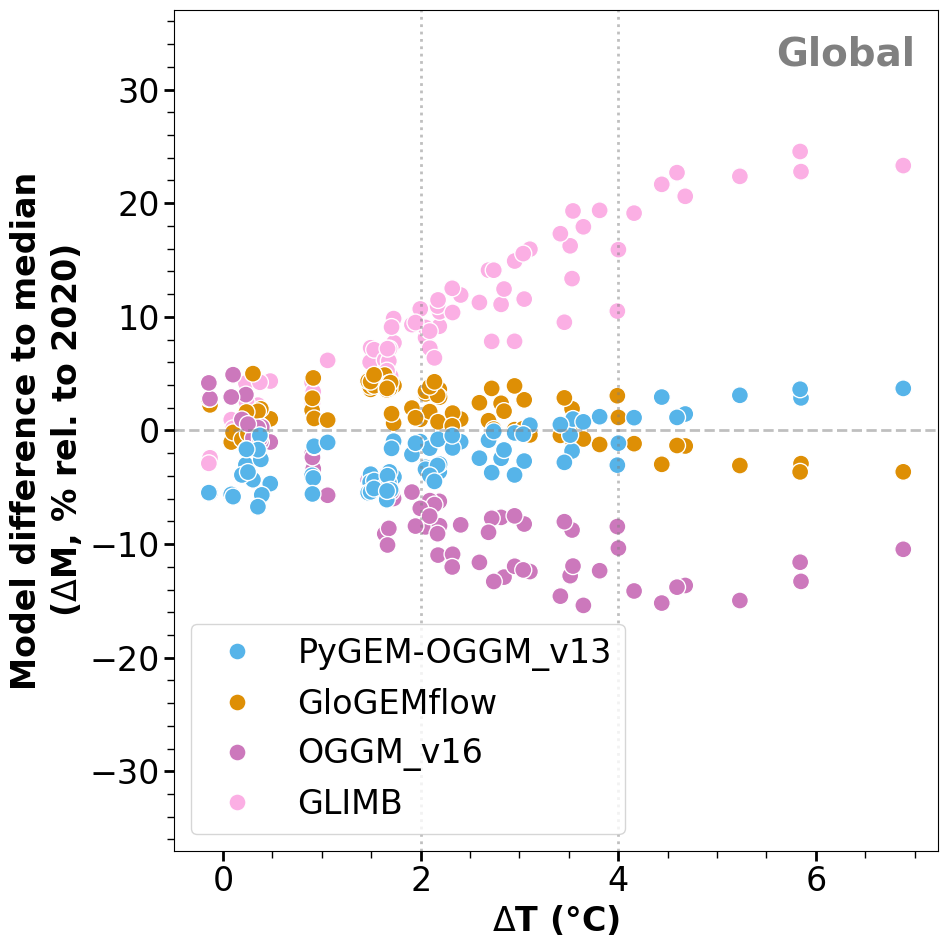

In [39]:
plt.rc('font', size=24)  
plt.figure(figsize=(10,10))
ax1= plt.gca()
for j,rgi_reg in enumerate(['Global']):
    if rgi_reg != 'Global':
        rgi_reg_long = f'{rgi_reg} - {d_reg_num_name[rgi_reg]}'
        pd_reg_models_vol_80_rgi_reg = pd_reg_models_vol_80.loc[pd_reg_models_vol_80.rgi_reg==rgi_reg]
        _pal_models = pal_models
        _hue_order = hue_order
        _pd_vol = pd_reg_models_vol_80_rgi_reg
    else:
        rgi_reg_long = rgi_reg
        _pal_models = pal_models_global
        _hue_order = hue_order_global
        _pd_vol = pd_reg_models_vol_glob_80

    sns.scatterplot(ax= ax1, data=_pd_vol, 
                x='temp_ch_ipcc', y='delta relative volume change (in %, to median model)',
               hue='model_author', hue_order=_hue_order, palette=_pal_models, legend=True, s=150)
    handles, labels = ax1.get_legend_handles_labels()

    ax1.text(0.97,0.97, f'{rgi_reg_long}', ha='right', va='top', weight='bold',# spearman
                transform=ax1.transAxes, color='grey', fontsize=28)
    ax1.set_xlabel(r'$\Delta$T (°C)', weight='bold')
    ax1.set_ylabel('Model difference to median\n'+r'($\Delta$M, % rel. to 2020)', weight='bold')

    ax1.axhline(0, ls='--', color='grey', lw=2, alpha = 0.5)
    ax1.tick_params(axis='both', which='major', width=2, length=7)
    ax1.tick_params(axis='both', which='minor', width=1, length=5)
    from matplotlib.ticker import MultipleLocator
    minorx_locator = MultipleLocator(1)  # 1° difference 
    ax1.xaxis.set_minor_locator(minorx_locator)
    minory_locator = MultipleLocator(10)  # 1° difference 
    ax1.yaxis.set_minor_locator(minory_locator)
    ax1.minorticks_on()
    ax1.axvline(2, ls=':', color='grey', lw=2, alpha = 0.5)
    ax1.axvline(4, ls=':', color='grey', lw=2, alpha = 0.5)
plt.tight_layout()
ax1.legend(handles, labels, loc='lower left', #bbox_to_anchor=(1,1), 
           ncol=1, fontsize=24);   
plt.ylim([-37,37])

plt.savefig('figures_partB/glacier_model_80yrs_differences/after80yrs_vol_diff_median_glob_reg_scatterplot_vs_deltaT_only_global.png')

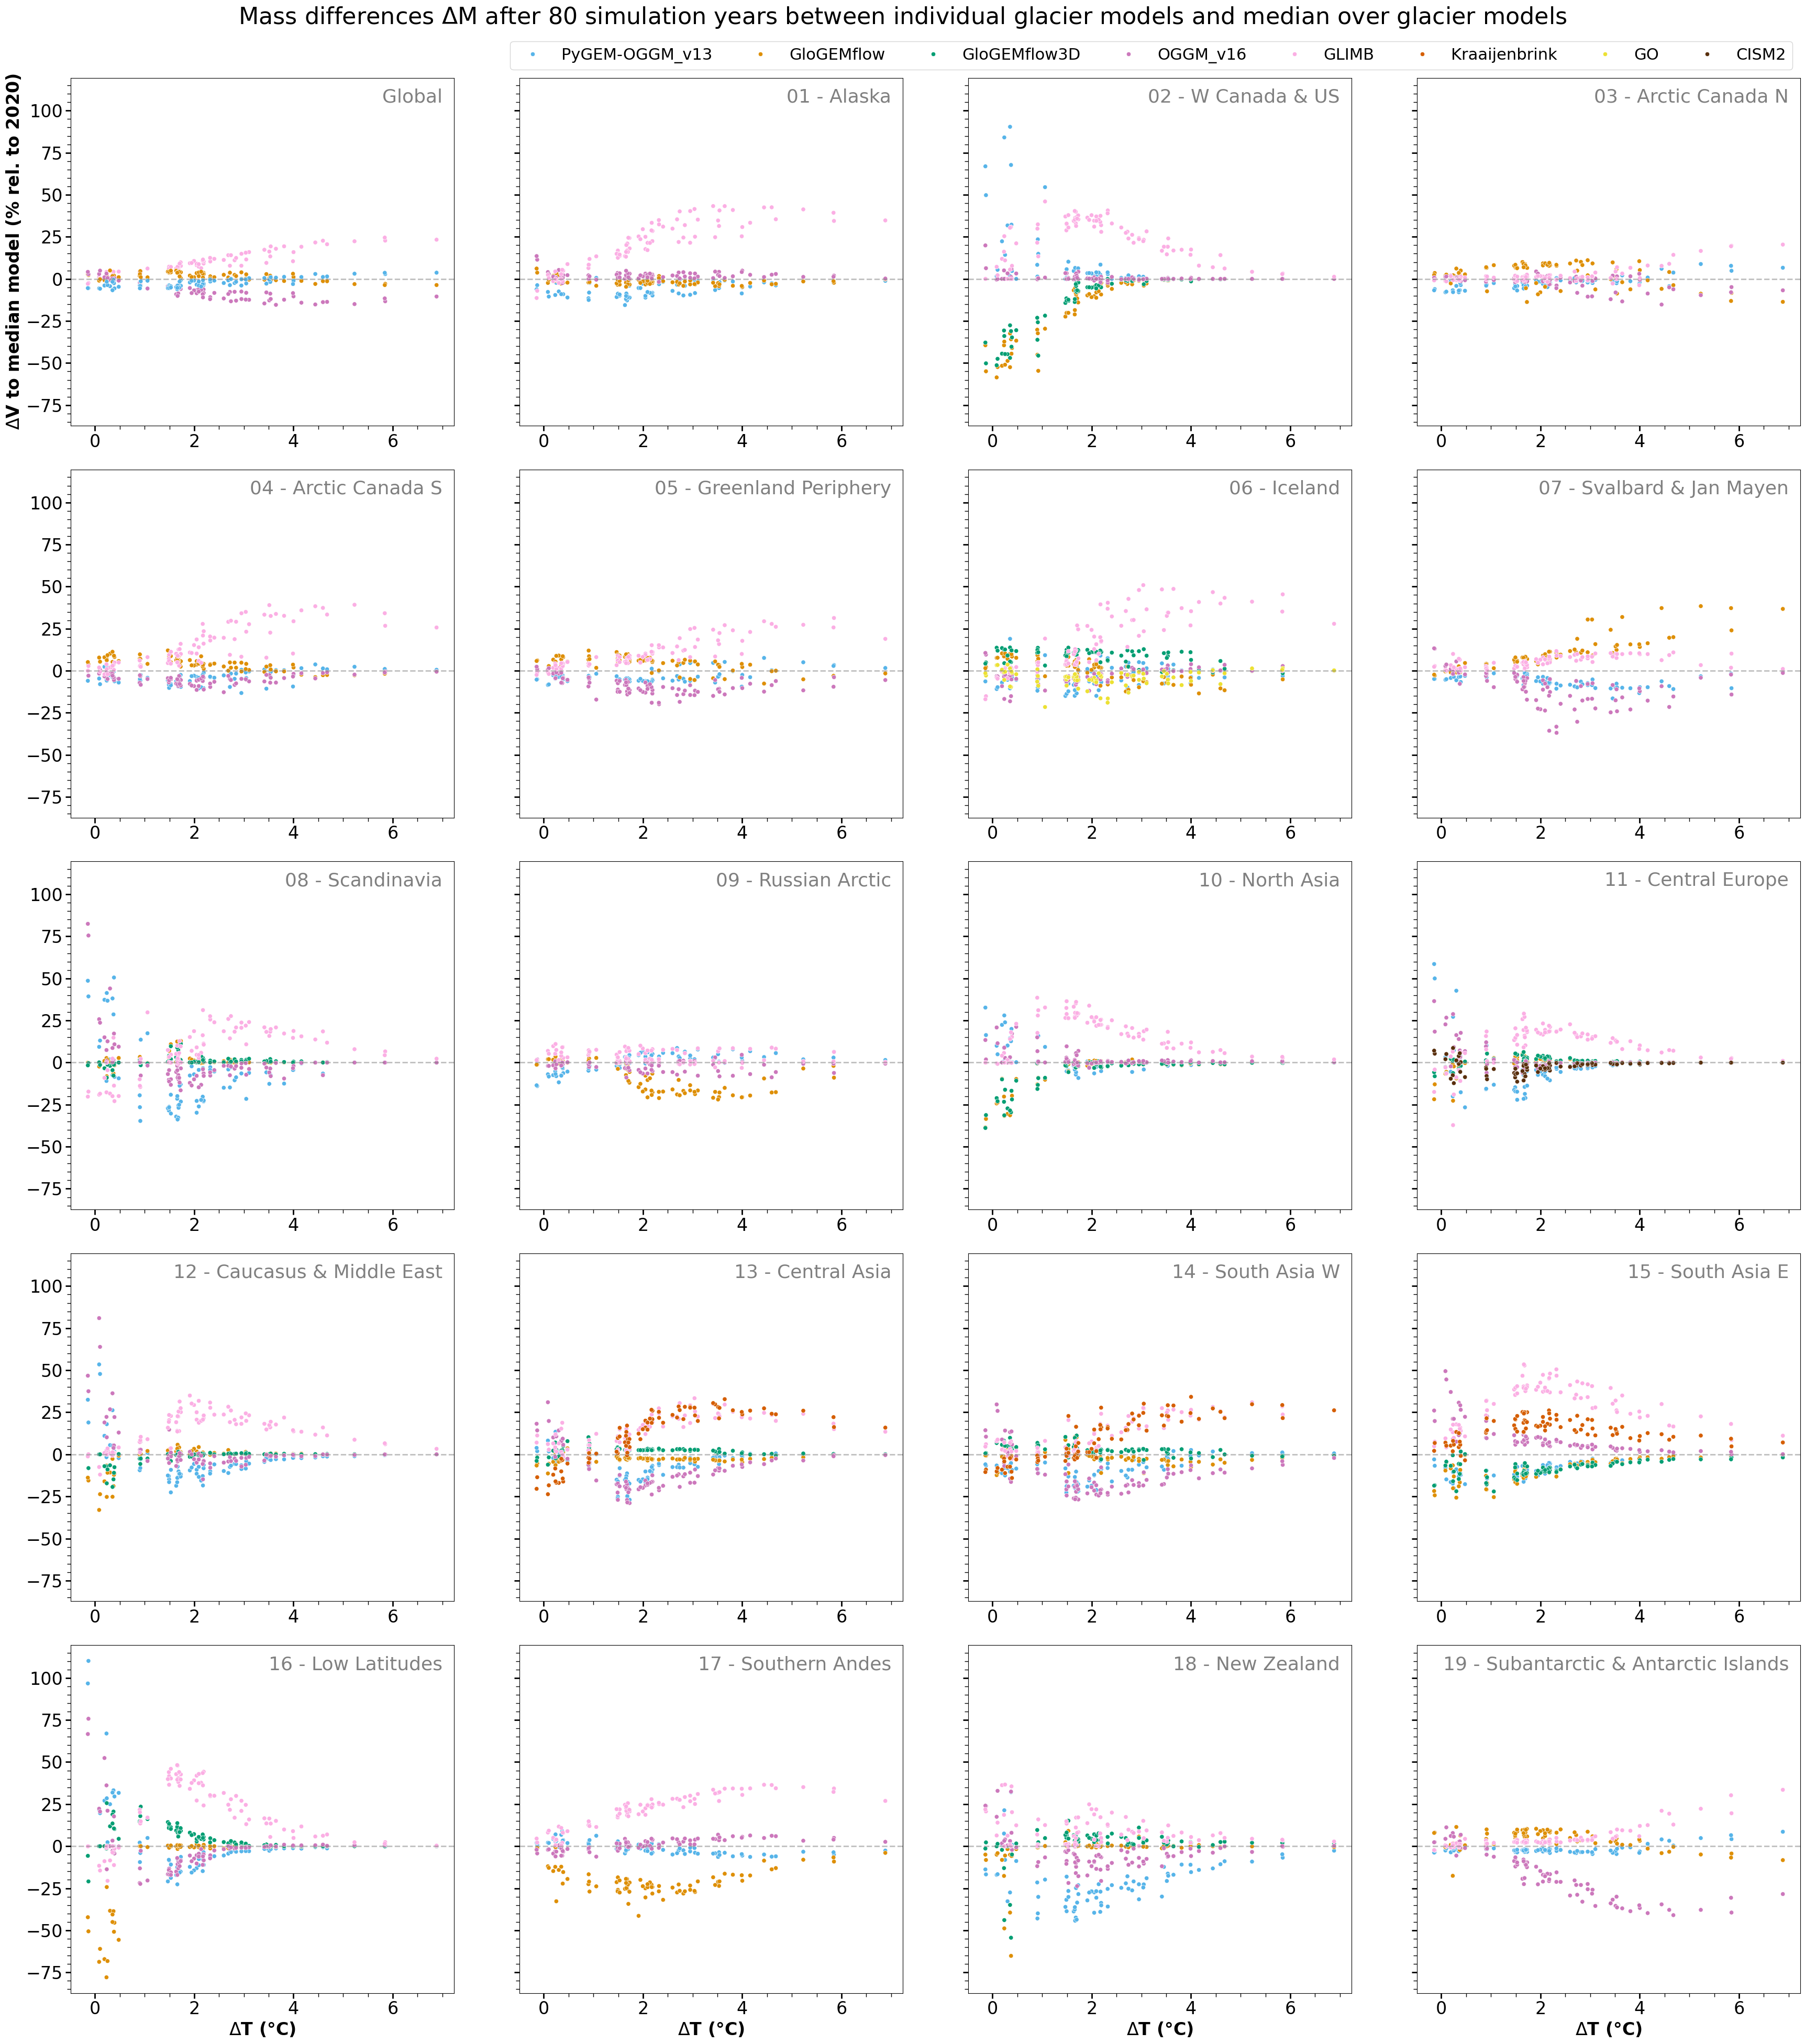

In [40]:


plt.rc('font', size=24)  
fig1, axs1 = plt.subplots(5,4,figsize=(35,40), sharey=True) #, sharey=True) #, sharey='row') #, sharex=True)
#pd_reg_models_vol_5000_steady_state_glob = pd_reg_models_vol_5000_steady_state.groupby(['model_author','temp_ch_ipcc']).sum().reset_index()
suptitle1 = r'Mass differences $\Delta$M after 80 simulation years between individual glacier models and median over glacier models'+'\n\n'
fig1.suptitle(suptitle1, fontsize=32)
axs1 = axs1.flatten()
subplots=True

for j,rgi_reg in enumerate(['Global'] + list(pd_reg_models_vol_80.rgi_reg.unique())):
    if rgi_reg != 'Global':
        rgi_reg_long = f'{rgi_reg} - {d_reg_num_name[rgi_reg]}'
        pd_reg_models_vol_80_rgi_reg = pd_reg_models_vol_80.loc[pd_reg_models_vol_80.rgi_reg==rgi_reg]
        _pal_models = pal_models
        _hue_order = hue_order
        _pd_vol = pd_reg_models_vol_80_rgi_reg
    else:
        rgi_reg_long = rgi_reg
        _pal_models = pal_models_global
        _hue_order = hue_order_global
        _pd_vol = pd_reg_models_vol_glob_80

    if not subplots:
        fig, axs = plt.subplots(1,2,figsize=(28,12),sharey=False, sharex=True)
    
    ax1 = axs1[j]
    if j ==3:
        legend=True
    else:
        legend = False
    sns.scatterplot(ax= ax1, data=_pd_vol, 
                x='temp_ch_ipcc', y='delta relative volume change (in %, to median model)',
               hue='model_author', hue_order=_hue_order, palette=_pal_models, legend=legend)
    if j ==3:
        handles, labels = ax1.get_legend_handles_labels()
        ax1_0 = ax1

    ax1.text(0.97,0.97, f'{rgi_reg_long}', ha='right', va='top',# spearman
                transform=ax1.transAxes, color='grey', fontsize=26)
    if j>15:
        ax1.set_xlabel(r'$\Delta$T (°C)', weight='bold')
    else:
        ax1.set_xlabel('')
    if j==0:
        ax1.set_ylabel(r'$\Delta$V to median model (% rel. to 2020)', weight='bold')
    else:
        ax1.set_ylabel('')
    ax1.axhline(0, ls='--', color='grey', lw=2, alpha = 0.5)
    ax1.tick_params(axis='both', which='major', width=2, length=7)
    ax1.tick_params(axis='both', which='minor', width=1, length=5)
    from matplotlib.ticker import MultipleLocator
    minorx_locator = MultipleLocator(1)  # 1° difference 
    ax1.xaxis.set_minor_locator(minorx_locator)
    minory_locator = MultipleLocator(10)  # 1° difference 
    ax1.yaxis.set_minor_locator(minory_locator)
    ax1.minorticks_on()
plt.tight_layout()
ax1_0.legend(handles, labels, loc='lower right', bbox_to_anchor=(1,1), ncol=8, fontsize=22);   
plt.savefig('figures_partB/glacier_model_80yrs_differences/after80yrs_vol_diff_median_glob_reg_scatterplot_vs_deltaT.png')

In [41]:
ds_all = xr.open_dataset('/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_Feb12_2024_models_all_rgi_regions_sum_scaled_extended_repeat_last_101yrs.nc').volume_m3
ds_all = ds_all.isel(simulation_year=slice(-101,-1)).mean(dim='simulation_year')
ds_all = ds_all.stack(experiments=['gcm','period_scenario'])


In [45]:
ds_all = ds_all.assign_coords(temp_ch_ipcc= ('experiments',pd_global_temp_exp_m.loc[ds_all.experiments, # make sure thatwe use the same experiments
                                                                                             'temp_ch_ipcc']))

In [46]:
ds_all

<xarray.DataArray 'volume_m3' (model_author: 11, rgi_reg: 19, experiments: 80)> Size: 67kB
array([[[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
...
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [8.7228482e+10, 6.7772969e+10, 8.2020876e+10, ...,
         3.2495129e+10, 4.9723812e+09, 2.5286986e+09],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan]],

       [[1.3886179e+13, 1.1903984e+13, 1.3050748e+13, ...,
                   nan,           nan,           nan],
        [1.0717680e+11, 6.9207835e+10, 1.5074918e+11, ...,
                   nan,           nan,           nan],
        [3.8212278e+13, 3.7969776e+13, 3.7253573e+13, ...,
                   nan,           nan,           nan],
        ...,
        [4.2145127e+12, 2.9537107e+12, 3.1543423e+12, ...,
                   nan,           nan,           nan],
        [9.2111225e+10, 6.4005067e+10, 8.7077429e+10, ...,
                   nan,           nan,           nan],
        [6.8539063e+13, 5.6107360e+13, 6.8148682e+13, ...,
                   nan,           nan,           nan]]], dtype=float32)
Coordinates:
  * model_author     (model_author) <U14 616B 'CISM2' 'GO' ... 'Huss'
  * rgi_reg          (rgi_reg) <U2 152B '01' '02' '03' '04' ... '17' '18' '19'
    extend_option    <U18 72B ...
  * experiments      (experiments) object 640B MultiIndex
  * gcm              (experiments) <U13 4kB 'gfdl-esm4' ... 'ukesm1-0-ll'
  * period_scenario  (experiments) <U16 5kB '1851-1870_hist' ... '2081-2100_s...
    temp_ch_ipcc     (experiments) float64 640B 0.2314 0.4783 ... 5.84 6.884

### Old

In [ ]:
diff = _ds_reg_models_vol_5000.sel(model_author='GloGEMflow3D')[['relative volume change (in %)','temp_ch_ipcc']] 
diff['relative volume change diff glogems (in %)'] = diff['relative volume change (in %)'] - _ds_reg_models_vol_5000.sel(model_author='GloGEMflow')['relative volume change (in %)']
diff = diff.dropna(dim='rgi_reg')

In [ ]:
diff.dropna(dim='rgi_reg').to_dataframe().reset_index()

In [ ]:
sns.scatterplot(data=diff.to_dataframe().reset_index(),
                x='relative volume change (in %)', y='relative volume change diff glogems (in %)',
            hue='rgi_reg')
                

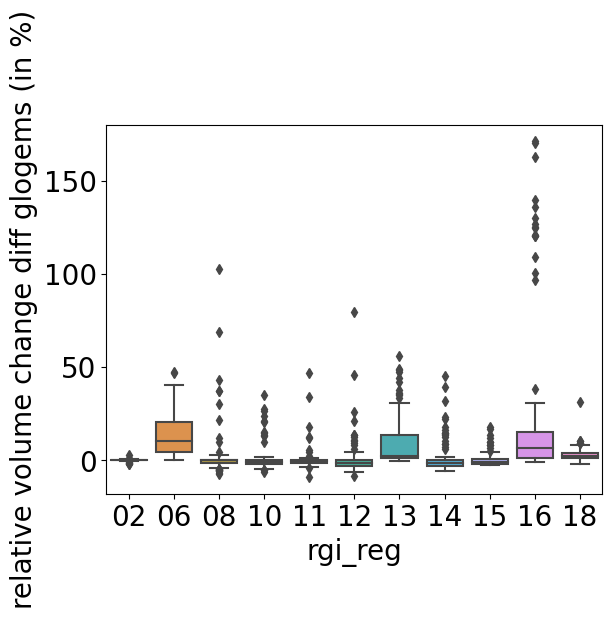

In [37]:
sns.boxplot(data=diff.to_dataframe().reset_index(),
             y='relative volume change diff glogems (in %)',
            x='rgi_reg')
ax = plt.gca()


<AxesSubplot:xlabel='temp_ch_ipcc', ylabel='relative volume change diff glogems (in %)'>

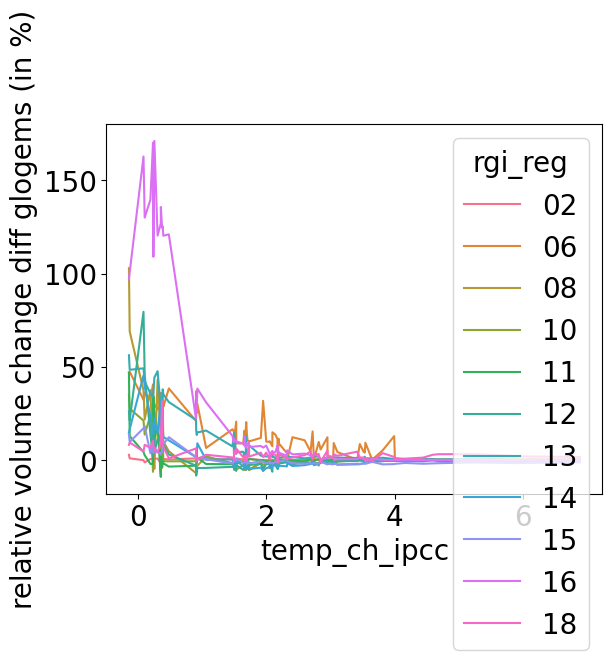

In [38]:
sns.lineplot(data=diff.to_dataframe().reset_index(),
                x='temp_ch_ipcc', y='relative volume change diff glogems (in %)',
            hue='rgi_reg')
                